In [1]:
#import things we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
import seaborn as sns
from scipy.stats import zscore

# Load data, rotate as needed, join dataframes together for ease of processing later

In [2]:
set_metric='euclidean'

In [3]:
#import  data (all DA cells)
all_DA_cells = ['Cocaine','Control ketamine anesthesia','Control isoflurane anesthesia','Amphetamine',
                'Nicotine','Morphine','Fluoxetine','Ethanol','Stress',
                'GAD2-Cre isoflurane','GAD2-Cre Cocaine','GAD2-Cre isoflurane (lateral)','Toluene','Carbamazepine','Meth']
all_DA_cells_df = {} #empty dictionary
num_drugs=len(all_DA_cells) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=all_DA_cells[drug])
    #add id column with drug name and condition
    tempdf['condition']=all_DA_cells[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    all_DA_cells_df[drug]=tempdf #put into dictionary at index

In [4]:
# #import NAcMed data
NAcMeds = ['cTRIO NAcMed cocaine 1 inj','NAcMed controls',
          'cTRIO NAcMed FC','cTRIO NAcMed ketamine anesthesi']
NAcMeds_df = {} #empty dictionary
num_drugs=len(NAcMeds) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=NAcMeds[drug])
    #add id column with drug name and condition
    tempdf['condition']=NAcMeds[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    NAcMeds_df[drug]=tempdf #put into dictionary at index

In [5]:
NAcMed_data=pd.concat(
    NAcMeds_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
NAcMed_data.rename(columns={"%Cortex": "%Anterior Cortex"},inplace=True)

In [6]:
# #import NAcLat data
NAcLats = ['cTRIO NAcLat cocaine','NAcLat iso saline controls',
          'cTRIO NAcLat FC','cTRIO NAcLat ketamine anesthesi']
NAcLats_df = {} #empty dictionary
num_drugs=len(NAcLats) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=NAcLats[drug])
    #add id column with drug name and condition
    tempdf['condition']=NAcLats[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    NAcLats_df[drug]=tempdf #put into dictionary at index

In [7]:
#combine NAcLat data
NAcLat_data=pd.concat(
    NAcLats_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
NAcLat_data.rename(columns={"%Cortex": "%Anterior Cortex"},inplace=True)

In [8]:
# #import DLS data
DLSs = ['DLS_sal','DLS_coc1x','DLS_FC']
DLSs_df = {} #empty dictionary
num_drugs=len(DLSs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',
                           sheet_name=DLSs[drug],skiprows=1)
    tempdf=tempdf.transpose()
    tempdf.columns = tempdf.iloc[0]
    tempdf = tempdf.iloc[1: , :]
    #add id column with drug name and condition
    tempdf['condition']=DLSs[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    DLSs_df[drug]=tempdf #put into dictionary at index

In [9]:
#combine DLS data
DLS_data=pd.concat(
    DLSs_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [10]:
# #import DLS data
DMSs = ['cTRIO DMS saline','cTRIO DMS cocaine']
DMSs_df = {} #empty dictionary
num_drugs=len(DMSs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/cTRIO DMS data.xlsx',
                           sheet_name=DMSs[drug])
    #add id column with drug name and condition
    tempdf['condition']=DMSs[drug]
    tempdf.dropna(inplace=True)
    tempdf.reset_index(inplace=True, drop=True)
    DMSs_df[drug]=tempdf #put into dictionary at index
#combine DLS data
DMS_data=pd.concat(
    DMSs_df,
    axis=0,
    join="outer",
    ignore_index=True,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [11]:
# #import amygdala data
Amygs = ['cTRIO Amygdala cocaine 1 dose','cTRIO Amygdala isoflurane anest','cTRIO Amygdala AFC']
Amygs2= ['cTRIO Amygdala ketamine anesthe']
Amygs_df = {} #empty dictionary
num_drugs=len(Amygs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',
                           sheet_name=Amygs[drug],skiprows=1)
    tempdf=tempdf.transpose()
    tempdf.columns = tempdf.iloc[0]
    tempdf = tempdf.iloc[1: , :]
    #add id column with drug name and condition
    tempdf['condition']=Amygs[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    Amygs_df[drug]=tempdf #put into dictionary at index
for drug in range(1):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=Amygs2[drug])
    #add id column with drug name and condition
    tempdf['condition']=Amygs2[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    Amygs_df[3]=tempdf #put into dictionary at index

In [12]:
#combine Amyg data
Amyg_data=pd.concat(
    Amygs_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [13]:
Amyg_data.dropna(inplace=True,axis=1)

In [14]:
#import mPFC data
mPFCs = ['cTRIO mPFC isoflurane anesthesi','cTRIO mPFC cocaine 1 dose','cTRIO mPFC AFC']
mPFCs2= ['cTRIO mPFC ketamine anesthesia']
mPFCs_df = {} #empty dictionary
num_drugs=len(mPFCs) #get number of drugs/conditions
for drug in range(num_drugs):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',
                           sheet_name=mPFCs[drug],skiprows=1)
    tempdf=tempdf.transpose()
    tempdf.columns = tempdf.iloc[0]
    tempdf = tempdf.iloc[1: , :]
    #add id column with drug name and condition
    tempdf['condition']=mPFCs[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    mPFCs_df[drug]=tempdf #put into dictionary at index
for drug in range(1):
    #read in the sheet with that drug name
    tempdf = pd.read_excel(r'data/organized drug and experience data for Bartas et al.xlsx',sheet_name=mPFCs2[drug])
    #add id column with drug name and condition
    tempdf['condition']=mPFCs2[drug]
    list1=list(tempdf['condition'])
    length=len(tempdf['condition'])
    list2=list(range(1,length+1))
    tempdf['condition_num']=[str(s) +'-'+ str(num) for s,num in zip(list1,list2)]
    tempdf.dropna(inplace=True)
    mPFCs_df[3]=tempdf #put into dictionary at index

In [15]:
# combine mPFC data
mPFC_data=pd.concat(
    mPFCs_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [16]:
mPFC_data.dropna(inplace=True,axis=1)

In [17]:
all_data=pd.concat(
    all_DA_cells_df,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [18]:
#import  data DAT-cre
DATcre66T = pd.read_excel(r'data/8dat-crebrains.xlsx')
#and import dat cre and gad2 also from 76 brain set
DATcre66T_gad2 = pd.read_excel(r'data/12datcre-and-gad2.xlsx')
#import coffee
caffeine_dat = pd.read_excel(r'data/Caffeine data.xlsx')
#import vglut2
VGlut2_cre = pd.read_excel(r'data/vGluT2-Cre.xlsx')

# Define some functions, variables, and other things we will use

In [19]:
uniq_colors=['mediumorchid','gray','royalblue','darkred','red','hotpink',
             'khaki','palegreen','seagreen','orange','lavender',
             'steelblue','navy','dodgerblue','thistle','violet',
             'deeppink','pink','slateblue','peru','darkorange',
             'magenta','cyan','lightcoral','lawngreen',
             'burlywood'] # to use later
metrics=set_metric

In [20]:
def signif(x, p): #get p significant digits of all of a numpy array (why does base numpy not have this...)
    x = np.asarray(x)
    x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
    mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
    return np.round(x * mags) / mags

In [21]:
def plot_components(components_df,condition_nums): #plot feature importance of the PCA components 1-5
    #code adapted from 
    #https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
    fig, ax = plt.subplots(figsize=(8, 30))
    comptemp0=components_df.transpose()
    comptemp1=comptemp0.to_numpy()
    comptemp=signif(comptemp1,3)
    im = ax.imshow(comptemp)
    pca5=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']
    regions=components_df.columns
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(pca5)))
    ax.set_yticks(np.arange(len(regions)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(pca5)
    ax.set_yticklabels(condition_nums)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fig.colorbar(im)

    # Loop over data dimensions and create text annotations.
    for i in range(len(regions)):
        for j in range(len(pca5)):
            text = ax.text(j, i, comptemp[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Components and Feature Importance")
    fig.tight_layout()
    plt.show()

In [22]:
def make_pca_plots(pc1,pc2,pc3,labels): #makes plots of pc1v2, 1v3, and 2v3
    align_embed= pd.DataFrame({'pc1': pc1.values,'pc2': pc2.values,'pc3': pc3.values},index=labels)
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc1'],drug1['pc2'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 2')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc1'],drug1['pc3'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 1')
        ax.set_ylabel('PC 3')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['pc2'],drug1['pc3'],c=uniq_colors[i],label=r)
        ax.set_xlabel('PC 2')
        ax.set_ylabel('PC 3')
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5)) #make legend not on the plot
    plt.show()

In [23]:
def get_feats_and_labels(dataframe): #gets features and conditions (drugs) and brain regions
    regions=dataframe['condition'].values
    condition_nums=dataframe['condition_num'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    return features, labels, regions, condition_nums

In [24]:
featuresDMS, labelsDMS, condition_numsDMS, regionsDMS =get_feats_and_labels(DMS_data)

In [25]:
gad2only2=all_data[(all_data["condition"] == 'GAD2-Cre isoflurane (lateral)')|(all_data["condition"] == 'GAD2-Cre isoflurane')]
features4, labels4, condition_nums4, regions4 = get_feats_and_labels(gad2only2) 

In [26]:
#modularized pieter's code
def umap_n_times(X_scaled,labels,N = 20,n_neighbors=15,metric='euclidean'):
    umap_distances = np.zeros((len(labels),len(labels),N,))
    for n in range(0,N):
        embedding=umap.UMAP(n_neighbors=n_neighbors,metric=metric).fit_transform(X_scaled)
        for r1 in range(0,len(labels)):
            for r2 in range(0,len(labels)):
                d = np.sum((embedding[r1]-embedding[r2])**2)**(0.5)
                umap_distances[r1,r2,n]=d
        max_distance = np.max(umap_distances[:,:,n])
        umap_distances[:,:,n] = umap_distances[:,:,n]/max_distance
    umap_distances_means = np.mean(umap_distances,axis=2)
    return umap_distances_means

In [27]:
#modularized pieter's code
def umap_dist_heatmap(t1,indexed='no'):
    if indexed=='yes':
        labs=labels.values
        uniq=list(range(len(labels)))
        uniq_labels = [str(i) +'_'+ str(j) for i, j in zip(labs, uniq)]
    else:
        labs=labels.values
        uniq=[x[1] for x in labels.index.values]
        uniq_labels = [str(i) +'_'+ str(j) for i, j in zip(labs, uniq)]
    fig,ax =plt.subplots(figsize=(10,4))
    plt.pcolor(t1, cmap="RdYlBu_r")

    plt.yticks(np.arange(0.5, len(uniq_labels), 1),uniq_labels)
    plt.xticks(np.arange(0.5, len(uniq_labels), 1),uniq_labels)
    plt.colorbar()
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.show()

In [28]:
#modularized pieter's code
def pca_distance(pc1,pc2,pc3,labels):
    pca_distances = np.zeros((len(labels),len(labels)))
    for r1 in range(0,len(labels)):
        for r2 in range(0,len(labels)):
            d = ((pc1[r1]-pc1[r2])**2 +(pc2[r1]-pc2[r2])**2+(pc3[r1]-pc3[r2])**2)**(0.5)
            pca_distances[r1,r2]=d #euclidean distance
    max_distance = np.max(pca_distances[:,:])
    pca_distances[:,:] = pca_distances[:,:]/max_distance #normalized
    return pca_distances

In [29]:
def umap_plot(X_scaled,labels,set_metric=set_metric):
    neighbors=int(len(labels)/3)
    metrics=set_metric
    reducer = umap.UMAP(metric=metrics,n_neighbors=neighbors,random_state=1) 
    embedding = reducer.fit_transform(X_scaled)
    embedding.shape

    align_embed= pd.DataFrame(embedding,index=labels,columns=['umap1','umap2'])
    fig, ax = plt.subplots(figsize=(8, 6)) #init  fig
    for i,r in enumerate(np.unique(align_embed.index.values)):
        drug1=align_embed[align_embed.index == r]
        ax.scatter(drug1['umap1'],drug1['umap2'],c=uniq_colors[i],label=r)
    ax.legend(loc="right",bbox_to_anchor=(1.6, 0.5))
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    plt.show()

    #distance heatmap
    to_heatmap=umap_n_times(X_scaled,labels,metric=metrics,n_neighbors=neighbors) 
    means_df = pd.DataFrame(to_heatmap,index=labels,columns=labels)
    cm = sns.clustermap(means_df,yticklabels=True,xticklabels=True)
    cm.fig.suptitle("average umap relative distance")
    cm.fig.set_size_inches(18, 18)

# all DA cells (below)
# ALL DATA INLUDED - plus caffeine

In [30]:
def get_feats_and_labels(dataframe):
    regions=dataframe['Experimental condition']
    condition_nums=dataframe['condition_nums']
    features0=dataframe.iloc[: , 1:23]
    features=features0.transpose()
    labels=features.index
    return features, labels, regions, condition_nums
features2, labels2, regions2, condition_nums2 = get_feats_and_labels(caffeine_dat)

In [31]:
def get_feats_and_labels(dataframe): #gets features and conditions (drugs) and brain regions
    regions=dataframe['condition'].values
    condition_nums=dataframe['condition_num'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    return features, labels, regions, condition_nums

In [32]:
features, labels, regions, condition_nums = get_feats_and_labels(all_data)
labels=list(labels)
condition_nums=list(condition_nums)+list(condition_nums2)
regions=list(regions)+list(regions2)
#scale X 
X1=features.to_numpy().astype(float)
X2=features2.to_numpy().astype(float)
X=np.hstack((X1, X2))
#get rid of NAs before scaling 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0) 

In [33]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[16.83260529 14.35929243  7.14783491  5.75335312  5.35455166]


principal component 1  principal component 2  principal component 3  \
0                2.008608               1.449006              -2.896074   
1                2.496749               4.167340               2.702027   
2                5.992191              -0.011011              -4.412777   
3                7.900629               3.338808               0.532694   
4                8.230819               0.724186               1.435651   
5               -5.298851               2.816020              -2.004279   
6               -3.728532               3.100694              -1.254174   
7               -0.250386               6.683625               2.071474   
8               -0.521658              -3.161226               0.645997   
9               -4.462634              -1.989211              -2.273198   
10               1.069588              -4.405359               0.701375   
11               4.891359              -3.937220              -4.239769   
12              -2.185711               3.184983              -4.139646   
13              -4.408571               4.491184               1.816418   
14              -0.381409               6.359180               2.248993   
15               0.922975              -3.661993               0.619480   
16              -6.000061              -0.998356              -3.213521   
17               0.752462              -3.660203               0.565199   
18              -4.890534              -2.775816               1.505927   
19              -0.445805              -2.203193               5.389527   
20              -1.968414              -5.976648               3.102404   
21               0.277189              -3.534789               1.096273   

    principal component 4  principal component 5  
0                7.219954               2.871116  
1               -1.320434              -3.307130  
2               -1.106349              -2.351587  
3               -2.814255              -2.078596  
4                2.937593               1.505838  
5               -1.046221              -1.477434  
6               -2.905456               0.407542  
7                0.088782               1.099730  
8               -2.492891               3.014011  
9                3.030031              -2.652287  
10              -1.381879               1.981957  
11              -0.184081              -3.212563  
12               0.106261               1.655759  
13               1.190398              -0.221116  
14               0.411397               1.526248  
15              -0.791651               4.484174  
16              -2.066303               0.296486  
17              -2.196429               1.660387  
18               1.397842              -2.259136  
19               0.602416              -2.109566  
20               2.633513              -2.567162  
21              -1.312239               1.733329

### PCA plots

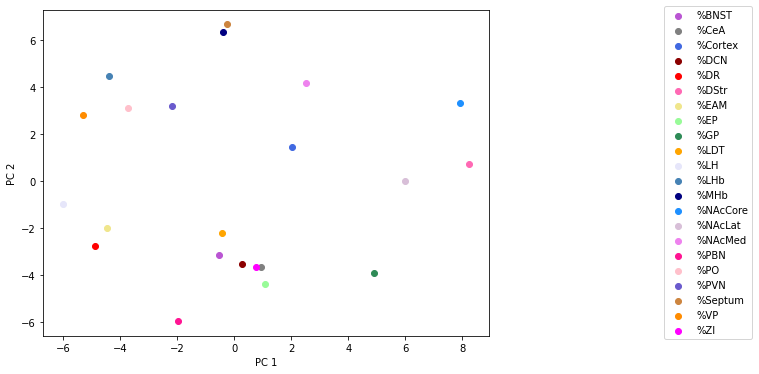

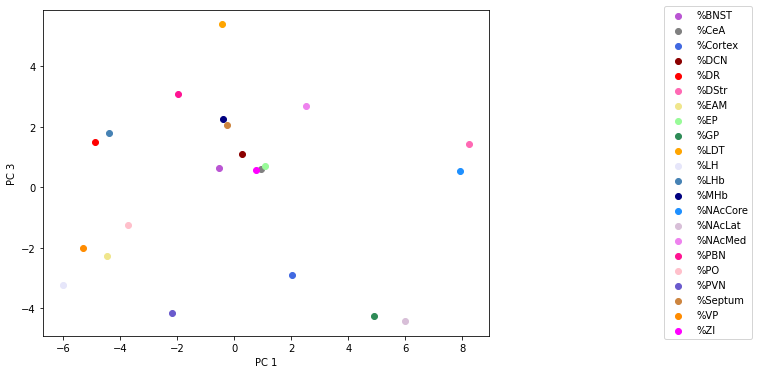

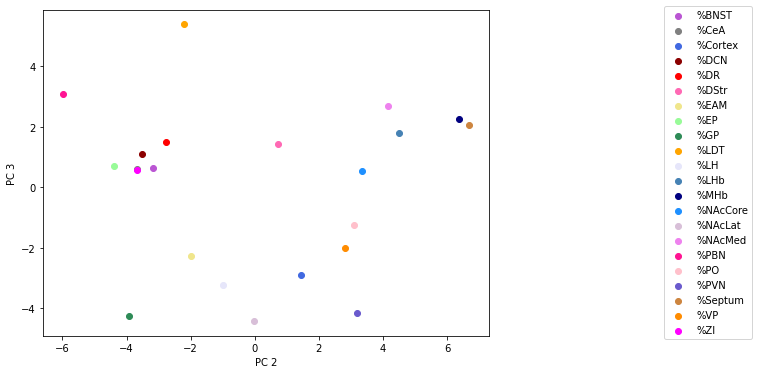

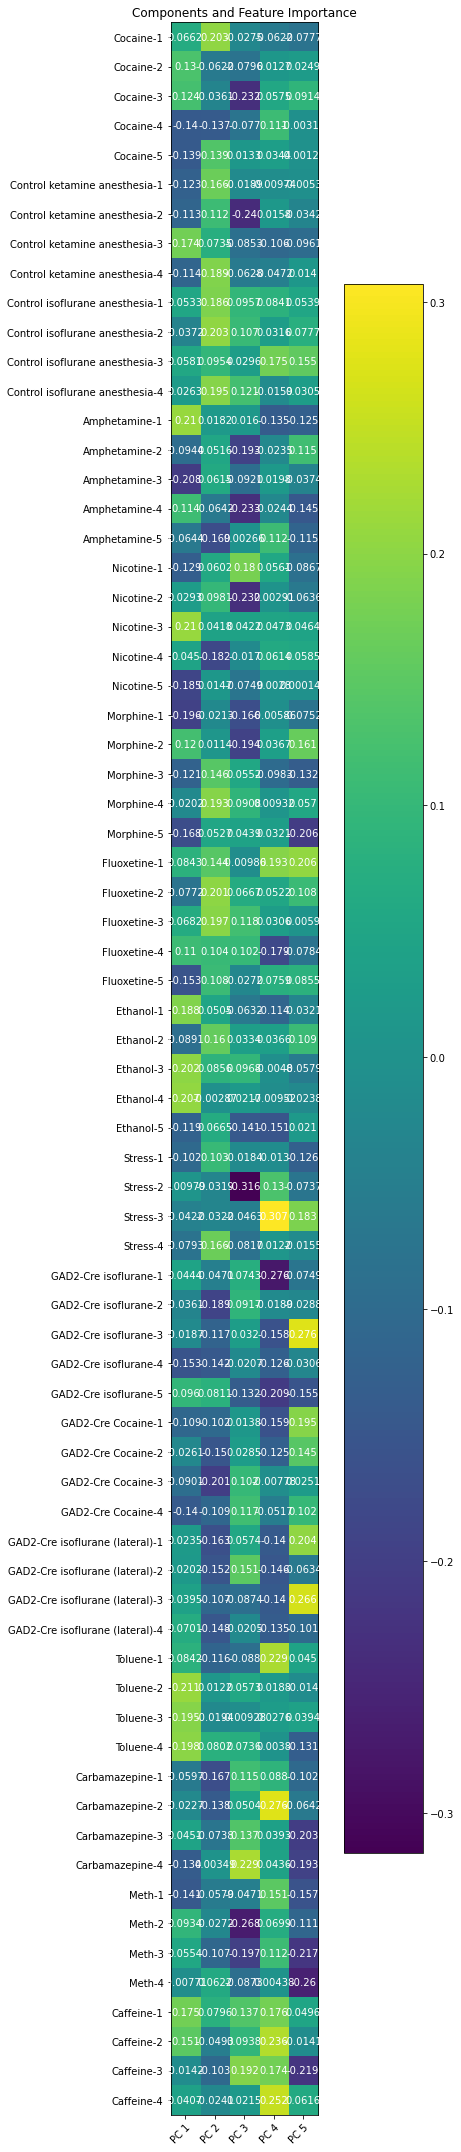

In [34]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


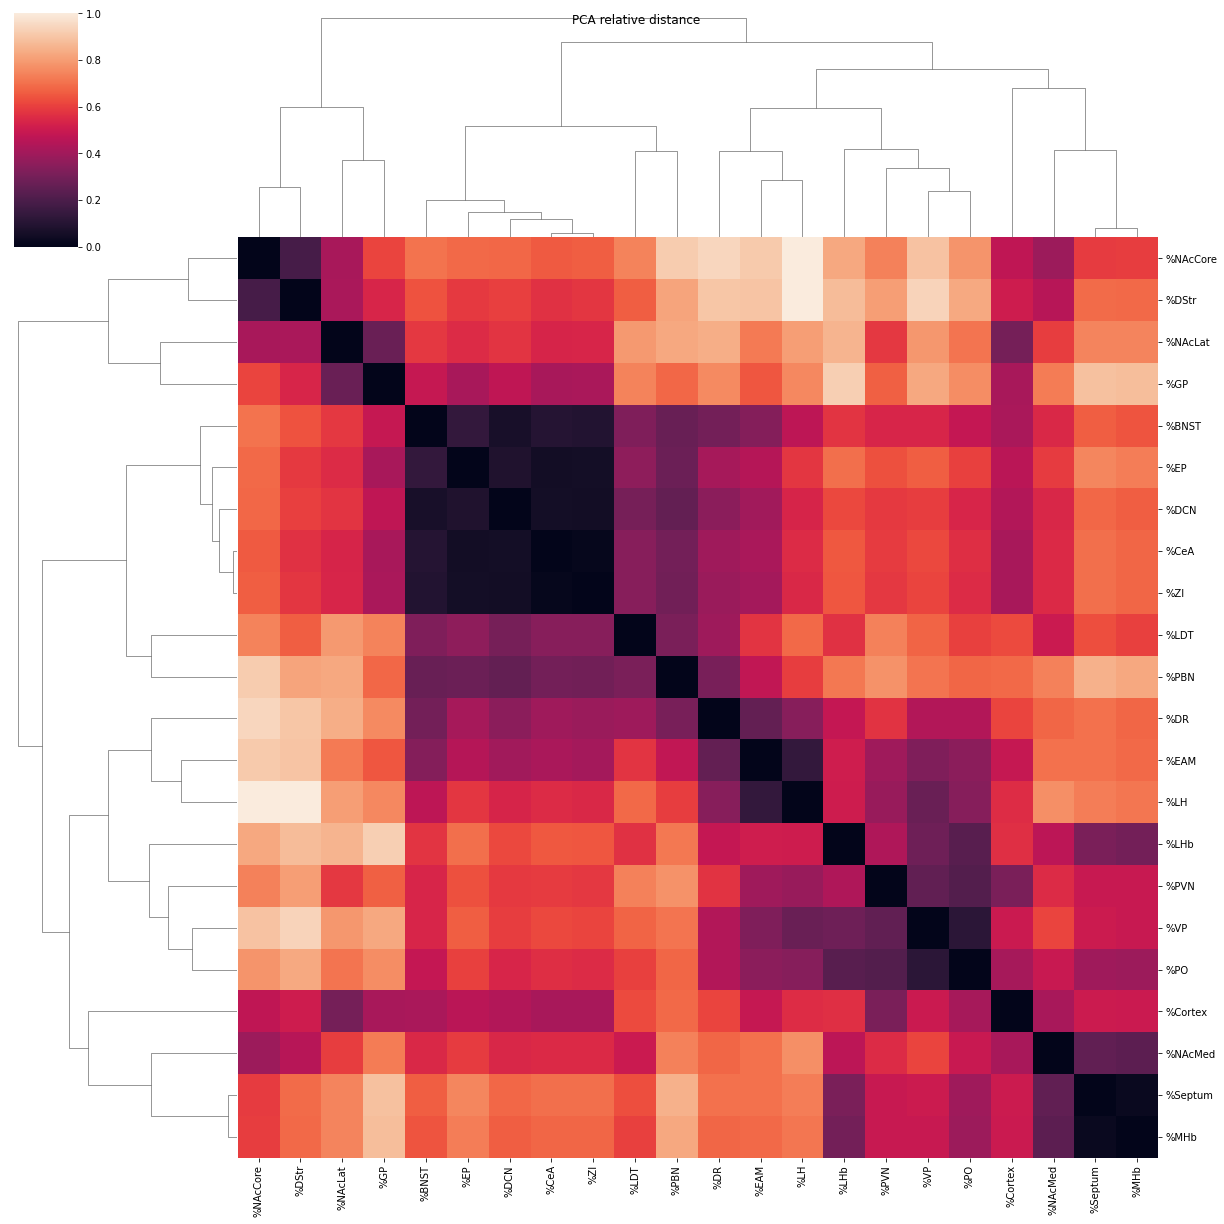

In [35]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

### UMAP

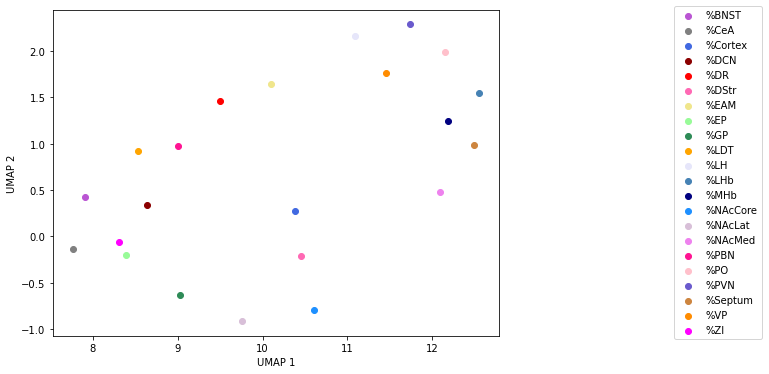

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


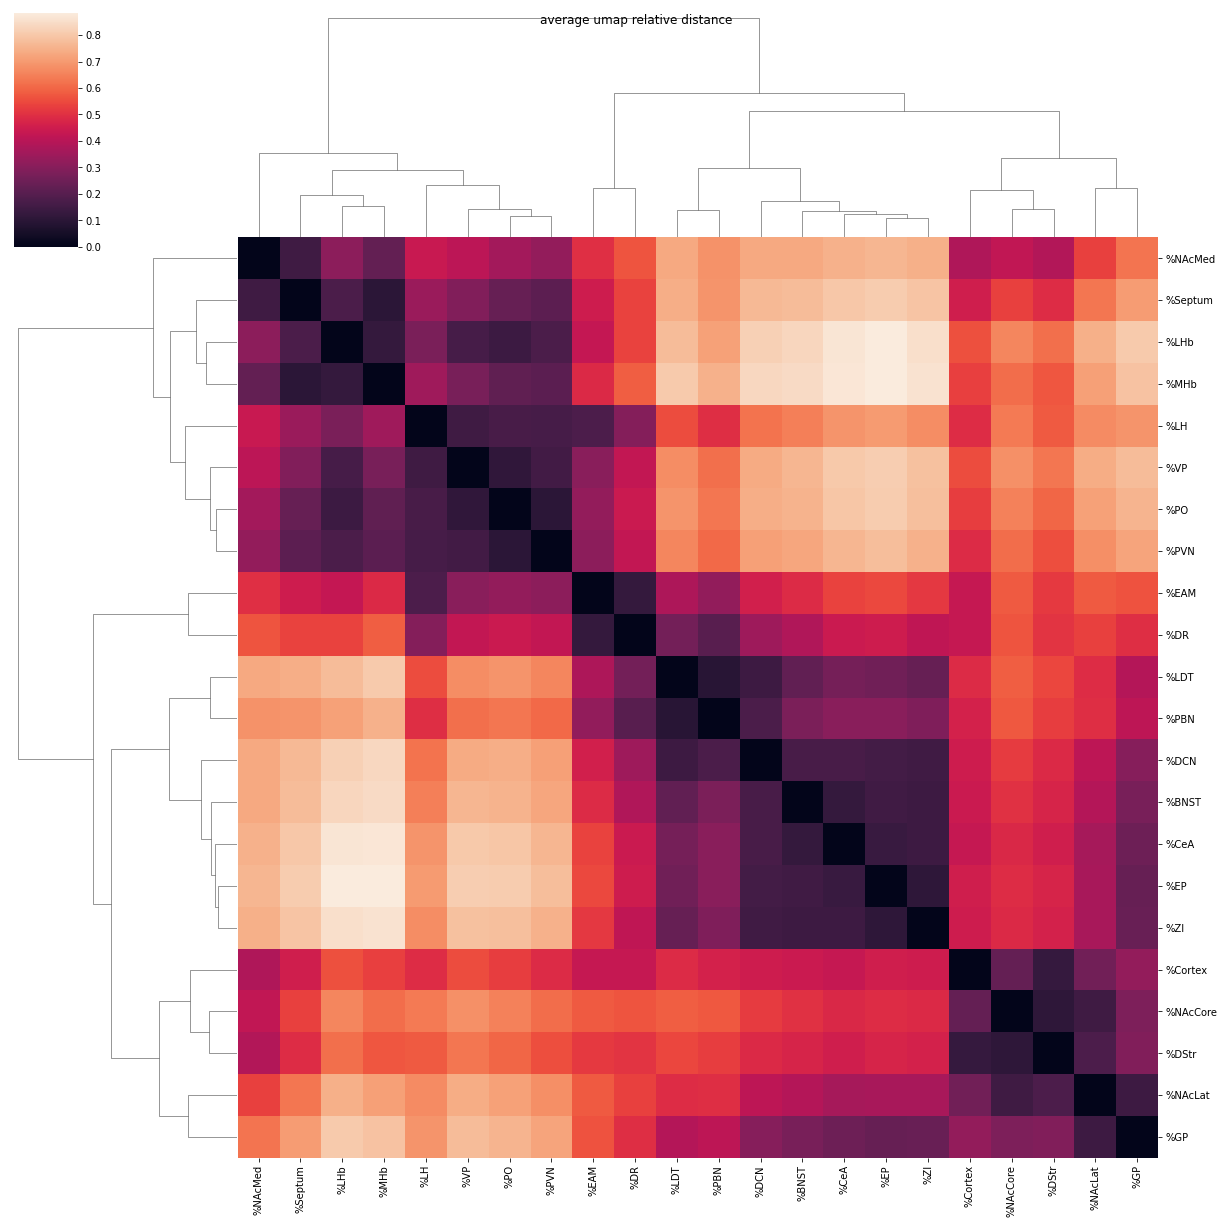

In [36]:
umap_plot(X_scaled,labels)

# DA cells
# Isoflurane vs ketamine

In [37]:
notEtOH=all_data[all_data["condition"].isin(['Control ketamine anesthesia','Control isoflurane anesthesia'])] 
features, labels, regions, condition_nums = get_feats_and_labels(notEtOH)
labels=list(labels)
condition_nums=list(condition_nums)
regions=list(regions)

X1=features.to_numpy().astype(float) 
#get rid of NAs before scaling 
X_scaled=zscore(X1,axis=1)
X_scaled=zscore(X_scaled,axis=0) 

In [38]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[2.92129113 1.74123411 1.35569412 1.19832431 0.61561459]


principal component 1  principal component 2  principal component 3  \
0               -1.952792              -0.641953               0.407293   
1               -0.594457              -0.091869               1.277396   
2                0.120594               1.778149               0.128639   
3               -2.510292               0.964524              -0.154290   
4               -1.588775               1.554671              -0.409740   
5                1.862351              -1.081198              -0.579214   
6                2.458929              -0.551981              -0.537542   
7                0.391769              -2.029676              -1.493135   
8               -1.802602              -1.107842              -2.078267   
9                2.589438               0.426221              -0.052311   
10              -0.814096               1.824531               0.618628   
11              -0.150794               2.469698              -0.934820   
12               2.456035               0.924329               0.951647   
13              -1.058779              -1.939688               0.999932   
14              -1.270020              -2.003255               1.507503   
15              -1.317757              -0.025639              -0.581714   
16               2.580035              -0.377720               0.080822   
17              -1.662104               1.323786              -0.684109   
18              -1.041527              -0.875946               2.347250   
19              -0.304914              -1.276644              -1.847717   
20               2.261577               0.294280              -0.821473   
21               1.348181               0.443223               1.855222   

    principal component 4  principal component 5  
0               -1.431793               0.117215  
1                2.325406              -1.099119  
2                1.327348               0.603964  
3                1.440829              -0.376035  
4                1.268372               0.269614  
5               -0.263573              -0.053812  
6                0.222570              -0.764875  
7                0.317083              -0.503523  
8                0.270062              -0.202370  
9               -0.752977              -0.055550  
10              -1.661446              -1.226140  
11              -0.357054              -0.337653  
12               0.165770               0.381011  
13              -0.751997               0.659241  
14               0.621620              -0.722954  
15              -0.995151               1.956106  
16              -0.501632              -0.832068  
17              -1.700333              -0.395659  
18              -1.176068              -0.007408  
19               0.898151               0.662292  
20              -0.318540               0.439505  
21               1.053352               1.488217

### PCA Plots

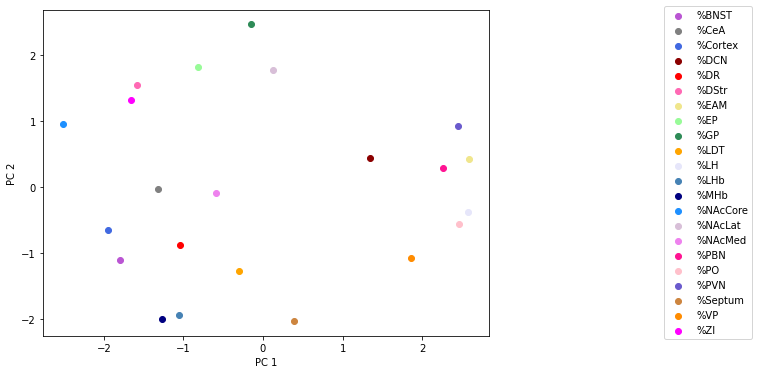

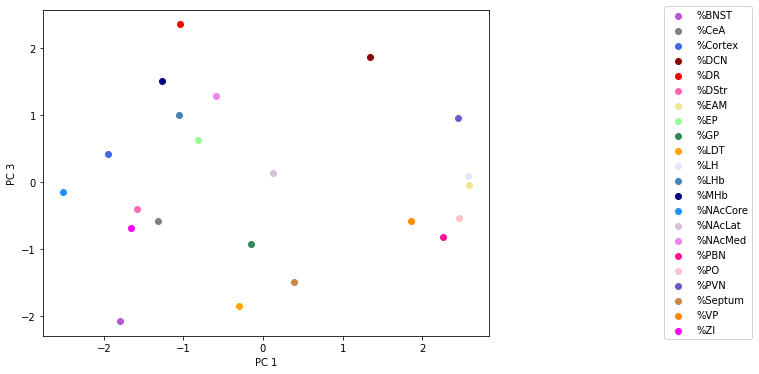

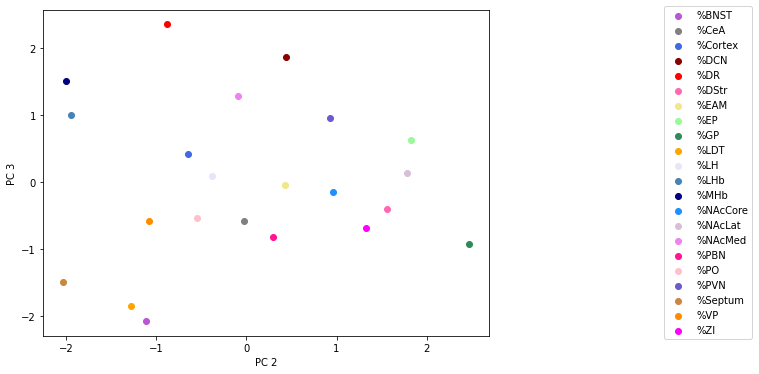

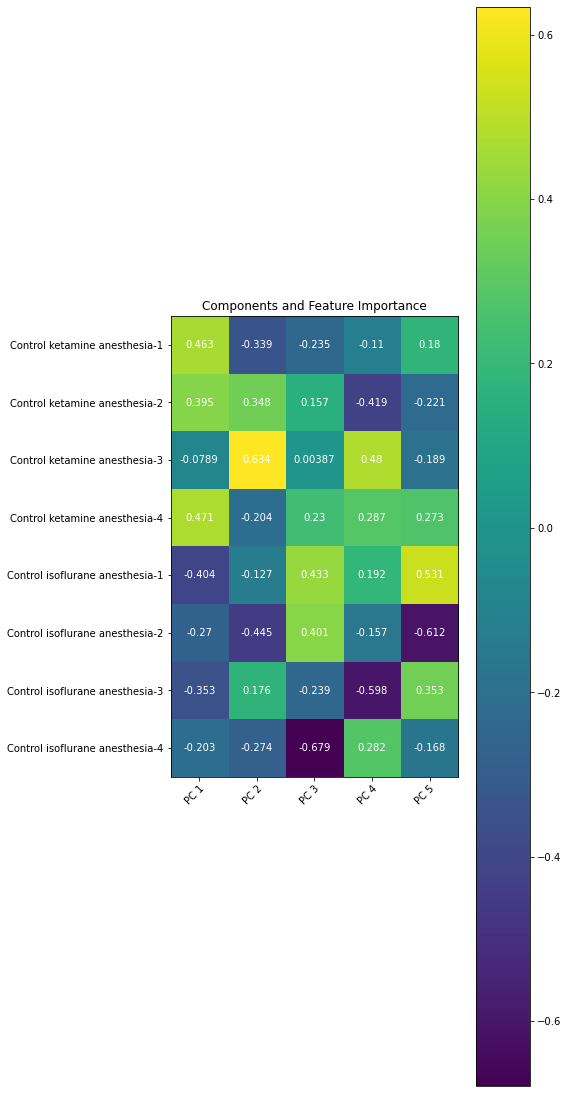

In [39]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


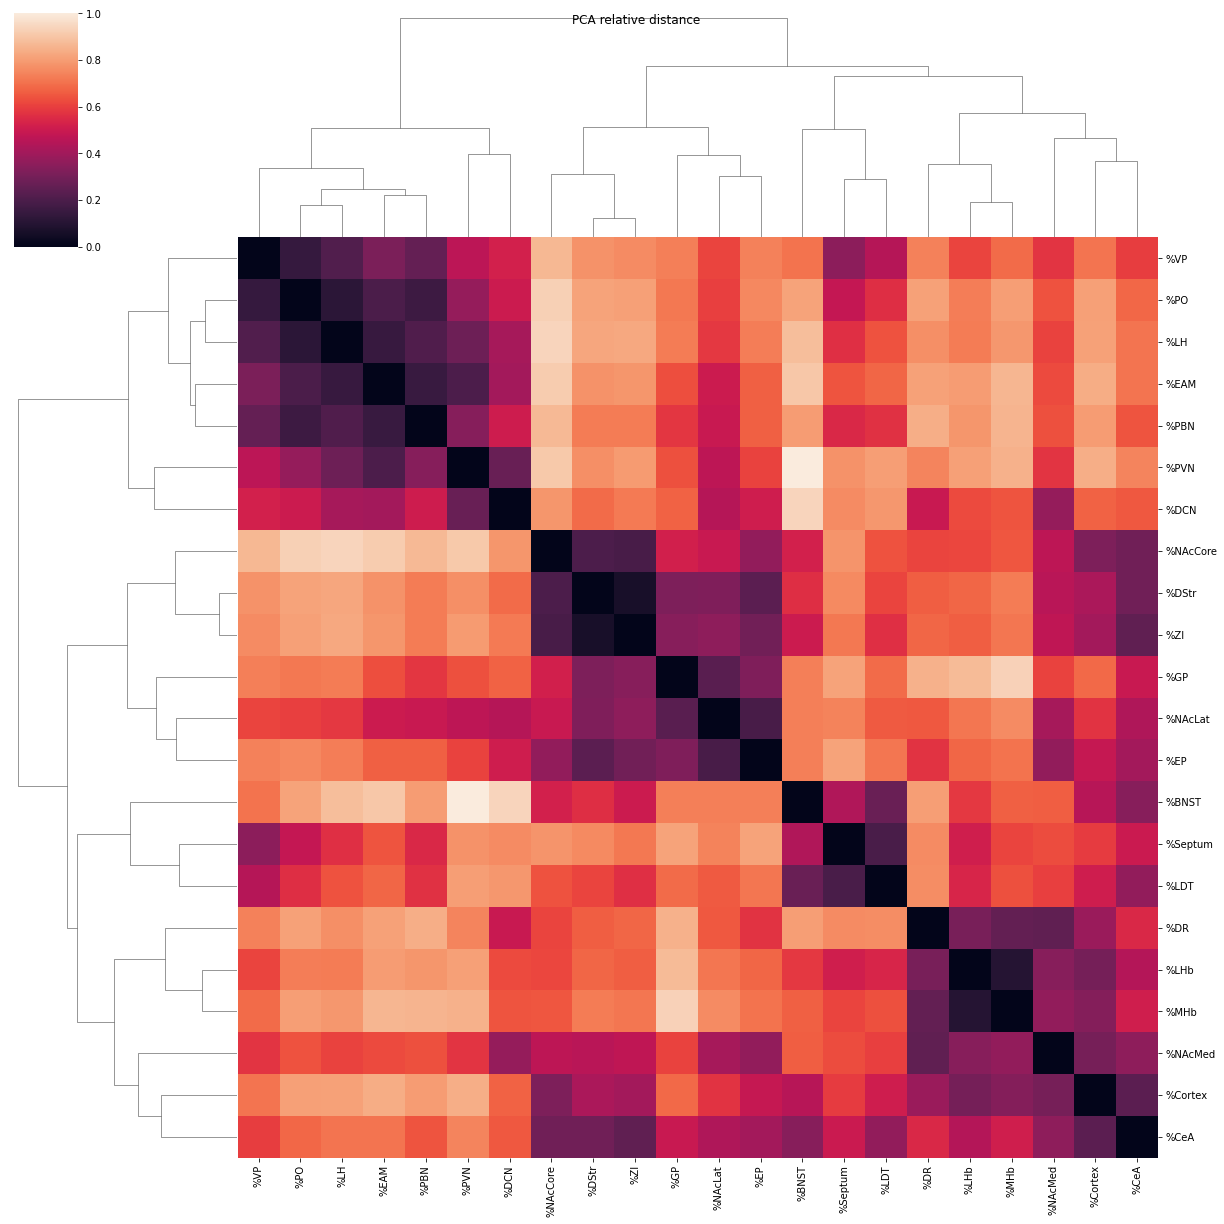

In [40]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

### UMAP

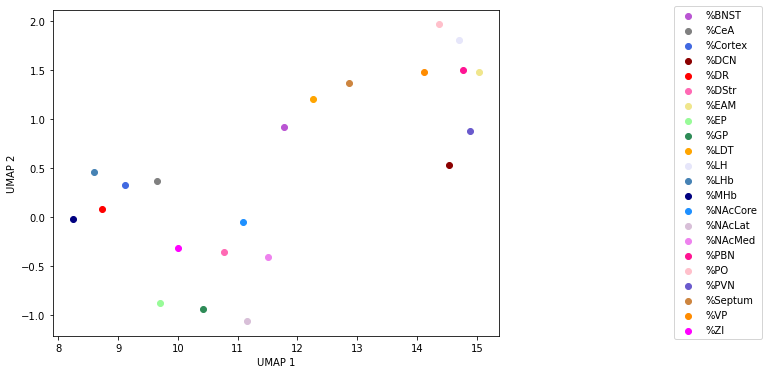

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


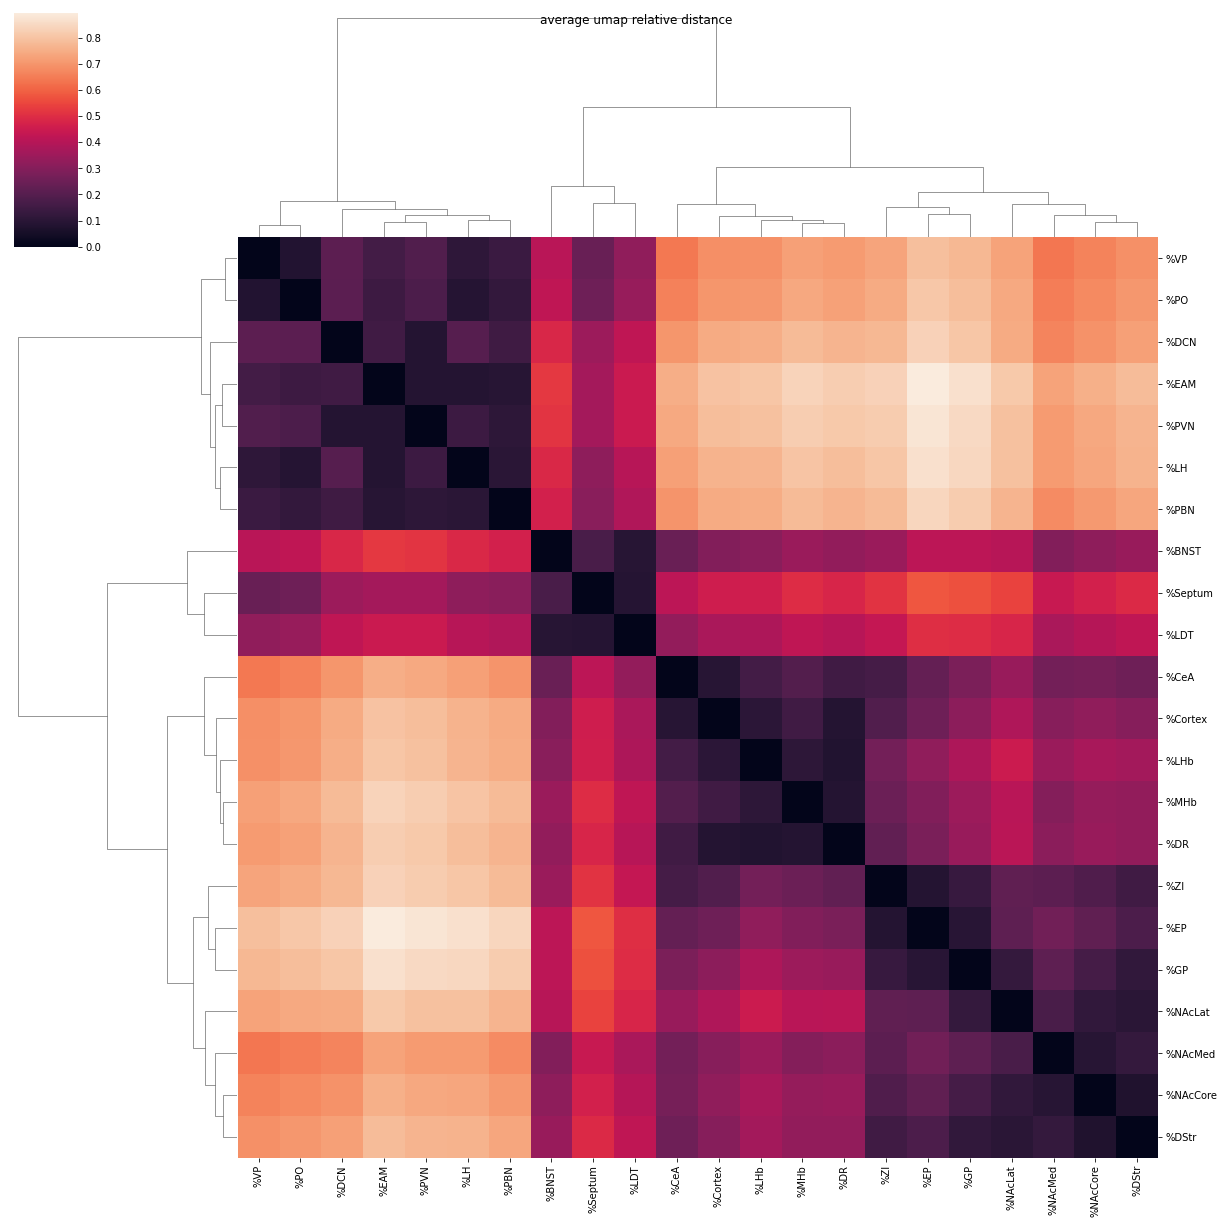

In [41]:
umap_plot(X_scaled,labels)

# DA cells - all drugs and conditions including GAD2-Cre but EXCLUDING EtOH and Toluene

all drugs and conditions including GAD2-Cre but EXCLUDING EtOH

In [42]:
notEtOH=all_data[~all_data["condition"].isin(['Ethanol','Toluene'])]

In [43]:
features, labels, regions, condition_nums = get_feats_and_labels(notEtOH)
labels=list(labels)
condition_nums=list(condition_nums)+list(condition_nums2)
regions=list(regions)+list(regions2)
#scale X 
X1=features.to_numpy().astype(float)
X2=features2.to_numpy().astype(float)
X=np.hstack((X1, X2))
#get rid of NAs before scaling 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0) 

In [44]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[13.53795429 12.92804966  6.6886062   5.22938963  4.88701251]


principal component 1  principal component 2  principal component 3  \
0               -2.282378               1.785933              -2.265968   
1               -4.103924              -0.091208               2.235396   
2               -1.644880               4.695613              -4.321082   
3               -4.576142               5.746198               0.418537   
4               -2.899656               6.767139               1.697789   
5               -1.758099              -5.551088              -1.997345   
6               -1.912150              -3.890376              -1.165621   
7               -5.935599              -1.606555               2.085767   
8                3.020946               0.517434               0.981078   
9                2.616180              -3.412598              -2.824691   
10               3.924848               1.741811               0.898405   
11               2.230896               5.431199              -4.084339   
12              -2.679668              -2.124241              -3.870320   
13              -3.484112              -4.908409               2.177138   
14              -5.750661              -1.407016               2.510326   
15               3.137545               1.607274               0.797218   
16               2.714406              -4.608535              -3.574738   
17               3.340011               1.892012               0.542617   
18               3.932186              -3.813429               1.224002   
19               2.661092              -0.174568               4.800298   
20               6.123874               0.027281               2.649734   
21               3.325286               1.376128               1.085800   

    principal component 4  principal component 5  
0                4.069175               5.783971  
1                0.744516              -3.259301  
2               -0.031068              -2.499812  
3               -1.077449              -3.305330  
4                2.125776               2.815403  
5               -0.439002              -1.261660  
6               -2.475857              -0.470102  
7               -0.610307               0.552593  
8               -3.715002               1.182505  
9                3.648078              -0.353208  
10              -2.219140               0.809119  
11               1.161329              -3.055684  
12              -0.374525               1.767817  
13               0.706142               0.038756  
14              -0.614973               0.861372  
15              -3.125224               3.015135  
16              -1.608982              -0.145727  
17              -2.548115               0.283313  
18               2.548431              -1.014674  
19               1.531004              -2.072327  
20               3.944065              -0.665843  
21              -1.638873               0.993685

### PCA Plots

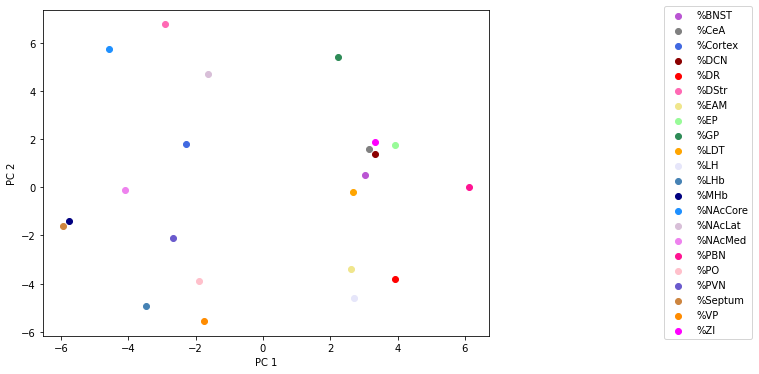

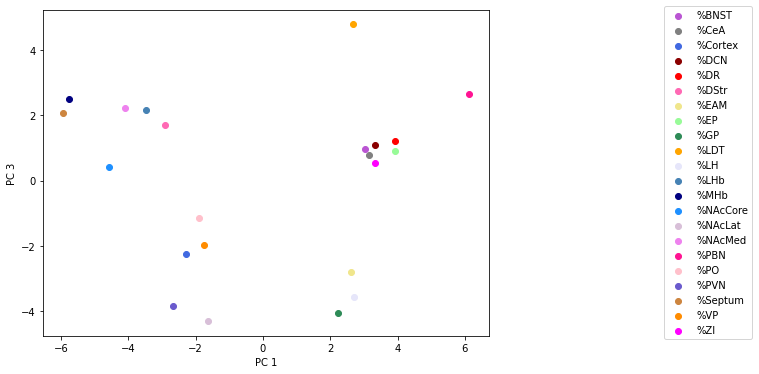

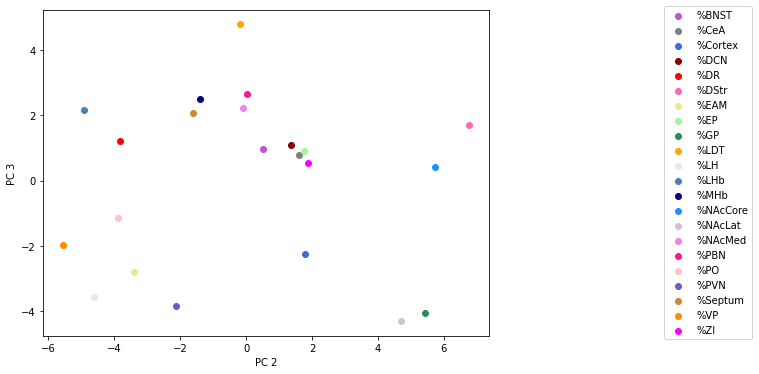

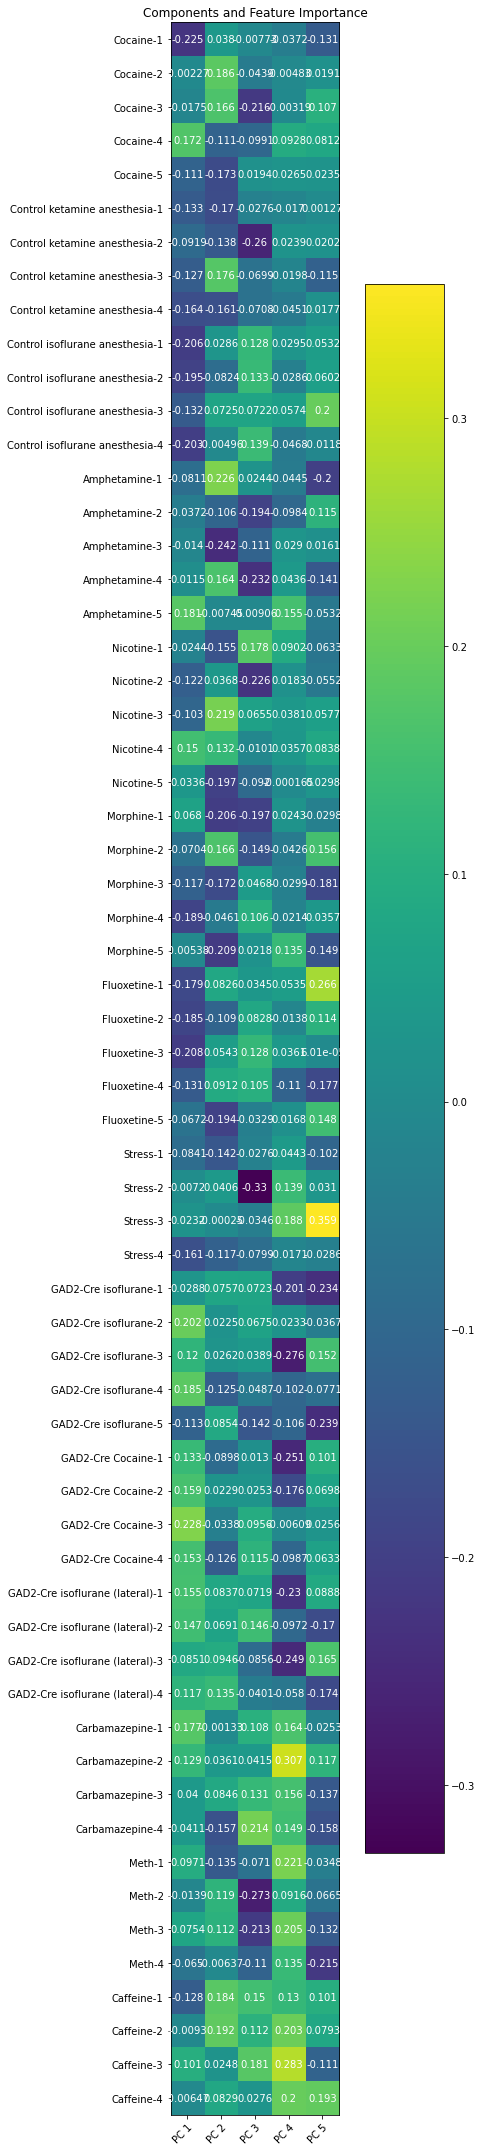

In [45]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


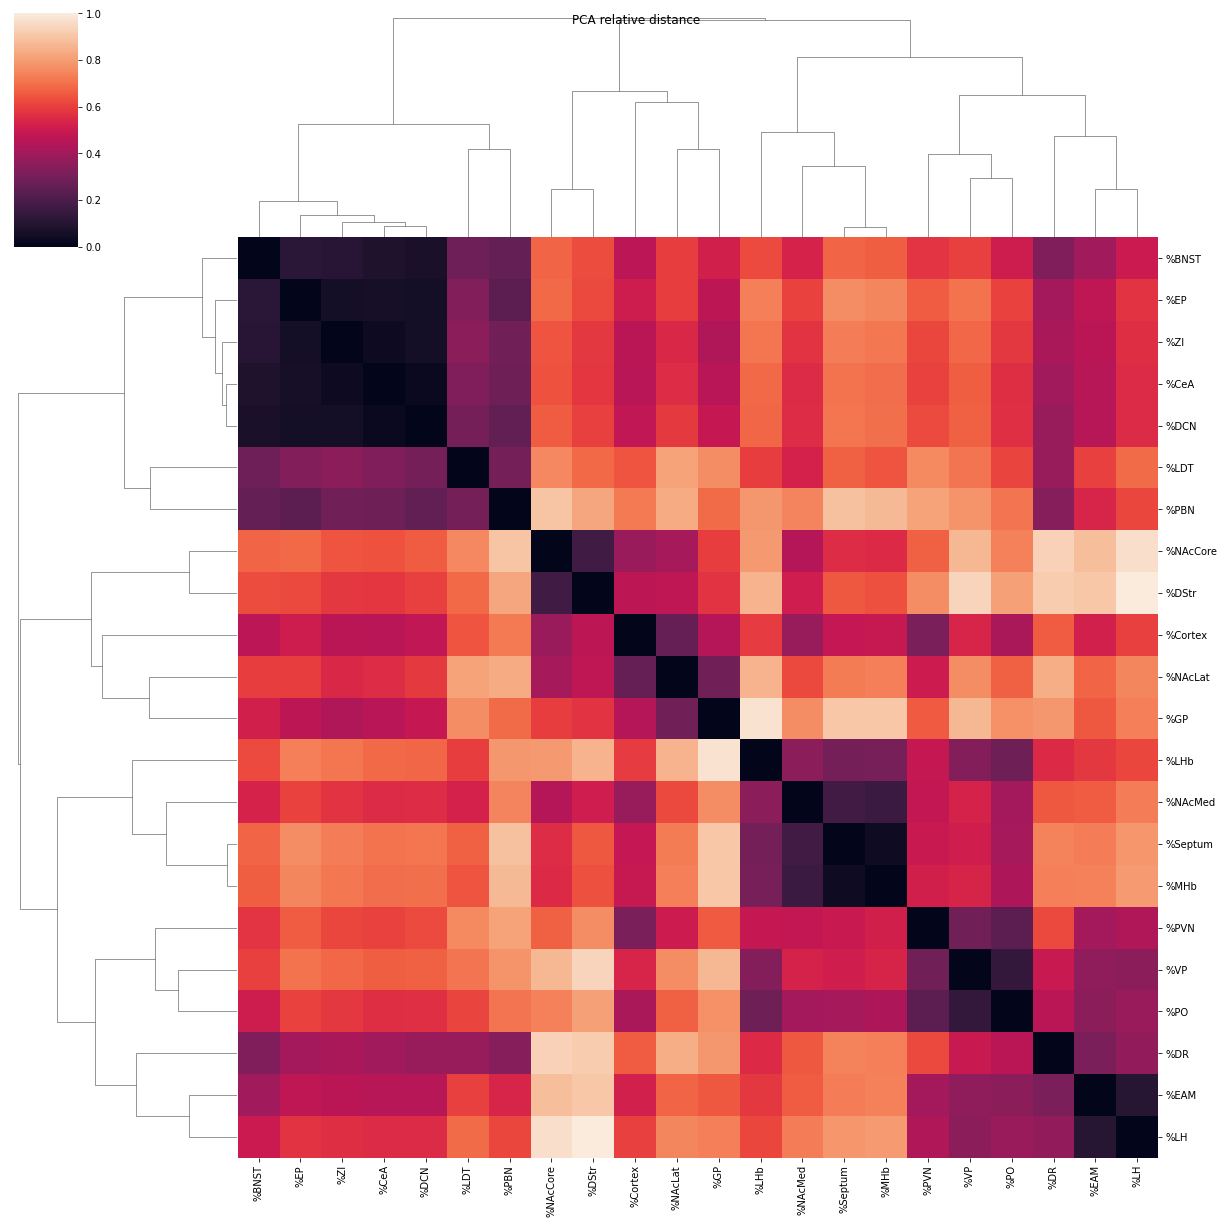

In [46]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

### UMAP

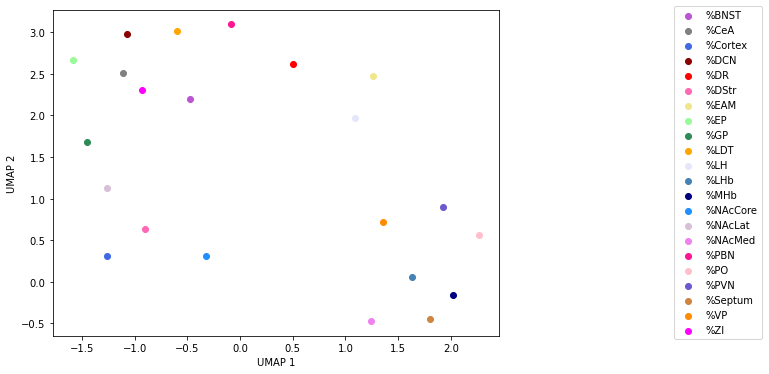

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


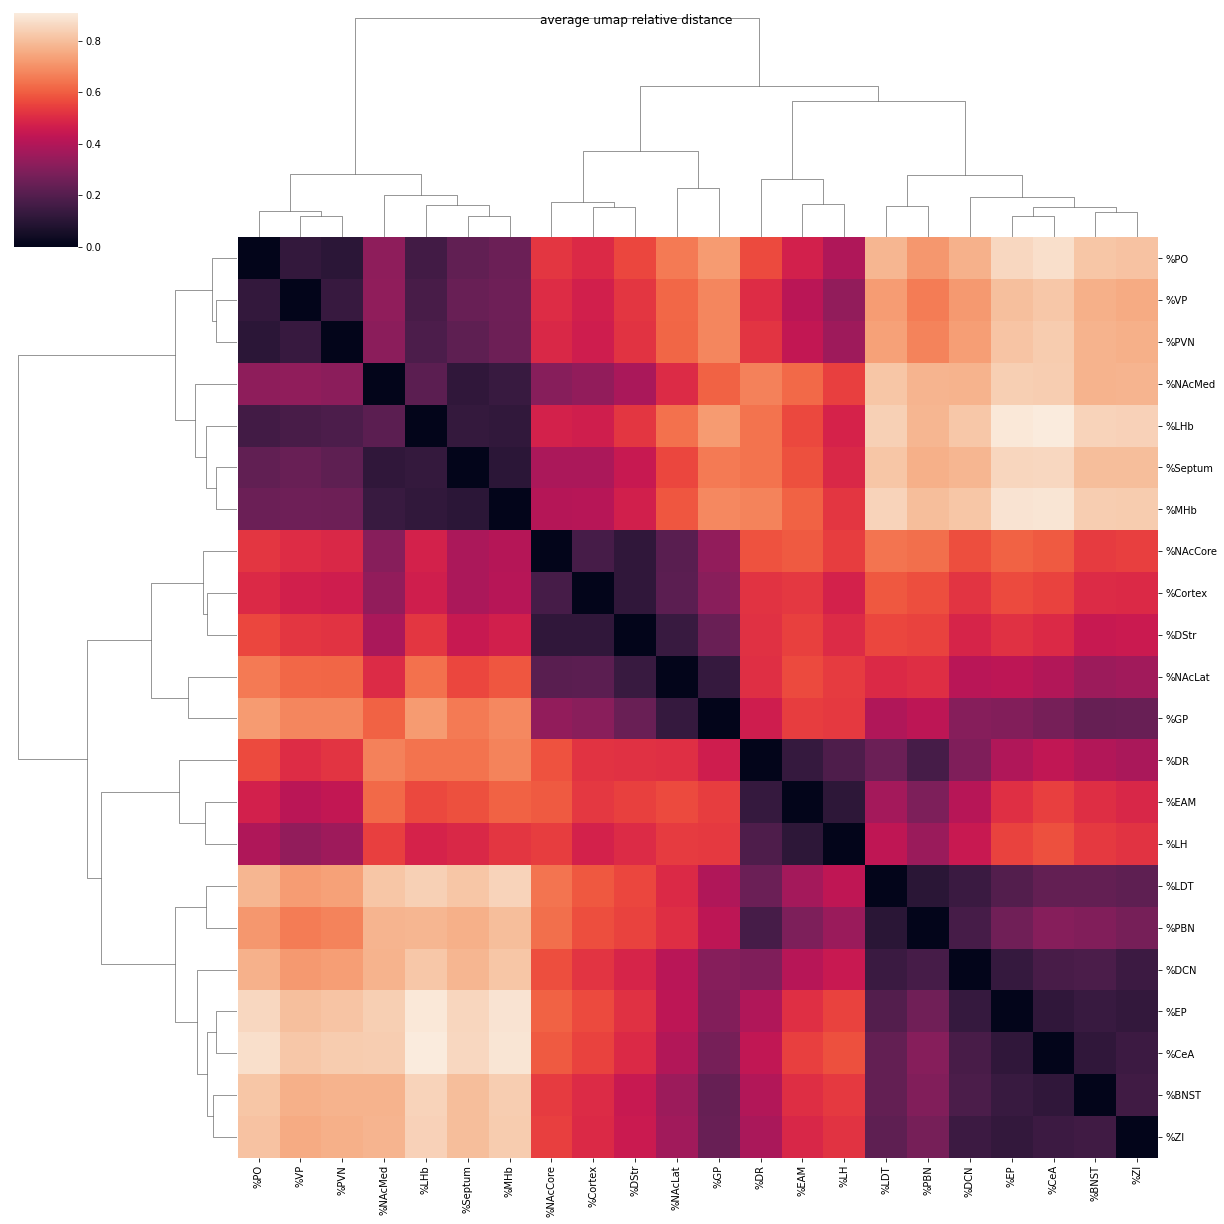

In [47]:
umap_plot(X_scaled,labels)

# DA cells
# all conditions EXCLUDING GAD2-Cre ETOH and Toluene

In [48]:
nogad2etohtol=all_data[(all_data["condition"] == 'Cocaine') |
                (all_data["condition"] == 'Control ketamine anesthesia')| 
                (all_data["condition"] == 'Control isoflurane anesthesia')|
                (all_data["condition"] == 'Nicotine')|
                (all_data["condition"] == 'Morphine')|
                (all_data["condition"] == 'Amphetamine')|
                (all_data["condition"] == 'Fluoxetine')|
                (all_data["condition"] == 'Meth')|
                (all_data["condition"] == 'Carbamazepine')|
                (all_data["condition"] == 'Stress')]

In [49]:
features, labels, regions, condition_nums= get_feats_and_labels(nogad2etohtol)
labels=list(labels)
condition_nums=list(condition_nums)+list(condition_nums2)
regions=list(regions)+list(regions2)
#scale X 
X1=features.to_numpy().astype(float)
X2=features2.to_numpy().astype(float)
X=np.hstack((X1, X2))
#get rid of NAs before scaling 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0) 

#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[10.83316723  8.93036216  5.48273494  5.13903179  3.34581366]


principal component 1  principal component 2  principal component 3  \
0                2.834318              -0.355976              -0.079757   
1               -0.986286               3.358200               1.813760   
2                3.884219               0.979894              -4.402018   
3                3.715325               5.984405              -0.792572   
4                5.581777               3.265337               2.154575   
5               -5.153485              -0.812084              -1.852780   
6               -4.469641               0.780544              -1.719105   
7               -2.657587               4.885948               0.465347   
8                0.034597              -1.124159               0.076781   
9               -1.758370              -3.659062              -0.647644   
10               2.896390              -2.010327              -0.676071   
11               4.401037              -1.822629              -3.032817   
12              -2.869194               0.241498              -3.170205   
13              -4.667477               1.593990               1.592203   
14              -2.385942               5.457710               0.696326   
15               2.818768              -1.514641               1.157717   
16              -3.703502              -3.017616              -2.537462   
17               2.478323              -1.794498              -1.877206   
18              -2.316723              -3.279942               2.155263   
19              -0.598033              -0.377632               4.589525   
20               0.967264              -3.962501               4.019187   
21               1.954223              -2.816460               2.066955   

    principal component 4  principal component 5  
0                4.400715               0.812843  
1               -1.811569              -1.199093  
2               -1.033557              -0.072587  
3               -2.862582               0.042230  
4                0.591946               2.489415  
5                0.762776              -0.786876  
6                0.523624               2.419065  
7                0.821015              -0.358028  
8                3.829163              -2.816016  
9               -1.789487               1.949264  
10              -0.387517              -2.789191  
11              -3.015910              -0.384352  
12               0.372107               4.010216  
13               0.683996              -2.049858  
14               0.321686              -0.601429  
15               5.221296              -0.009318  
16              -0.389015              -0.532224  
17              -0.714802              -2.781595  
18              -2.362701              -0.788797  
19              -2.200141               0.082560  
20              -2.416894               1.069267  
21               1.455853               2.294505

### PCA Plots

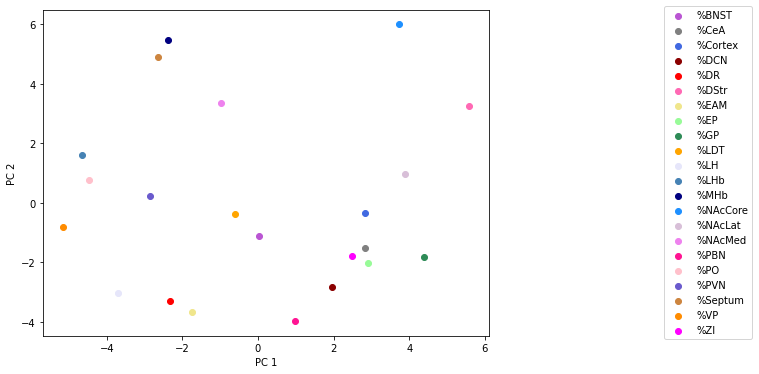

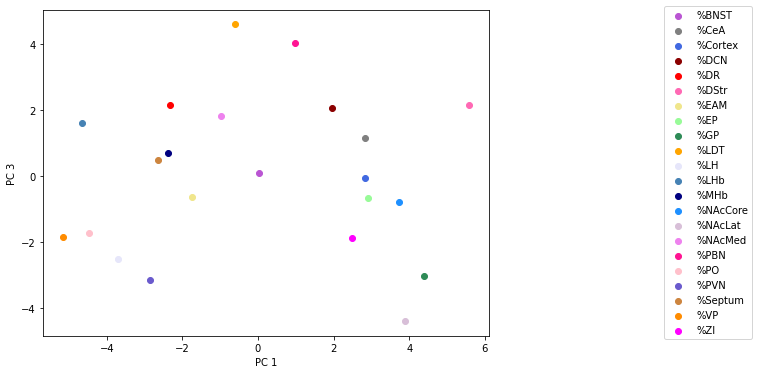

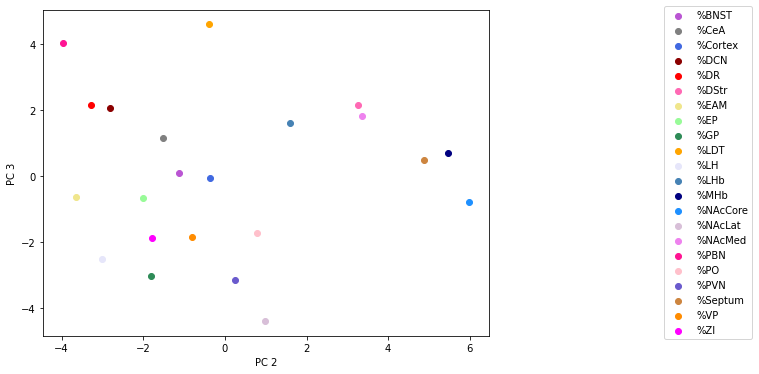

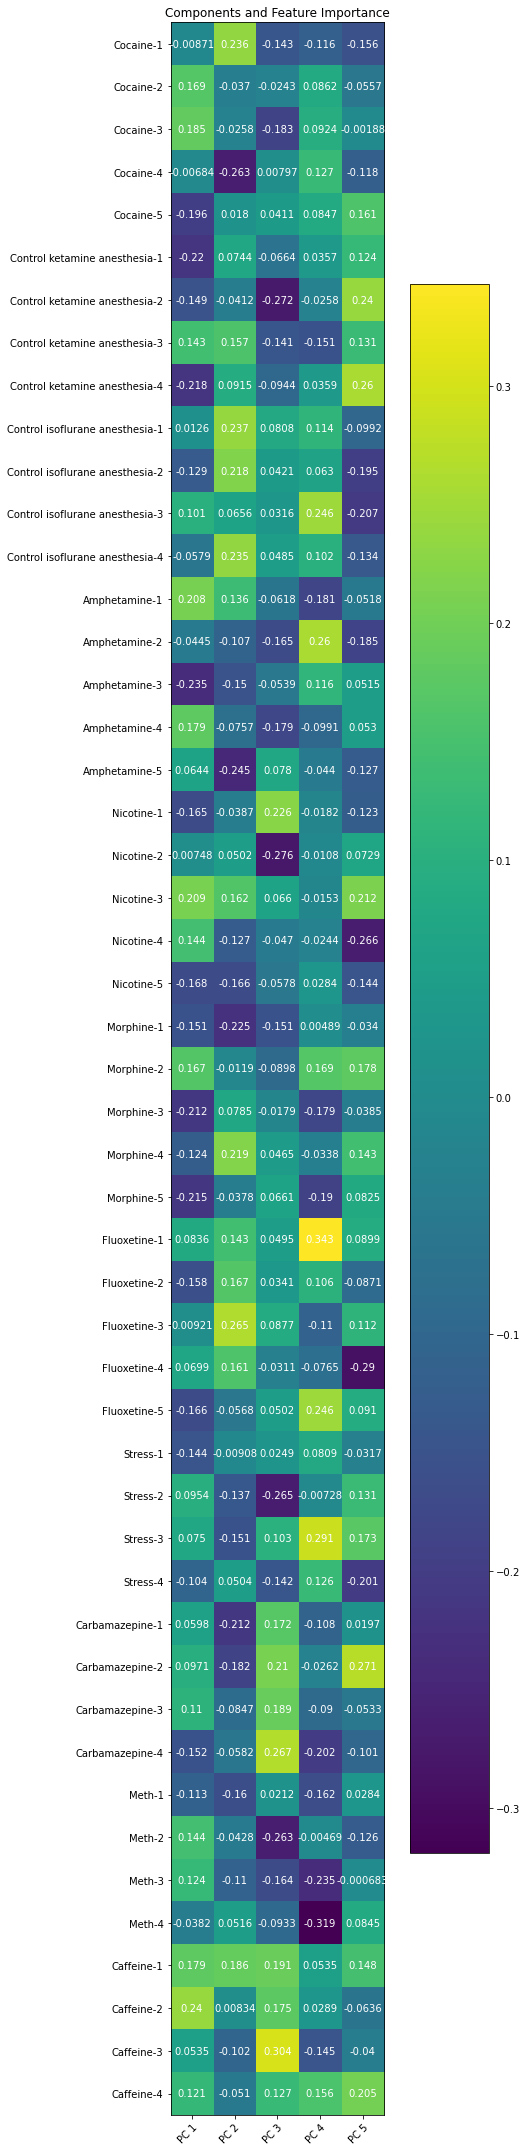

In [50]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


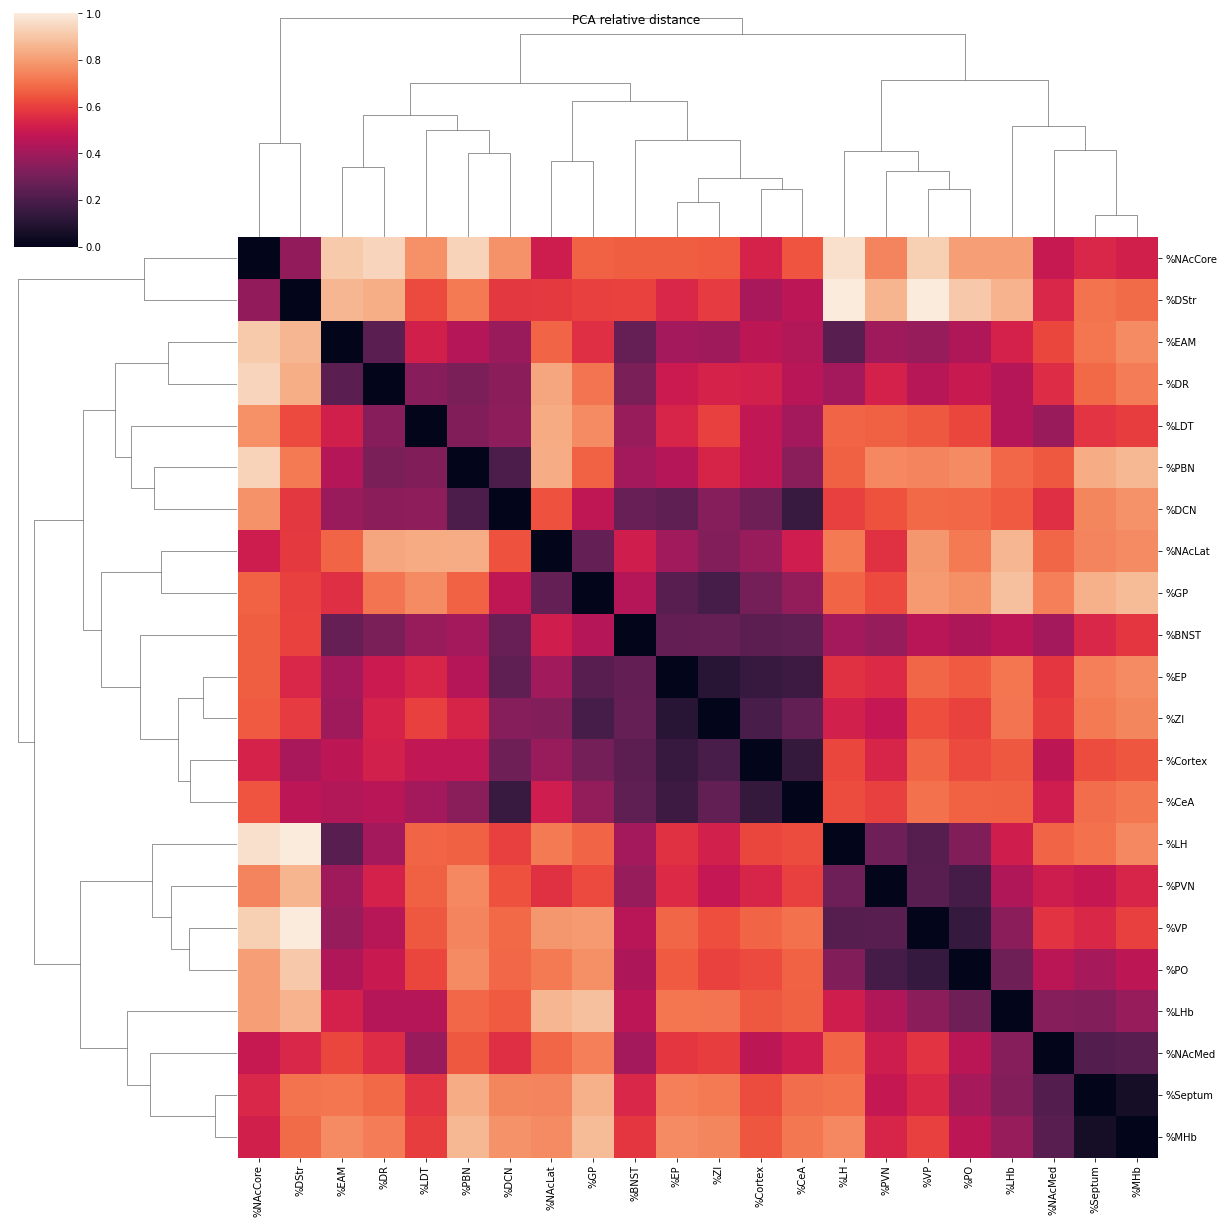

In [51]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

### UMAP

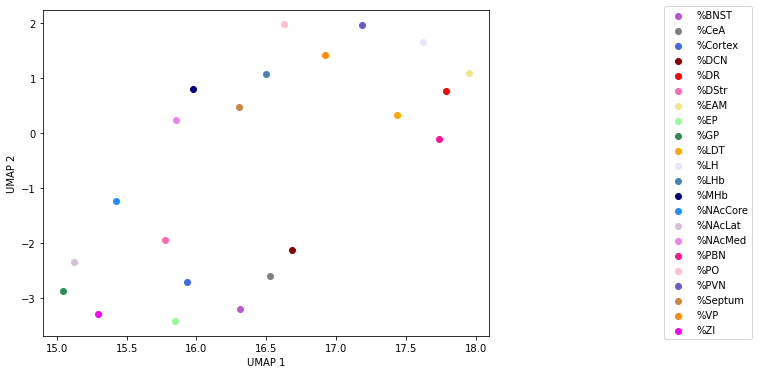

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


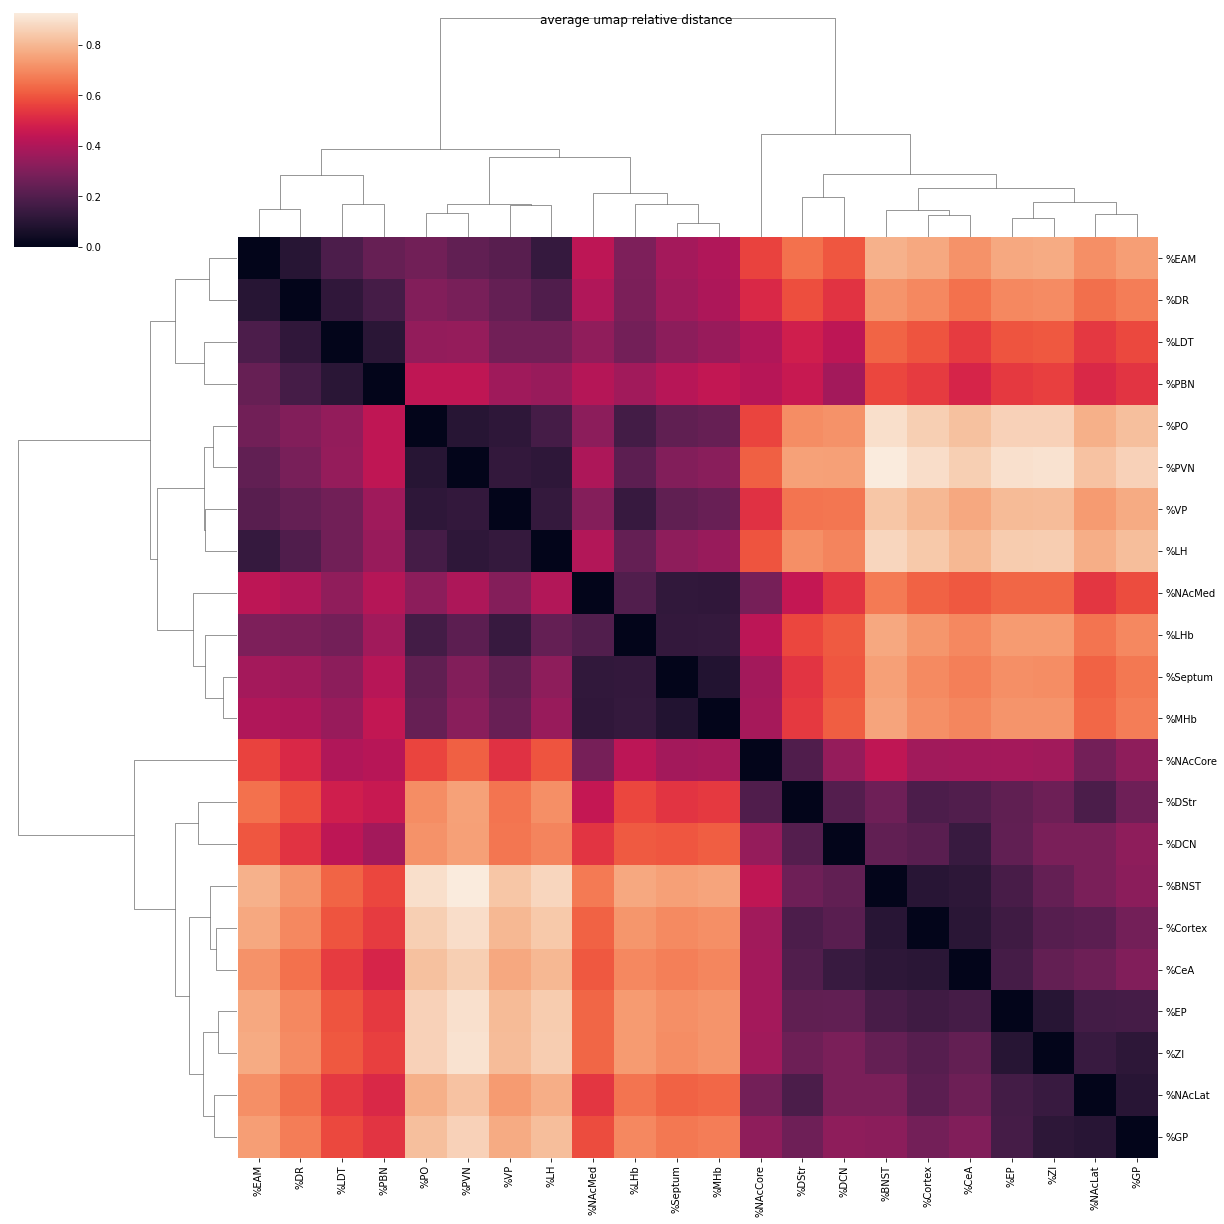

In [52]:
umap_plot(X_scaled,labels)

# DA cells
# addictive drugs only

not iso saline, ketamine saline, fluoxetine, caffeine, or carbamazepine

also removed GAD2-Cre, stress

In [53]:
addictive=all_data[(all_data["condition"] == 'Cocaine') |
                (all_data["condition"] == 'Nicotine')|
                (all_data["condition"] == 'Morphine')|
                (all_data["condition"] == 'Amphetamine')|
                (all_data["condition"] == 'Ethanol')|
                (all_data["condition"] == 'Meth')|
                (all_data["condition"] == 'Toluene')]

In [54]:
features, labels, regions, condition_nums = get_feats_and_labels(all_data)
X=features.to_numpy().astype(float) 

#get rid of NAs before scaling 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0) 

In [55]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[15.98650688 13.95979299  6.8871154   5.08481191  4.80549151]


principal component 1  principal component 2  principal component 3  \
0                1.171138               1.891092               5.276622   
1                2.199372               4.389591              -2.569763   
2                6.199891               0.254145               3.611936   
3                7.486417               3.528830              -1.255690   
4                7.731149               1.088020              -0.590283   
5               -5.126073               2.486390               1.521890   
6               -3.618989               2.797213               0.073609   
7               -0.599545               6.456851              -2.048640   
8               -0.236437              -3.321559              -1.521038   
9               -4.299143              -1.948713               3.281726   
10               1.437258              -4.416324              -1.344881   
11               5.395786              -3.550250               3.960135   
12              -2.115448               3.010272               3.653066   
13              -4.548655               4.304082              -1.194288   
14              -0.629560               6.134783              -2.267173   
15               1.006508              -3.696372              -1.008733   
16              -5.582328              -1.388639               2.564989   
17               1.072391              -3.738438              -1.371938   
18              -4.740725              -2.904922              -0.754448   
19              -0.791295              -1.937086              -4.788436   
20              -1.892421              -5.825441              -1.709043   
21               0.480709              -3.613523              -1.519619   

    principal component 4  principal component 5  
0                4.725301               3.447481  
1               -2.998708               0.190833  
2               -2.715081              -0.869576  
3               -2.999306              -1.760631  
4                2.489439               2.446778  
5               -1.694247              -0.124592  
6               -1.085121              -3.396029  
7                1.292226               0.272975  
8                1.994391              -2.878697  
9               -1.755310               2.501022  
10               1.721011              -0.670433  
11              -2.704270               0.868700  
12               0.716973              -2.328878  
13               0.689023               1.780076  
14               2.016634               1.077694  
15               3.676725              -2.360903  
16              -0.670933              -3.199170  
17               0.938810              -1.782530  
18              -1.470218               2.644883  
19              -2.089444               1.794054  
20              -1.344372               3.417804  
21               1.266477              -1.070859

### PCA Plots

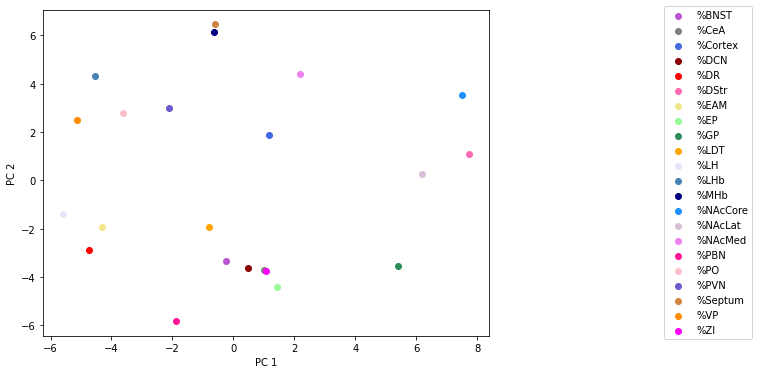

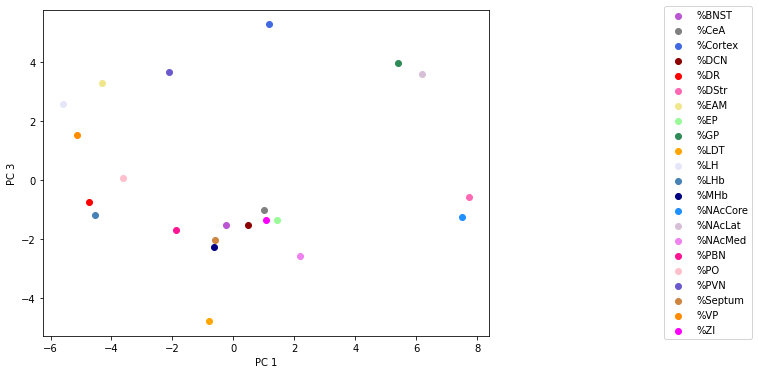

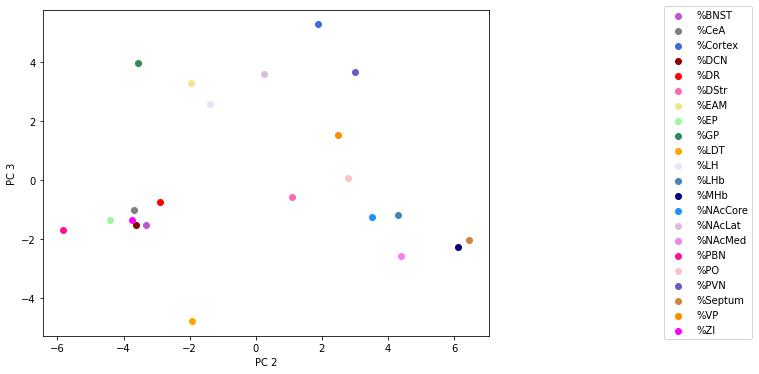

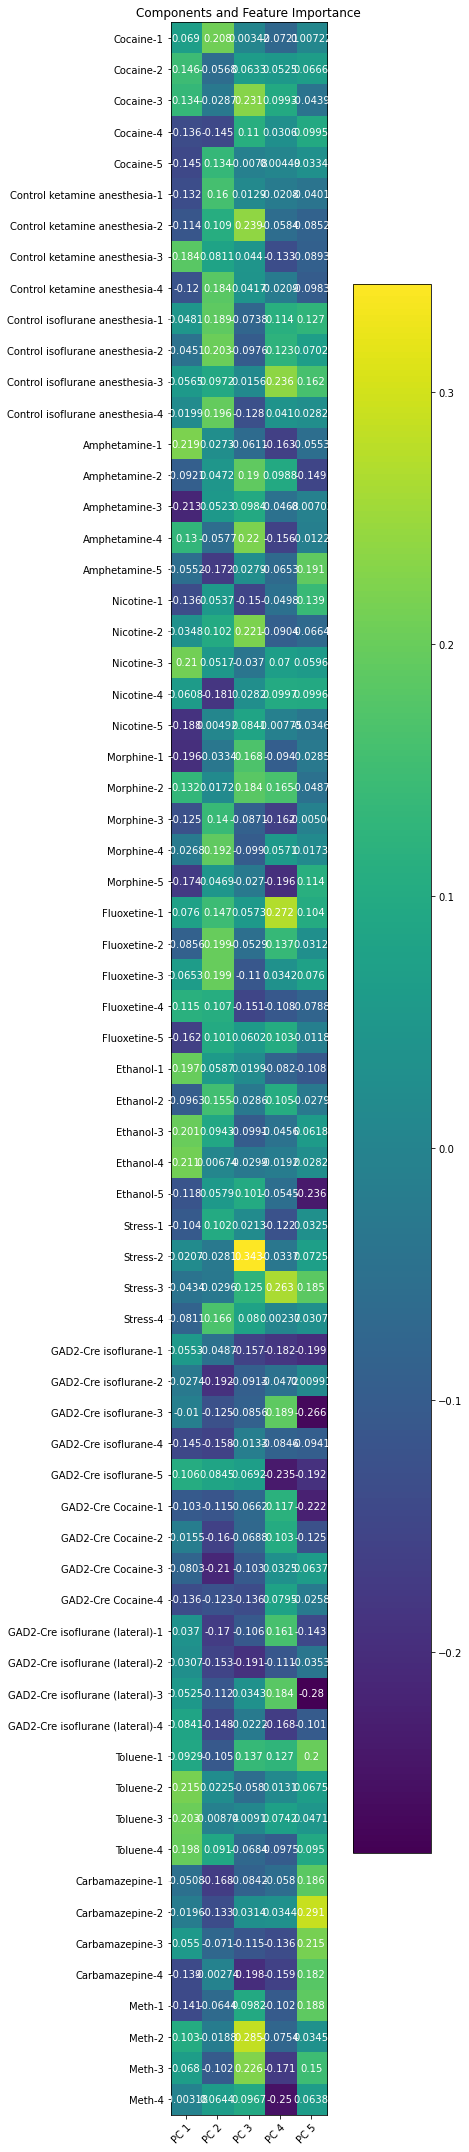

In [56]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3'] 
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


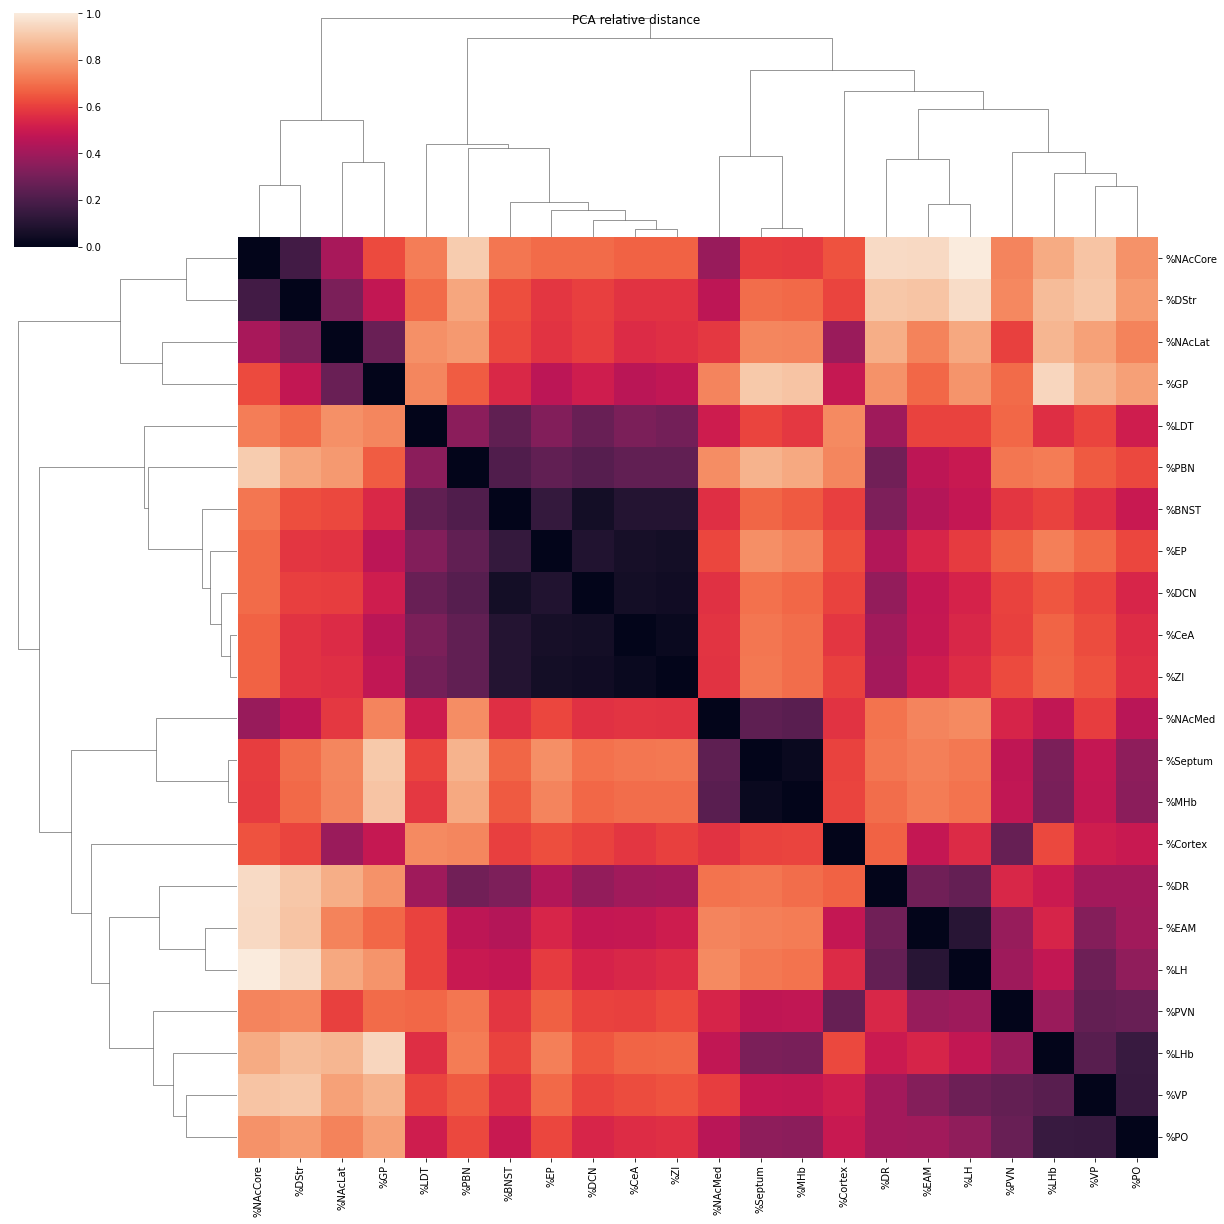

In [57]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

### UMAP

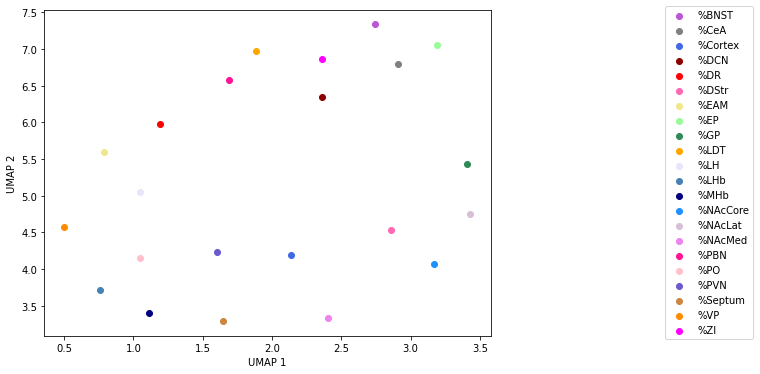

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


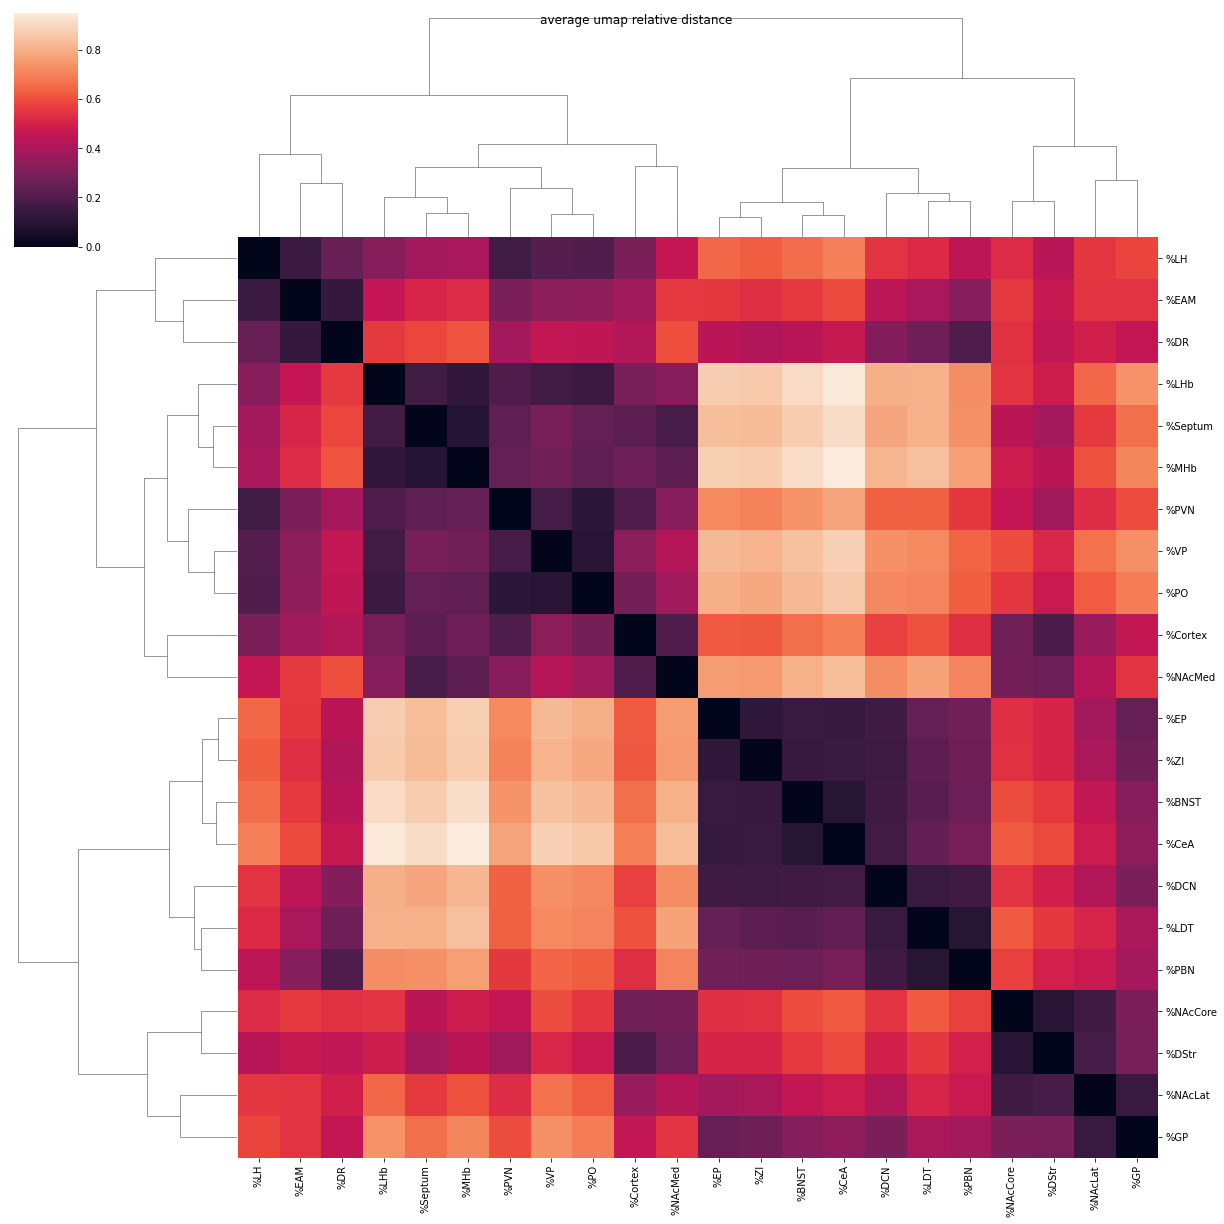

In [58]:
umap_plot(X_scaled,labels) 

# DA cells
# everything BUT the GAD2-Cre brains (below)

In [59]:
nogad2=all_data[(all_data["condition"] == 'Cocaine') |
                (all_data["condition"] == 'Control ketamine anesthesia')| 
                (all_data["condition"] == 'Control isoflurane anesthesia')|
                (all_data["condition"] == 'Nicotine')|
                (all_data["condition"] == 'Morphine')|
                (all_data["condition"] == 'Amphetamine')|
                (all_data["condition"] == 'Fluoxetine')|
                (all_data["condition"] == 'Ethanol')|
                (all_data["condition"] == 'Meth')|
                (all_data["condition"] == 'Toluene')|
                (all_data["condition"] == 'Carbamazepine')|
                (all_data["condition"] == 'Stress')]

In [60]:
features, labels, regions, condition_nums= get_feats_and_labels(nogad2)
labels=list(labels)
condition_nums=list(condition_nums)+list(condition_nums2)
regions=list(regions)+list(regions2)
#scale X 
X1=features.to_numpy().astype(float)
X2=features2.to_numpy().astype(float)
X=np.hstack((X1, X2))
#get rid of NAs before scaling 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0) 

#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[14.21258921 10.02752797  5.84970316  5.58752136  3.50459249]


principal component 1  principal component 2  principal component 3  \
0                1.937643              -1.687591              -0.386140   
1                1.238638               4.278055               1.855802   
2                5.181006              -0.044193              -4.209886   
3                6.030210               5.631340              -0.724368   
4                7.093079               2.154197               2.116702   
5               -5.444770               0.019471              -1.917861   
6               -4.566920               1.853755              -1.907845   
7               -1.995976               5.635867               0.229028   
8               -0.694777              -2.175396              -1.261842   
9               -3.005804              -3.047131               0.272522   
10               3.103916              -2.737444              -0.951592   
11               4.464183              -2.677885              -2.480488   
12              -3.391538               0.836015              -3.015738   
13              -4.845684               2.139885               1.218724   
14              -1.885676               5.903564               0.357195   
15               2.799533              -2.779887               0.672911   
16              -4.968101              -1.886880              -2.339998   
17               1.773384              -2.449700              -1.994882   
18              -3.293365              -2.439288               2.507767   
19              -0.249036               0.590052               5.217452   
20              -0.239931              -3.832363               4.707287   
21               0.959987              -3.284441               2.035249   

    principal component 4  principal component 5  
0                5.059321               1.805329  
1               -1.678758              -3.110159  
2               -1.488415               0.275890  
3               -2.315295               0.285580  
4                1.174250               1.650660  
5               -0.147102              -1.642212  
6               -0.176689               1.401927  
7                1.380799               0.304918  
8                3.507962              -3.340907  
9               -2.003608               1.909039  
10              -0.637610              -2.436525  
11              -3.484858               0.235387  
12              -0.023179               4.412117  
13               1.101870              -2.113278  
14               1.288509              -0.126208  
15               5.541934               0.216698  
16              -1.141177               0.445260  
17              -1.157062              -2.027296  
18              -2.247660              -0.980511  
19              -1.403241               1.279124  
20              -2.191527               1.020262  
21               1.041536               0.534905

## PCA plots

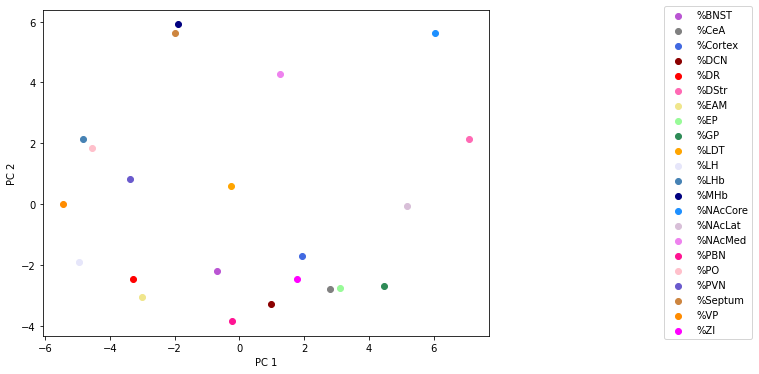

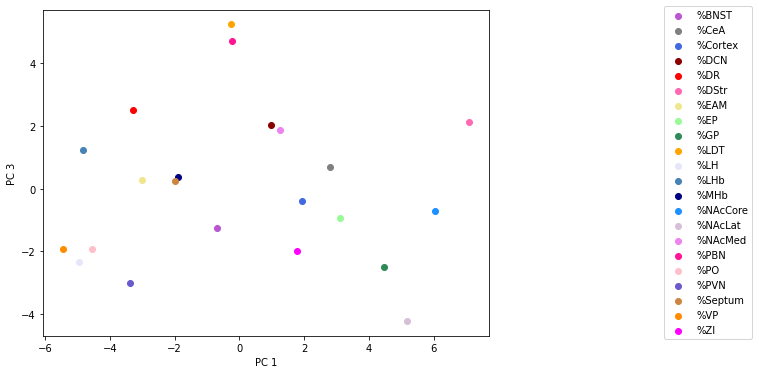

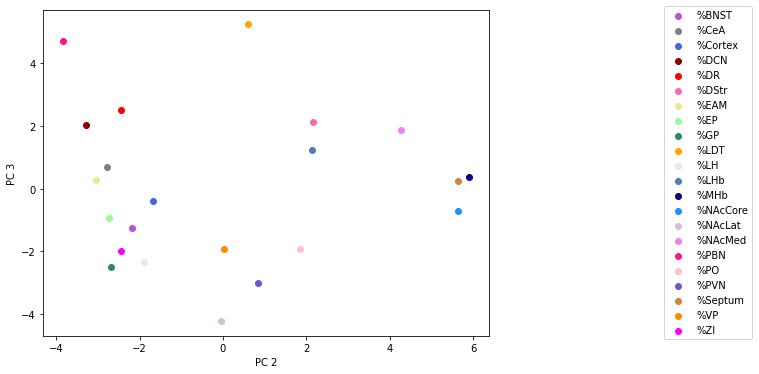

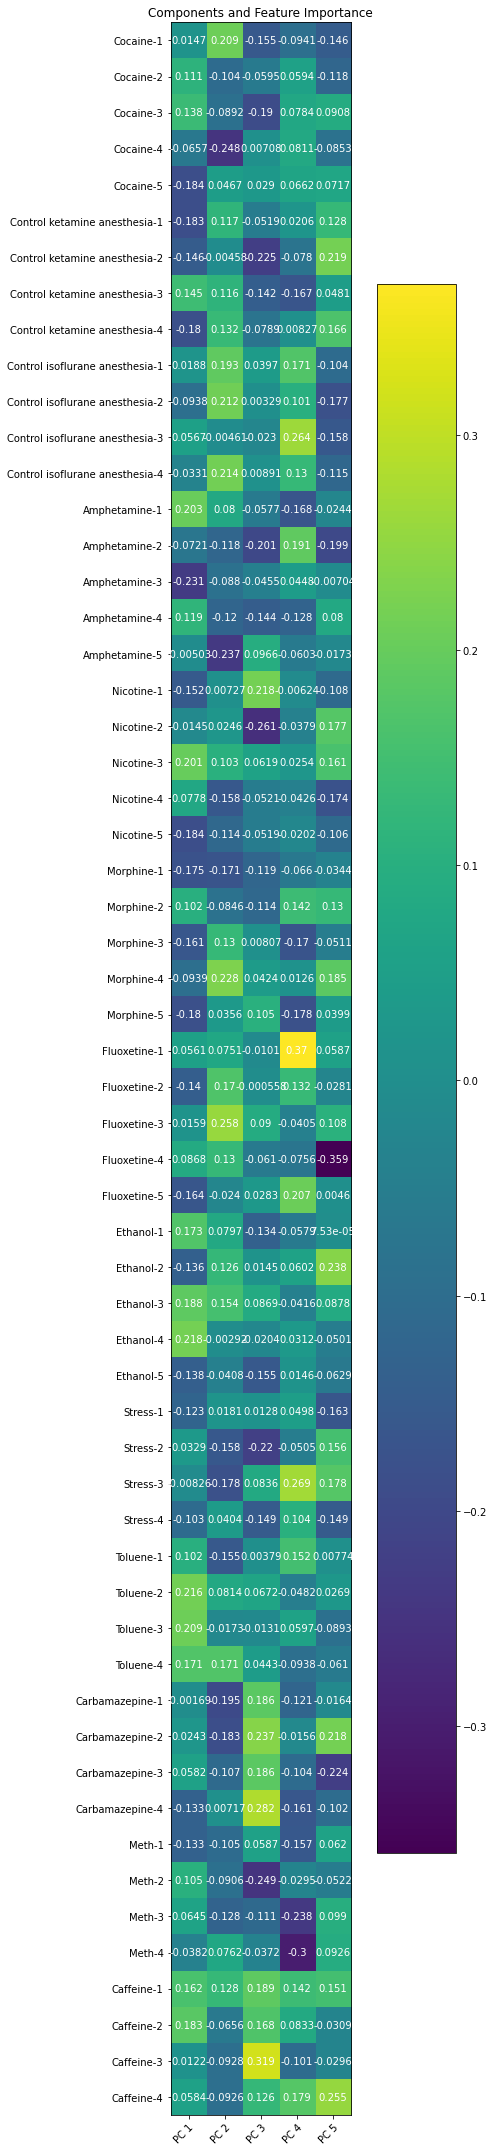

In [61]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3'] 
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


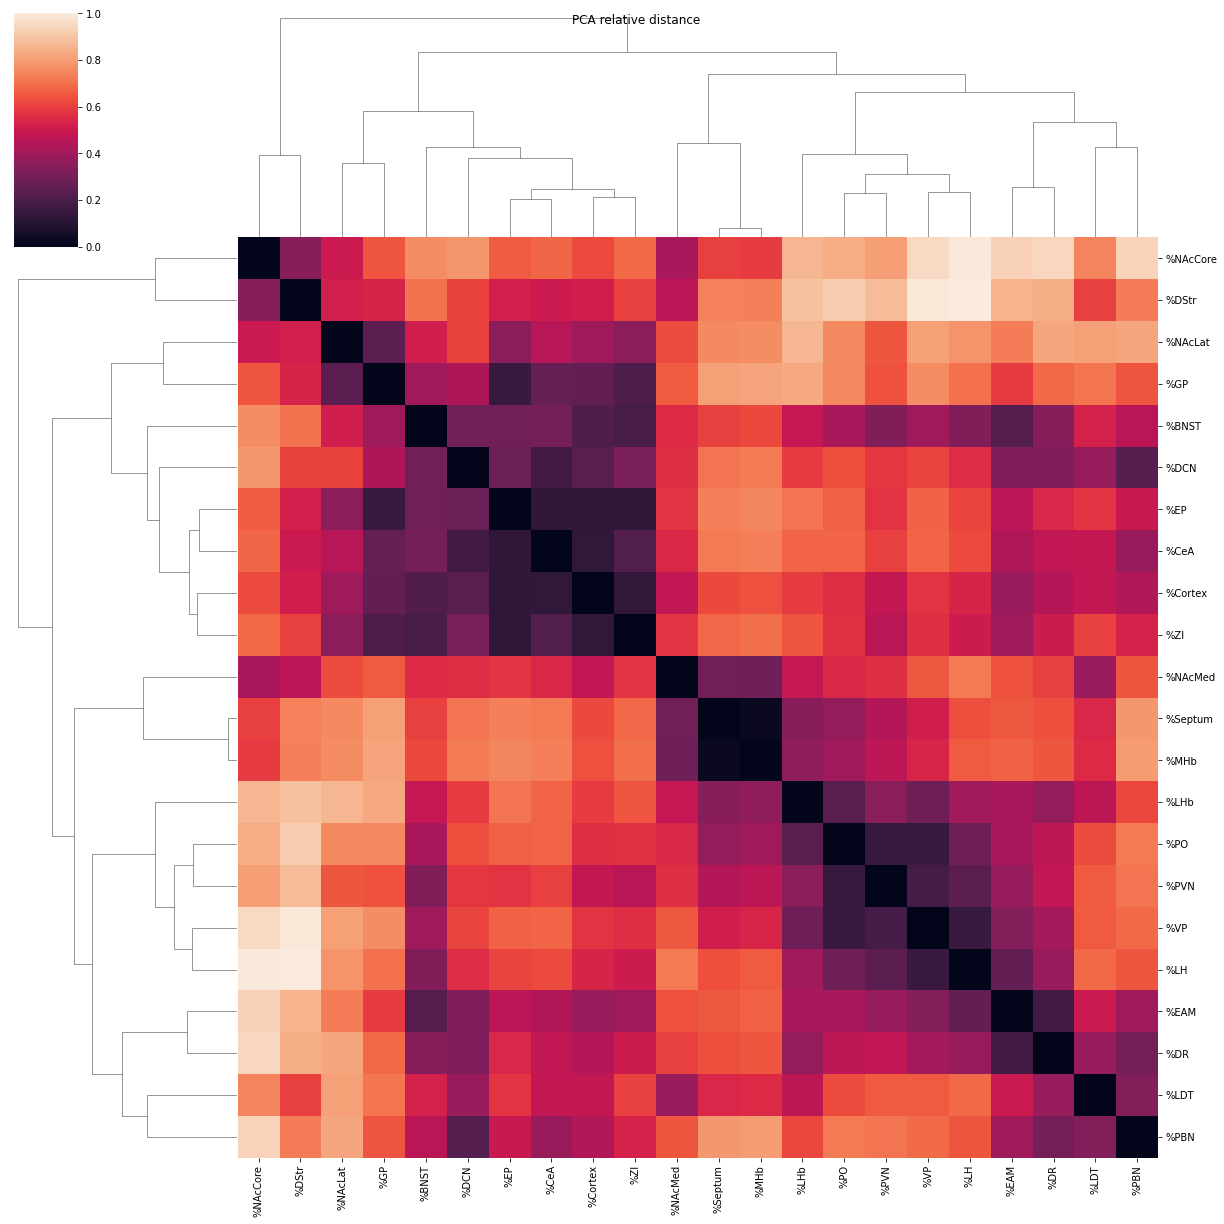

In [62]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

### UMAP

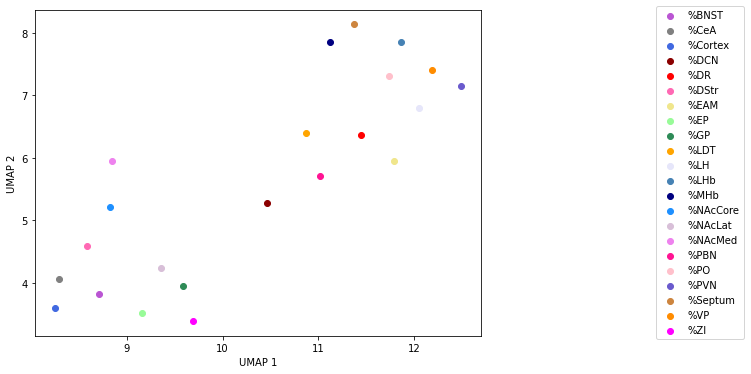

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


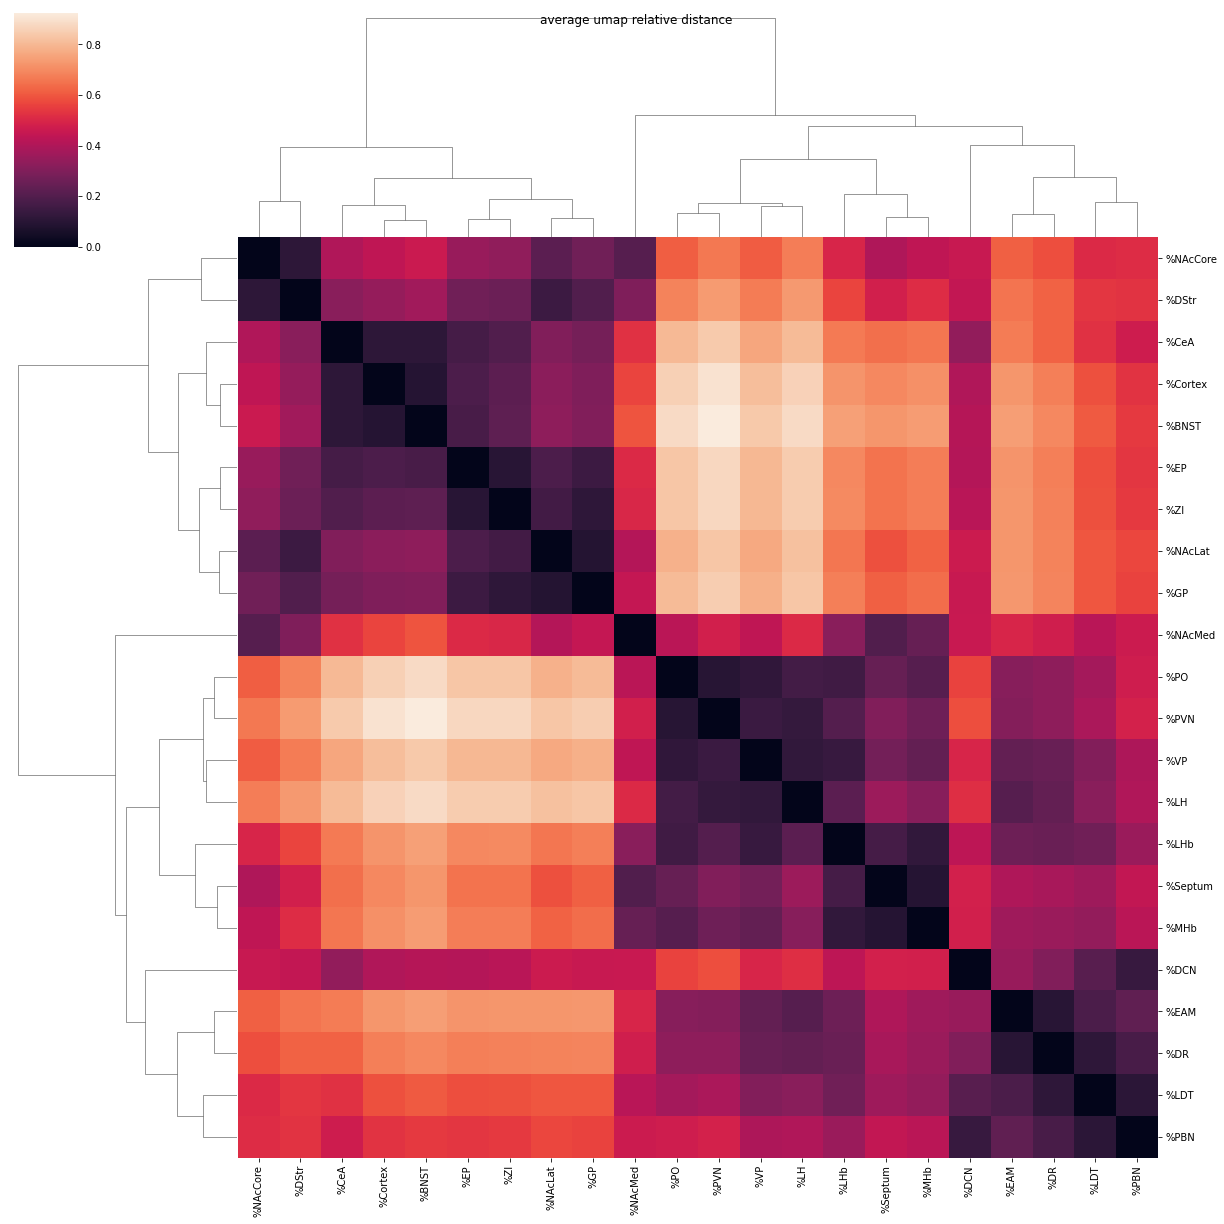

In [63]:
umap_plot(X_scaled,labels) 

# DA cells
# ONLY the GAD2-Cre brains (below)

In [64]:
gad2only2=all_data[(all_data["condition"] == 'GAD2-Cre isoflurane (lateral)') | (all_data["condition"] == 'GAD2-Cre isoflurane')]
features2, labels2, regions2,condition_nums2 = get_feats_and_labels(gad2only2)

In [65]:
gad2only=all_data[(all_data["condition"] == 'GAD2-Cre isoflurane (lateral)') | 
                  (all_data["condition"] == 'GAD2-Cre Cocaine')| (all_data["condition"] == 'GAD2-Cre isoflurane')]
features, labels, regions, condition_nums = get_feats_and_labels(gad2only)
#scale X 
X=features.to_numpy()
#get rid of NAs before scaling
print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

                 9                                                      10  \
                  0          1          2          3          4          0   
%Cortex    0.762227   2.083800   2.378436   2.394715   1.531429   1.777003   
%NAcMed    4.382808   3.562626   2.695560   3.550784   9.028571   1.567944   
%NAcLat    3.493542   4.570916   1.902748   3.055326   9.325714   1.358885   
%NAcCore  12.005082   4.705355   7.293869   5.202312  13.714286   3.867596   
%DStr      7.304679   2.554336   1.427061   1.940545  10.240000   0.836237   
%VP        6.669490   1.008290   1.585624  11.560694   9.600000   9.303136   
%PO        6.034300   1.142729   3.964059   3.179191   3.268571   7.108014   
%Septum    0.254076   0.000000   0.317125   0.206441   0.708571   0.209059   
%BNST      3.811137   4.302039   7.928118   5.078448   2.582857   9.825784   
%EAM       1.905568   3.629845   2.536998   4.128819   3.177143   5.435540   
%EP        0.698708   0.739413   1.109937   0.825764   0.228571 

principal component 1  principal component 2  principal component 3  \
0               -1.273350               1.711953              -0.939378   
1                2.485302              -0.515549              -0.229569   
2                2.668920              -0.494430              -0.278990   
3                3.219929               0.164452              -0.561067   
4                3.006782               0.786853               0.055873   
5               -0.510831              -2.708003              -1.057358   
6                0.198974              -0.620069              -1.694673   
7                0.905149               0.327878              -1.830823   
8               -1.392233               1.846466               0.015220   
9               -2.034213              -1.632213              -1.698275   
10              -2.250405               0.692452               2.080929   
11               2.628256              -0.360869               2.497005   
12               0.756653               2.894410              -1.178284   
13              -0.998680              -2.419772              -0.349487   
14              -0.643170              -0.951050              -0.660410   
15              -0.610239               2.726009              -1.113694   
16              -1.453563               0.106025              -1.052445   
17              -1.013368               1.565724               2.123007   
18              -1.972681              -0.954170              -0.128664   
19               1.345642              -1.443585               2.449072   
20              -1.310610              -2.114676               1.433120   
21              -1.752264               1.392163               2.118890   

    principal component 4  principal component 5  
0                2.428965               0.442031  
1                0.343658               0.379657  
2                1.210136               0.010587  
3               -0.025241               0.041608  
4                0.355618               0.575076  
5               -0.246282               2.339698  
6               -2.363898              -0.348938  
7               -1.318235               0.569259  
8               -1.740893              -0.340476  
9                0.817713              -0.361823  
10              -1.668138               0.877085  
11              -0.264761               0.424943  
12               1.187310              -0.789607  
13              -1.804551               0.075605  
14              -0.609203              -0.291470  
15              -1.198030              -1.395660  
16               2.176394               0.853457  
17              -0.653752               0.691935  
18               0.579386              -2.120375  
19              -0.174014              -2.239567  
20               2.253913              -0.918945  
21               0.713904               1.525919

## PCA plots

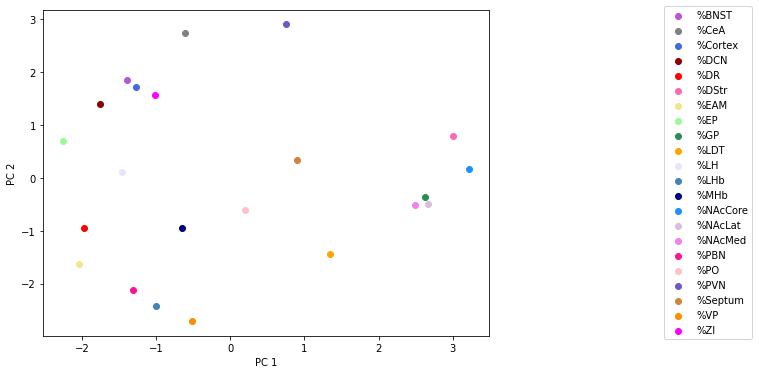

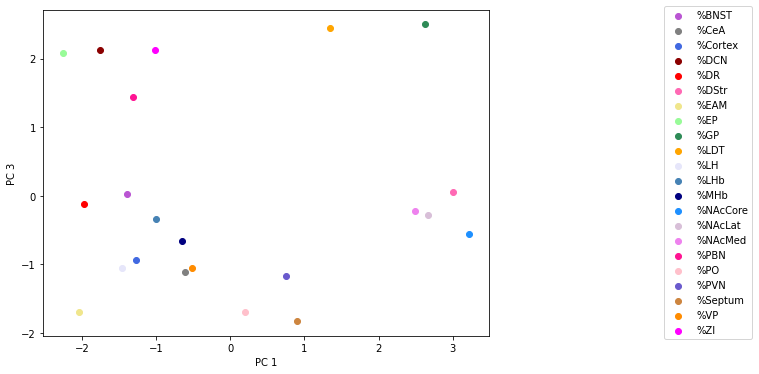

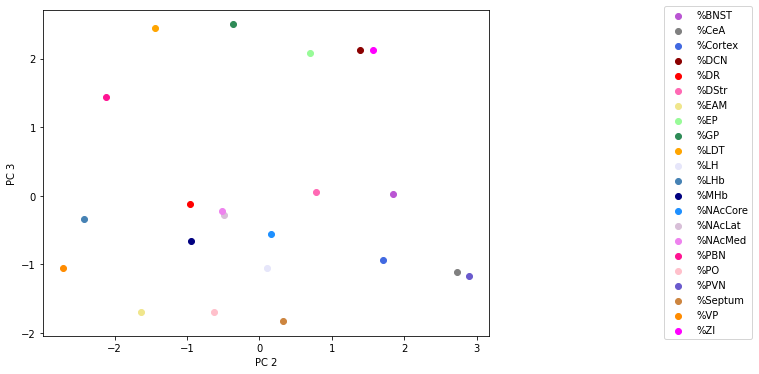

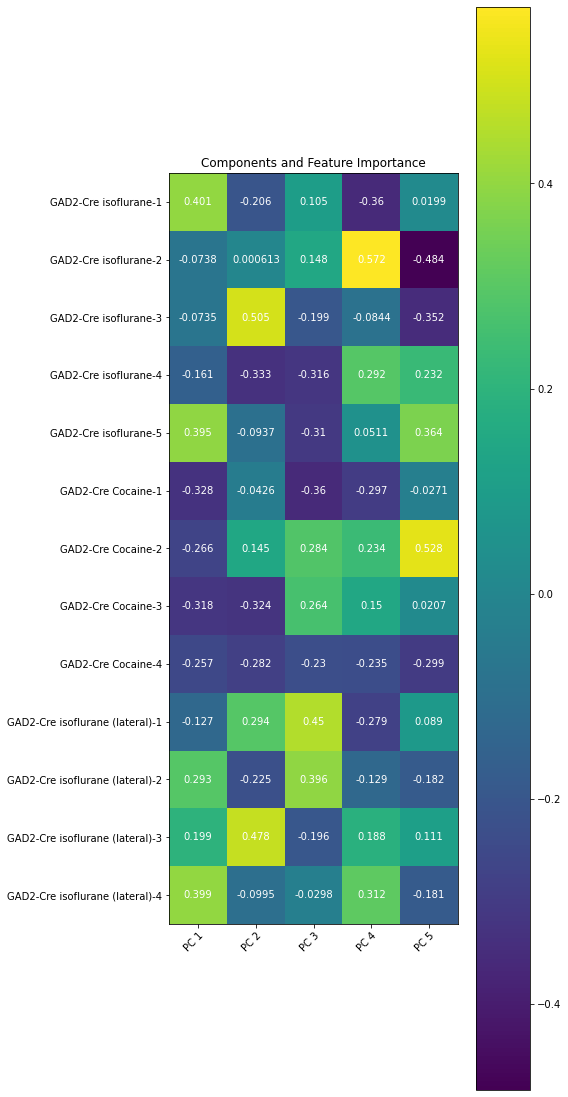

In [66]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3'] 
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


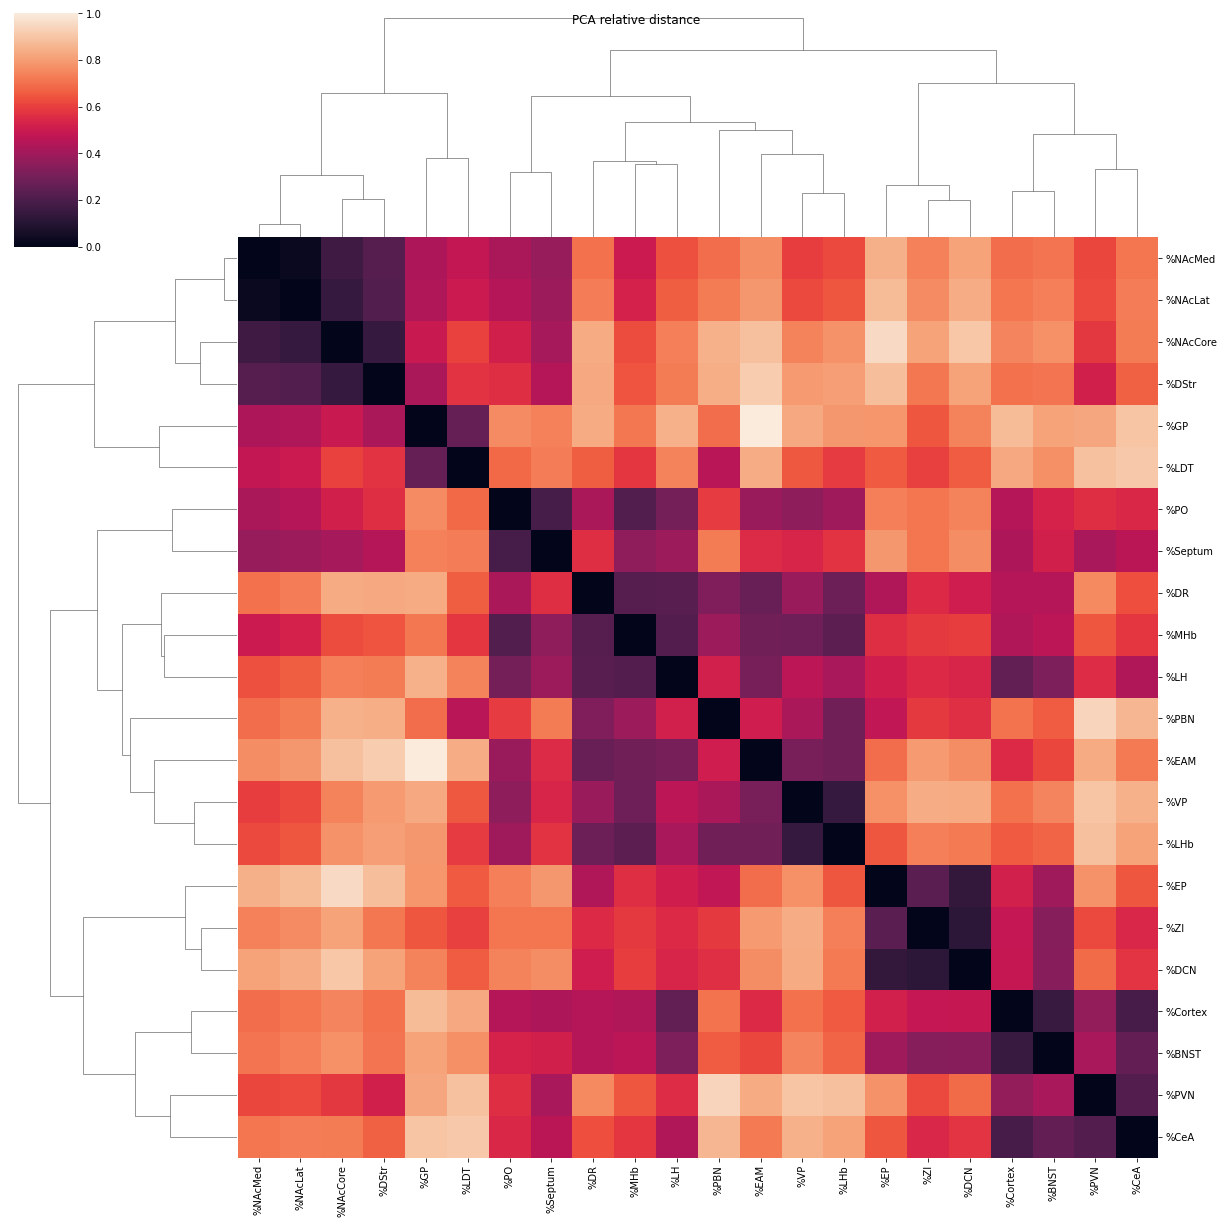

In [67]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

## UMAP

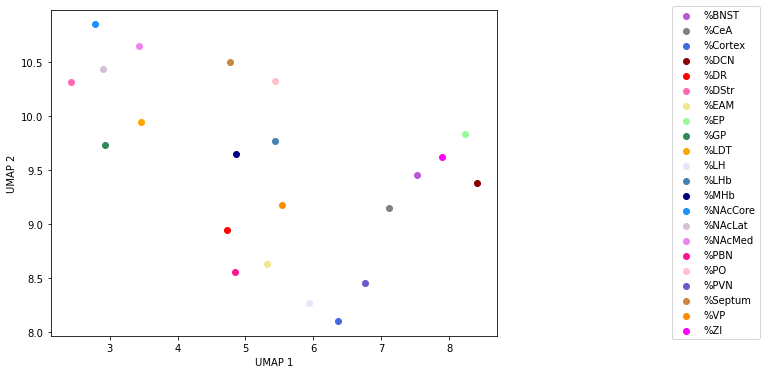

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


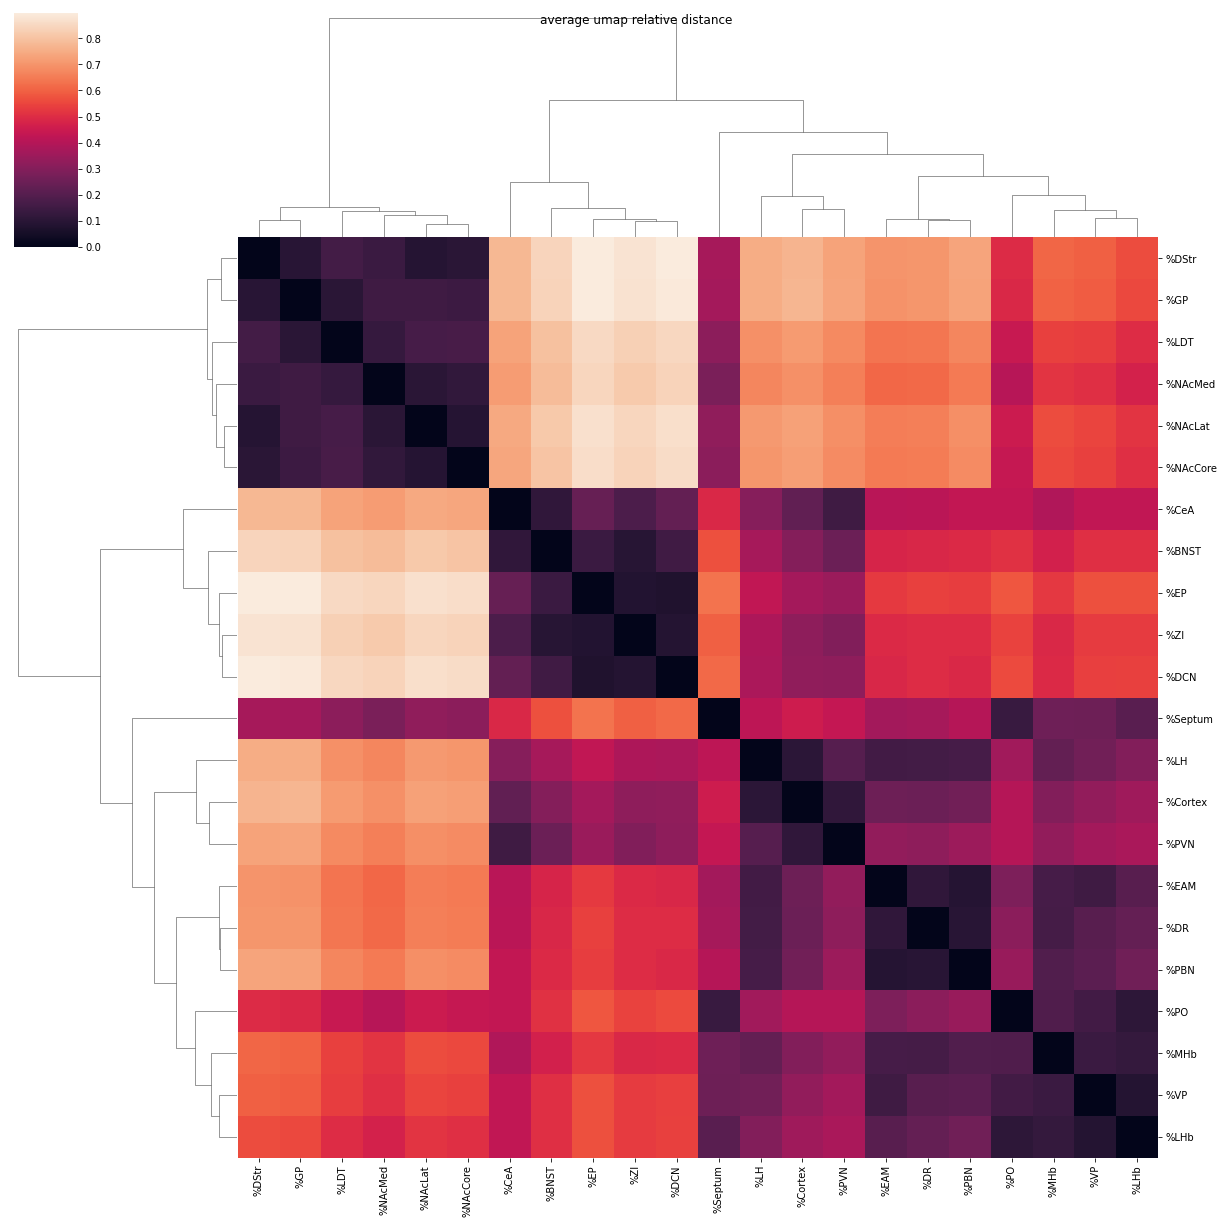

In [68]:
umap_plot(X_scaled,labels) 

# DA cells
# removed GAD2-Cre, and Ethanol conditions (below)

In [69]:
nogad2nomdmaetoh=all_data[(all_data["condition"] == 'Cocaine') |
                (all_data["condition"] == 'Control ketamine anesthesia')| 
                (all_data["condition"] == 'Control isoflurane anesthesia')|
                (all_data["condition"] == 'Nicotine')|
                (all_data["condition"] == 'Morphine')|
                (all_data["condition"] == 'Amphetamine')|
                (all_data["condition"] == 'Fluoxetine')|
                (all_data["condition"] == 'Meth')|
                (all_data["condition"] == 'Toluene')|
                (all_data["condition"] == 'Carbamazepine')|
                (all_data["condition"] == 'Stress')]

In [70]:
features, labels, regions, condition_nums = get_feats_and_labels(nogad2nomdmaetoh)
labels=list(labels)
condition_nums=list(condition_nums)+list(condition_nums2)
regions=list(regions)+list(regions2)
#scale X 
X1=features.to_numpy().astype(float)
X2=features2.to_numpy().astype(float)
X=np.hstack((X1, X2))
#get rid of NAs before scaling 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0) 
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[13.47563591 11.74227888  6.14670599  4.82264128  3.96216842]


principal component 1  principal component 2  principal component 3  \
0                0.093954               0.930064               5.117990   
1               -0.182494               4.537446              -2.996588   
2                4.699916               1.910869               3.738940   
3                4.285134               5.988564              -0.932028   
4                5.937301               3.715773              -0.443073   
5               -5.412233               0.061167               1.176577   
6               -4.157358               1.421419               0.212409   
7               -3.250426               5.278149              -1.081386   
8                1.533098              -2.118356              -1.452619   
9               -2.899831              -3.496181               2.742376   
10               3.149679              -2.433243              -0.752842   
11               6.349214              -1.358524               2.888173   
12              -2.888635               0.553170               3.698625   
13              -5.431812               2.164099              -1.054201   
14              -2.941120               5.361902              -1.262554   
15               2.646214              -2.007025              -0.196237   
16              -3.870839              -3.646911               2.349320   
17               2.451510              -1.804427              -1.142200   
18              -2.854797              -4.342804              -1.461492   
19              -0.407602              -2.093589              -4.735936   
20               0.758865              -5.477193              -2.501425   
21               2.392260              -3.144368              -1.911829   

    principal component 4  principal component 5  
0                5.037682               2.583297  
1               -2.172490               0.980283  
2               -3.140791              -0.384541  
3               -3.391261              -0.438030  
4                2.935062               1.923931  
5               -1.265351              -0.053606  
6               -1.806549              -2.720395  
7                1.085020              -0.076859  
8                1.523807              -2.545506  
9               -1.713560               2.840708  
10               1.276693              -0.082392  
11              -2.849450               1.553741  
12               0.102902              -2.699521  
13               1.270158               1.225858  
14               1.830304               0.658660  
15               3.048849              -2.794585  
16              -1.406229              -2.162985  
17               0.314631              -1.646221  
18              -0.595234               3.169418  
19              -1.043764               0.612811  
20              -0.494415               2.508482  
21               1.453986              -2.452549

## PCA plots

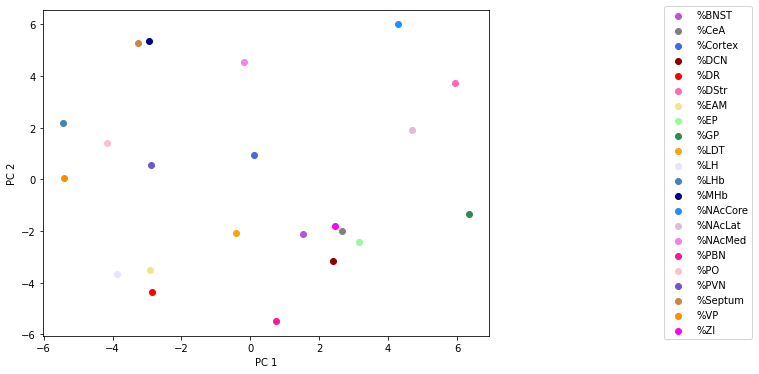

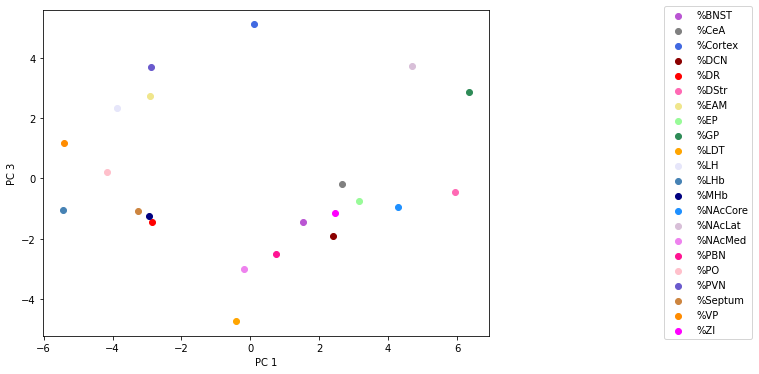

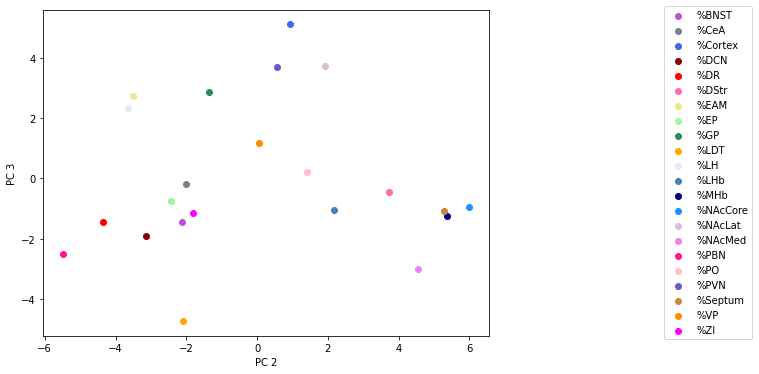

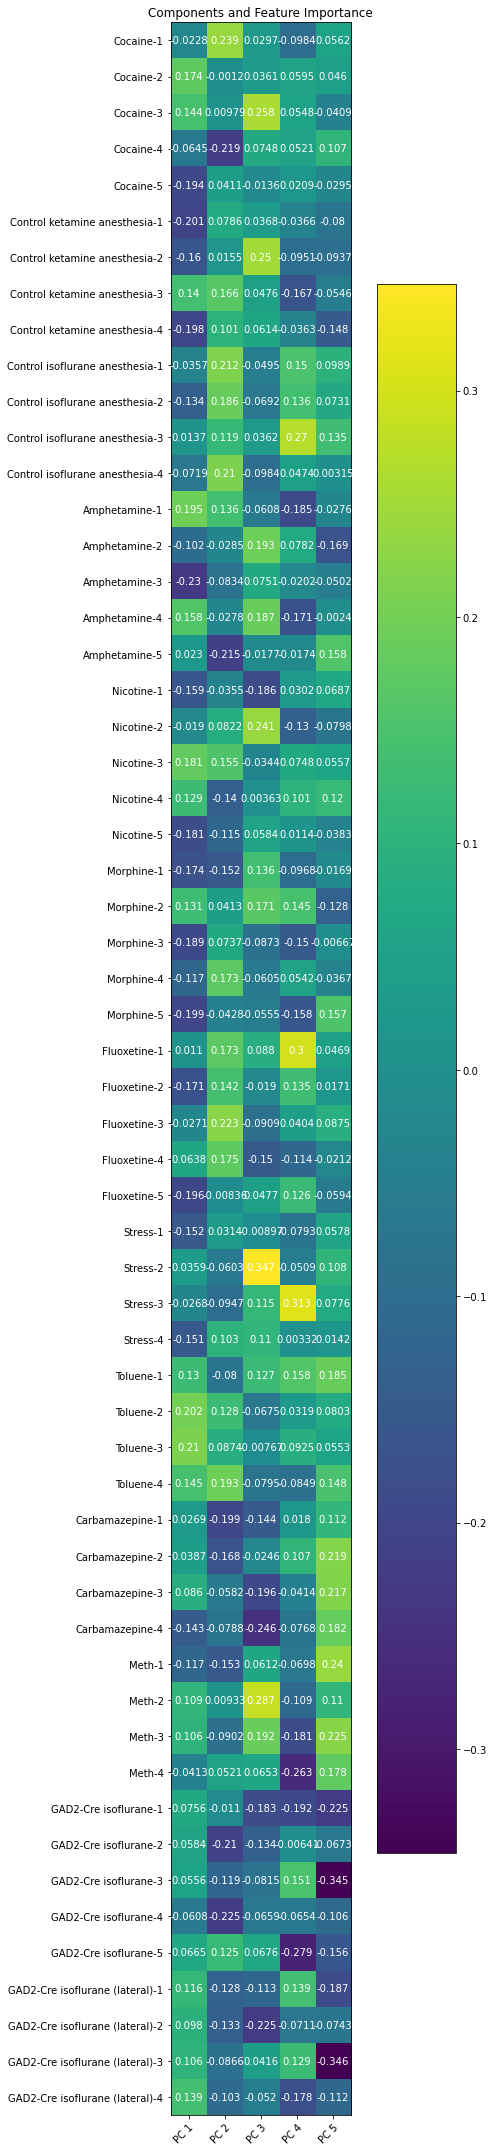

In [71]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


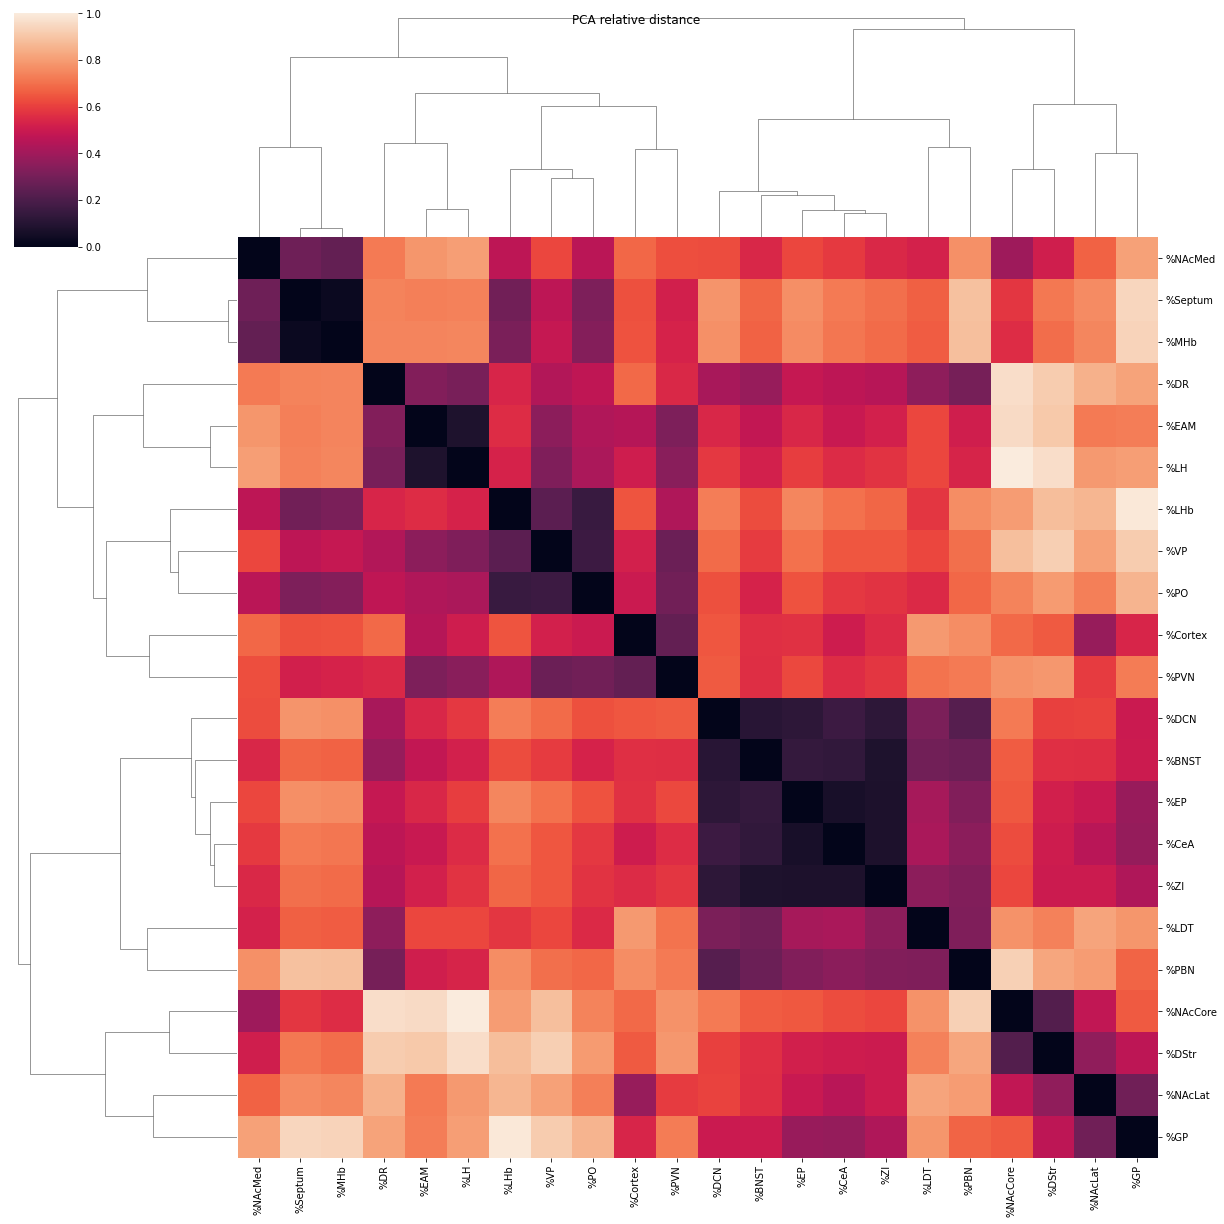

In [72]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")
cm.fig.set_size_inches(18, 18)

## UMAP

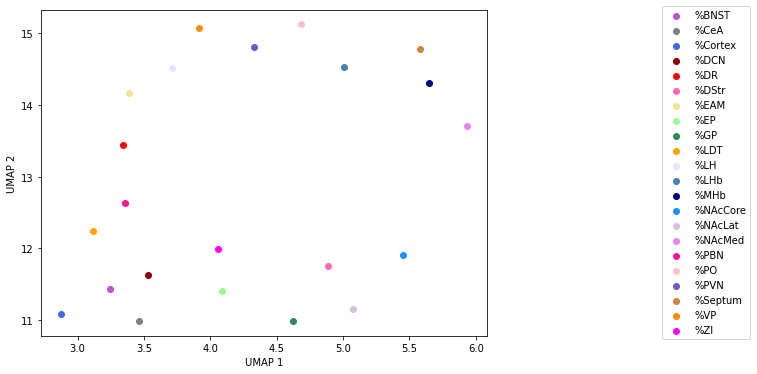

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


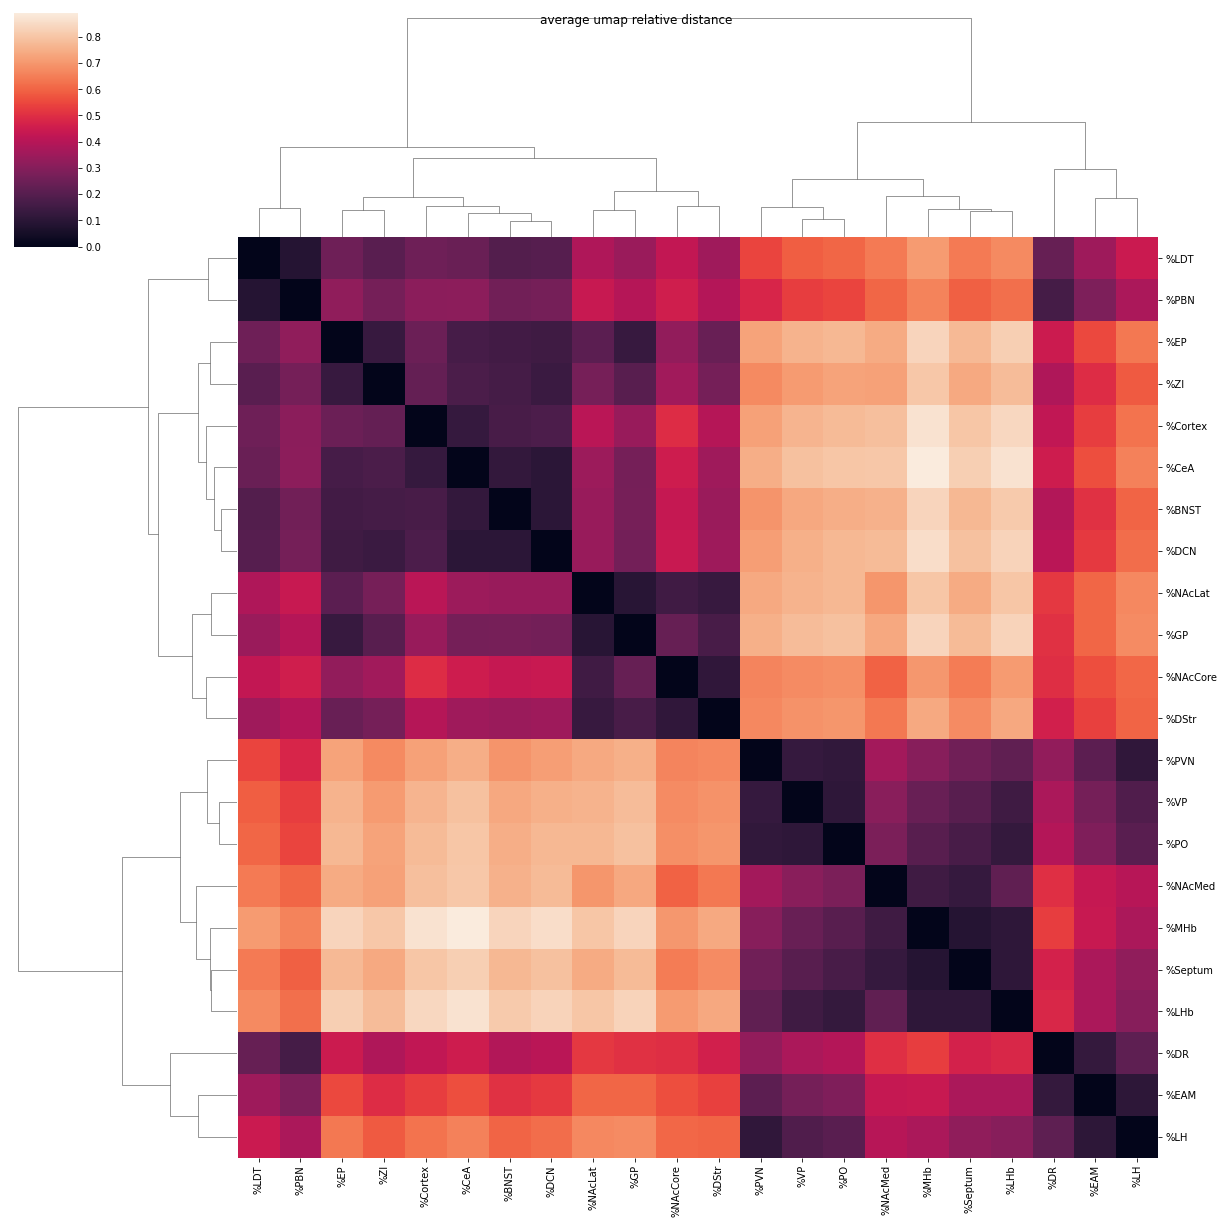

In [73]:
umap_plot(X_scaled,labels) 

# NAcMed (below)

In [74]:
features, labels, regions, condition_nums = get_feats_and_labels(NAcMed_data) 

In [75]:
#scale X 
X=features.to_numpy()
#get rid of NAs before scaling
print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

                          0                                              \
                          0          1          2          3          4   
%Anterior Cortex   1.650943   1.986755   2.566872   0.290698   0.650759   
%NAcMed            3.537736   3.973510   6.803456   3.488372   2.603037   
%NAcLat            0.471698   1.490066   1.594949   2.325581   0.433839   
%NAcCore           1.650943   4.470199   4.286426   3.488372   3.470716   
%DStr              0.000000   0.000000   0.024921   0.581395   0.000000   
%VP                5.660377  15.894040  15.949493  24.418605  23.210412   
%PO                3.301887   2.483444   4.211663   4.069767   4.772234   
%Septum            0.471698   0.993377   1.495265   0.290698   0.433839   
%BNST              1.179245   1.490066   2.965609   2.034884   3.687636   
%EAM               4.009434   7.947020   2.442266   4.651163   3.036876   
%EP                0.000000   0.000000   0.049842   0.000000   0.216920   
%GP                2.3584

In [76]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[3.92587353 2.88616508 2.621931   1.79216773 1.52326096]


principal component 1  principal component 2  principal component 3  \
0               -1.213364               0.472405              -1.548921   
1               -1.735809              -1.724760              -1.399692   
2               -1.373906               0.631982               0.421856   
3               -3.233467              -0.687515              -0.428365   
4               -2.922722               0.319642              -0.062193   
5                2.906502              -0.533672              -0.560083   
6                1.392435              -2.901257               2.571571   
7               -0.167065              -2.773688              -2.331840   
8               -1.452788              -1.396040               3.363583   
9                1.227090               2.910316              -2.423374   
10              -1.106013              -0.794401               0.834306   
11              -2.831502               1.500648               0.131607   
12              -0.494583               0.078505              -1.416124   
13               1.080755               1.291311               0.533759   
14               0.761821              -0.595973               1.169615   
15               0.648795              -0.862499              -1.455029   
16               0.663325               0.656643               3.010028   
17              -1.218820               2.876519               0.823527   
18               3.851873               0.996634               1.122382   
19               1.304102              -2.584302              -1.617777   
20               3.579489               0.392683              -0.821744   
21               0.333852               2.726822               0.082908   

    principal component 4  principal component 5  
0               -1.989368               0.211162  
1                0.371957              -0.665799  
2                0.735535              -2.606680  
3                1.416426              -0.972262  
4                0.947068               0.250982  
5                3.058552               0.272792  
6               -0.531281               0.856880  
7               -1.941742              -0.186059  
8               -0.235903              -0.152466  
9                0.690288               1.385986  
10              -0.146909               3.025132  
11               0.045051               0.717696  
12              -0.100449              -1.084306  
13              -2.845946               0.251126  
14               1.497178               1.359600  
15               1.529245               1.151631  
16               0.171409              -1.819828  
17              -1.280373               0.898913  
18              -0.563190              -0.086505  
19              -1.130224              -0.769114  
20              -0.107012              -1.147192  
21               0.409687              -0.891689

### PCA plots

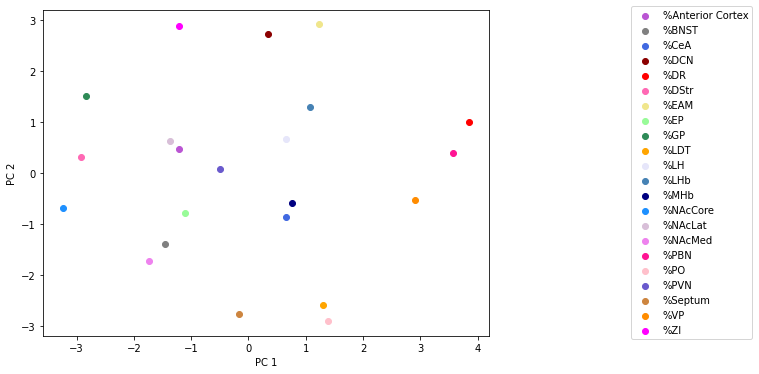

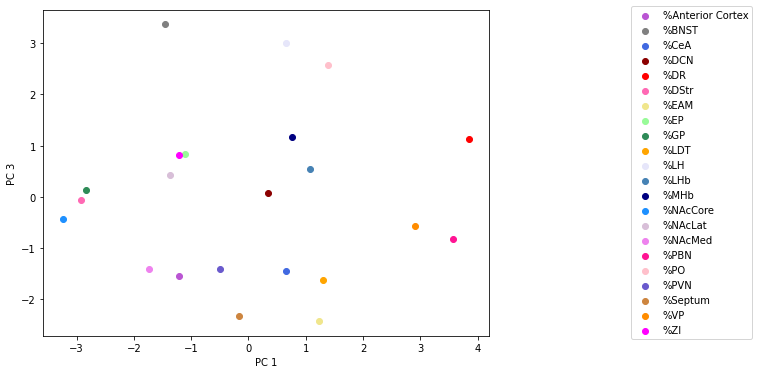

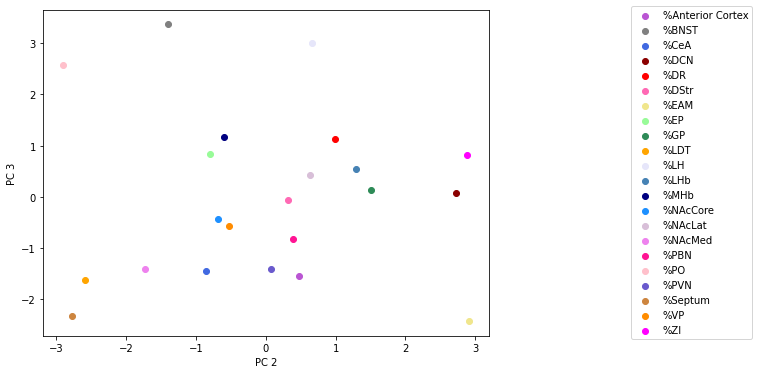

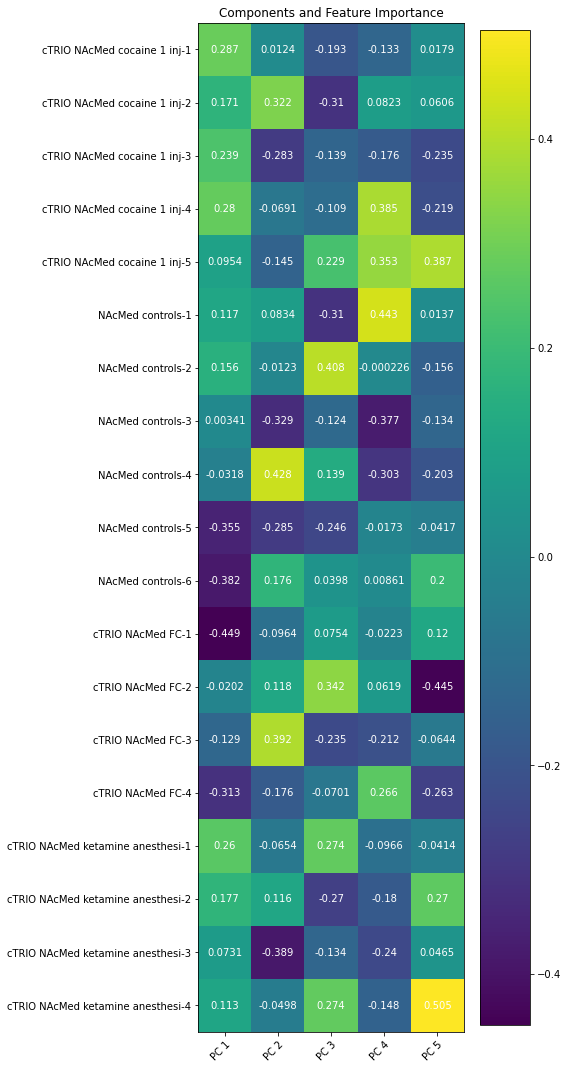

In [77]:
pc1=principalDf['principal component 1'] #make pc1 and 2 into numpy arrays
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

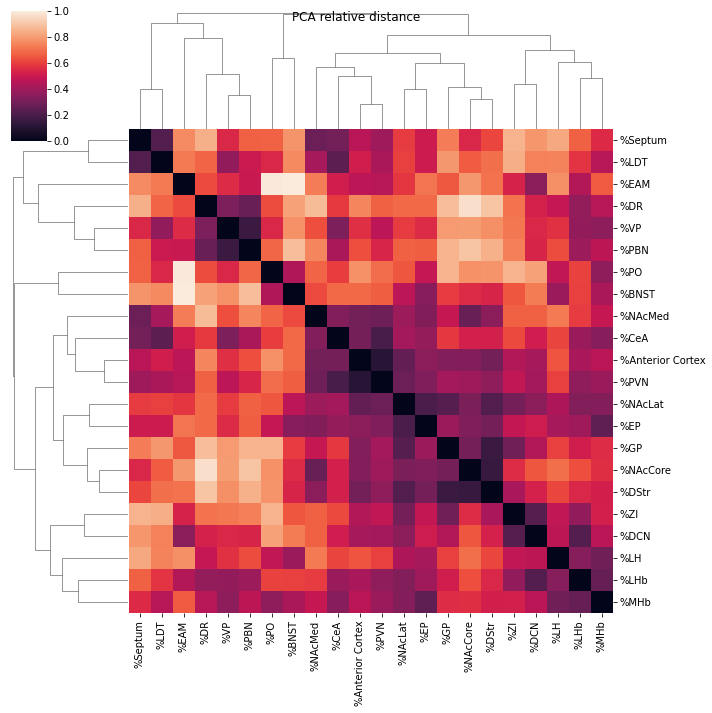

In [78]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

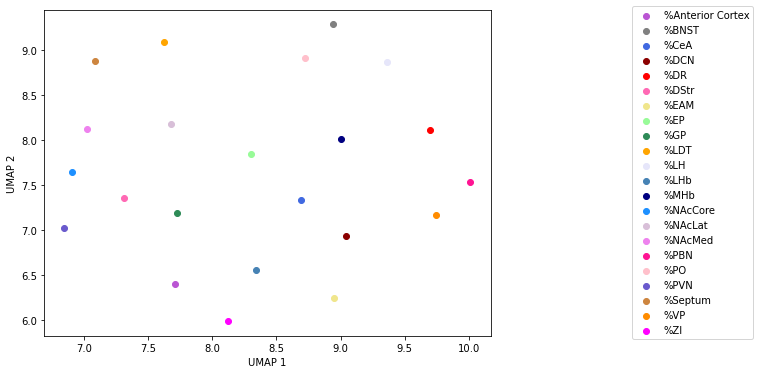

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


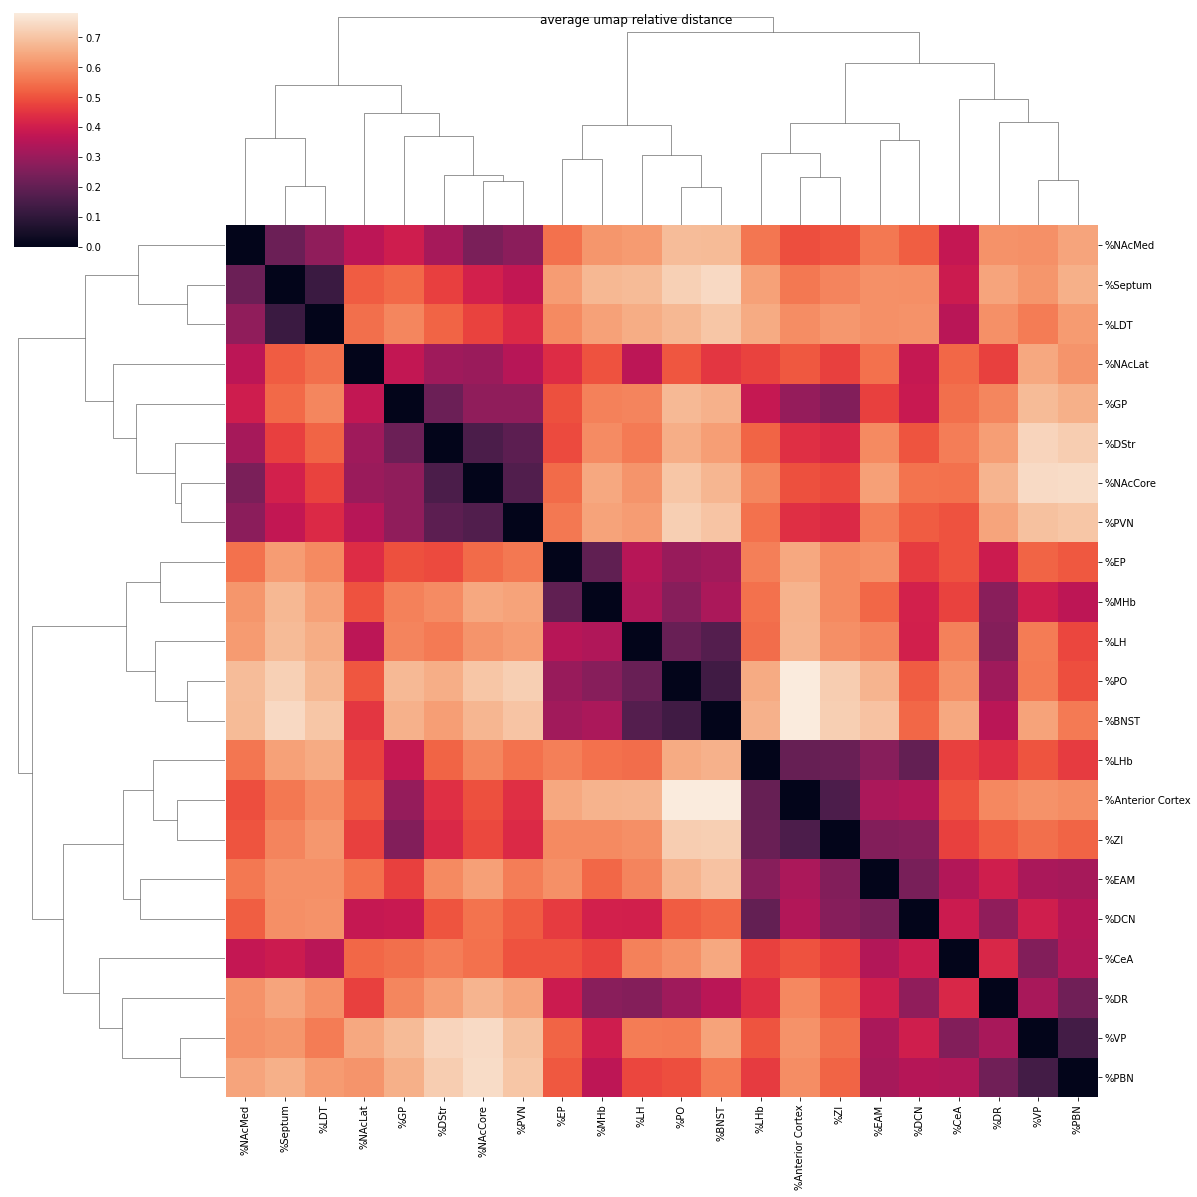

In [79]:
umap_plot(X_scaled,labels) 

# NAcMed 
# No FC condition (below)

In [80]:
NAcMed_data2=NAcMed_data[(NAcMed_data["condition"] == 'NAcMed controls') |
                (NAcMed_data["condition"] == 'cTRIO NAcMed cocaine 1 inj')|  
                (NAcMed_data["condition"] == 'cTRIO NAcMed ketamine anesthesi')]
features, labels, regions, condition_nums= get_feats_and_labels(NAcMed_data2)

NAcMed_data2=NAcMed_data[(NAcMed_data["condition"] == 'NAcMed controls') |
                (NAcMed_data["condition"] == 'cTRIO NAcMed cocaine 1 inj')]
features_nacmed, labels_nacmed, condition_nums_nacmed, regions_nacmed= get_feats_and_labels(NAcMed_data2)

In [81]:
#scale X 
X=features.to_numpy()
#get rid of NAs before scaling
print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

                          0                                              \
                          0          1          2          3          4   
%Anterior Cortex   1.650943   1.986755   2.566872   0.290698   0.650759   
%NAcMed            3.537736   3.973510   6.803456   3.488372   2.603037   
%NAcLat            0.471698   1.490066   1.594949   2.325581   0.433839   
%NAcCore           1.650943   4.470199   4.286426   3.488372   3.470716   
%DStr              0.000000   0.000000   0.024921   0.581395   0.000000   
%VP                5.660377  15.894040  15.949493  24.418605  23.210412   
%PO                3.301887   2.483444   4.211663   4.069767   4.772234   
%Septum            0.471698   0.993377   1.495265   0.290698   0.433839   
%BNST              1.179245   1.490066   2.965609   2.034884   3.687636   
%EAM               4.009434   7.947020   2.442266   4.651163   3.036876   
%EP                0.000000   0.000000   0.049842   0.000000   0.216920   
%GP                2.3584

principal component 1  principal component 2  principal component 3  \
0               -1.428664              -0.934408              -0.701778   
1               -1.847393               0.095963              -0.657614   
2               -1.928300              -0.240523              -0.119539   
3               -2.325300              -0.041438               0.803851   
4               -1.551943              -0.750993               1.919892   
5                1.479321              -0.375893              -1.254340   
6                1.866843               3.450935              -0.385943   
7               -2.480008               1.294093              -2.127671   
8                0.608088               3.039486               1.593661   
9                1.365487              -3.449990              -0.136088   
10               0.168303               0.671299               1.653441   
11              -0.800775              -1.015675               2.456972   
12              -1.656862               0.528197              -0.077451   
13               0.391747               0.575749              -0.210478   
14               1.127413               0.616885               0.574744   
15               0.632886              -0.913788              -1.593741   
16               1.526084               1.358420               0.910928   
17               1.070593              -0.759027               2.708099   
18               3.093774              -0.056599              -1.315208   
19              -1.265071               0.730728              -2.287202   
20               1.214444              -0.895857              -1.885461   
21               0.739332              -2.927566               0.130924   

    principal component 4  principal component 5  
0                2.433565               1.098463  
1                0.880375              -0.603753  
2               -0.619231               1.636482  
3               -1.564180              -0.298113  
4               -0.754503              -0.762203  
5               -2.430398              -0.468202  
6                0.173837              -0.492714  
7                0.812748              -0.403086  
8                0.683736               0.337524  
9                0.082158              -0.119562  
10               0.967501              -1.841064  
11              -0.288969              -0.570380  
12              -2.233471               1.416136  
13               2.689804               1.241807  
14              -1.051320              -2.153375  
15               0.449036              -1.789239  
16              -0.859078               2.008951  
17               0.825381               1.195589  
18               0.135936              -0.218381  
19              -0.147187              -1.093541  
20              -0.905160               2.388582  
21               0.719420              -0.509920

### PCA Plots

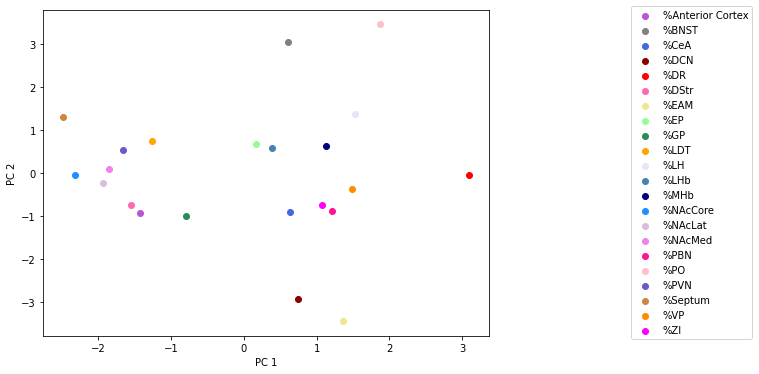

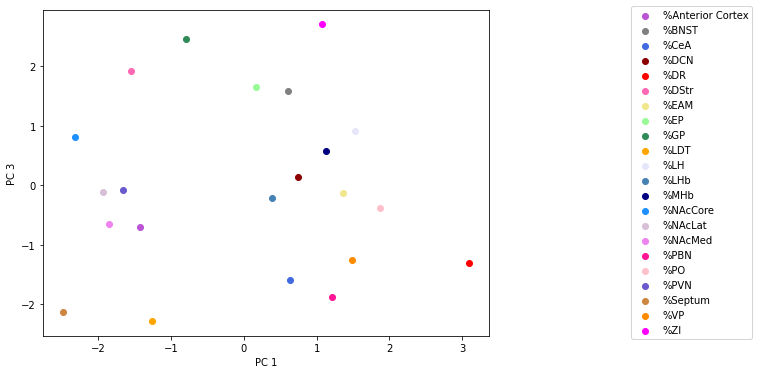

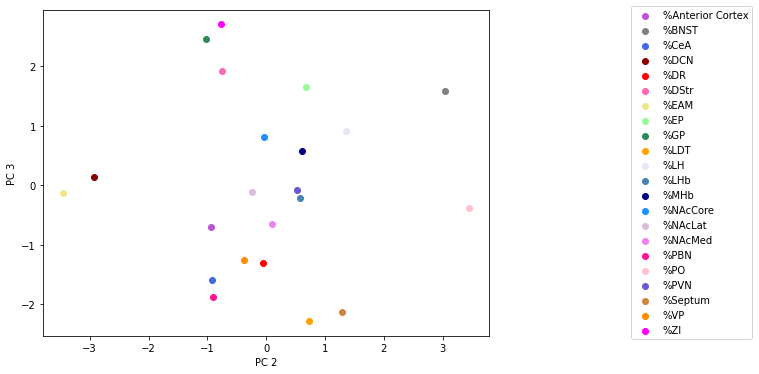

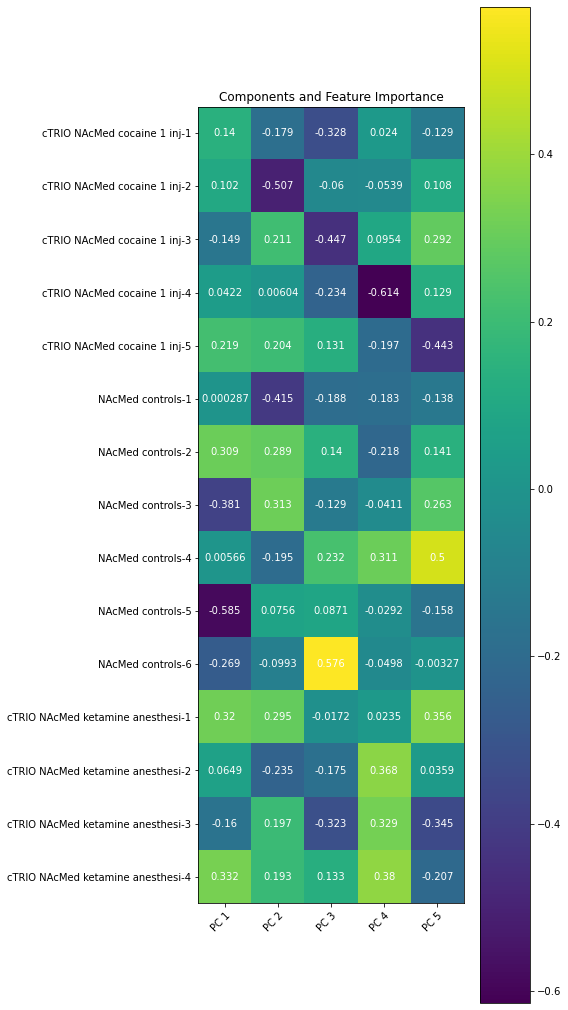

In [82]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

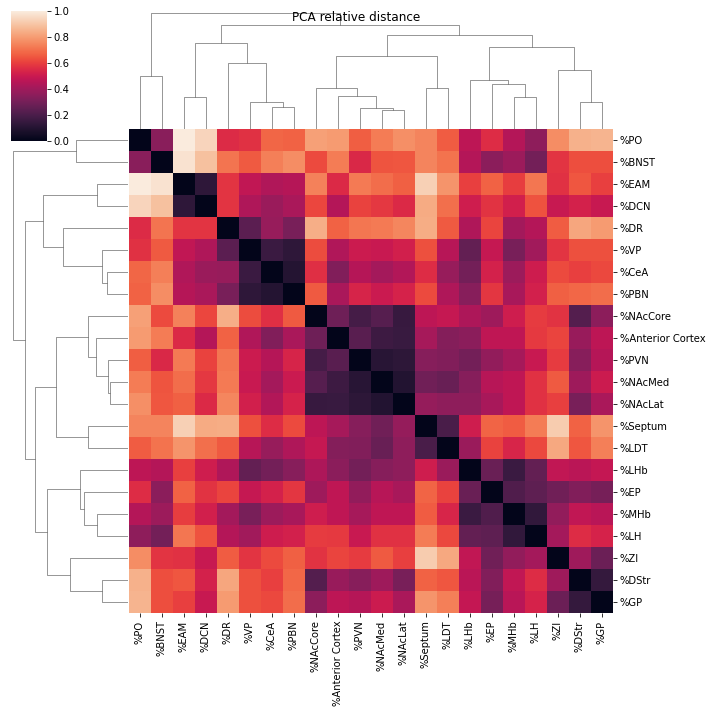

In [83]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

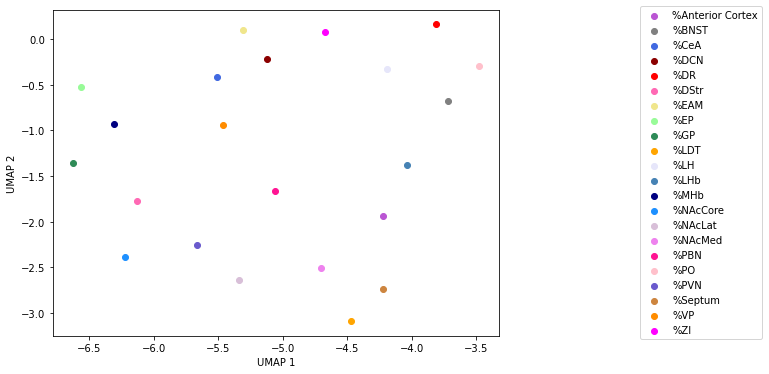

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


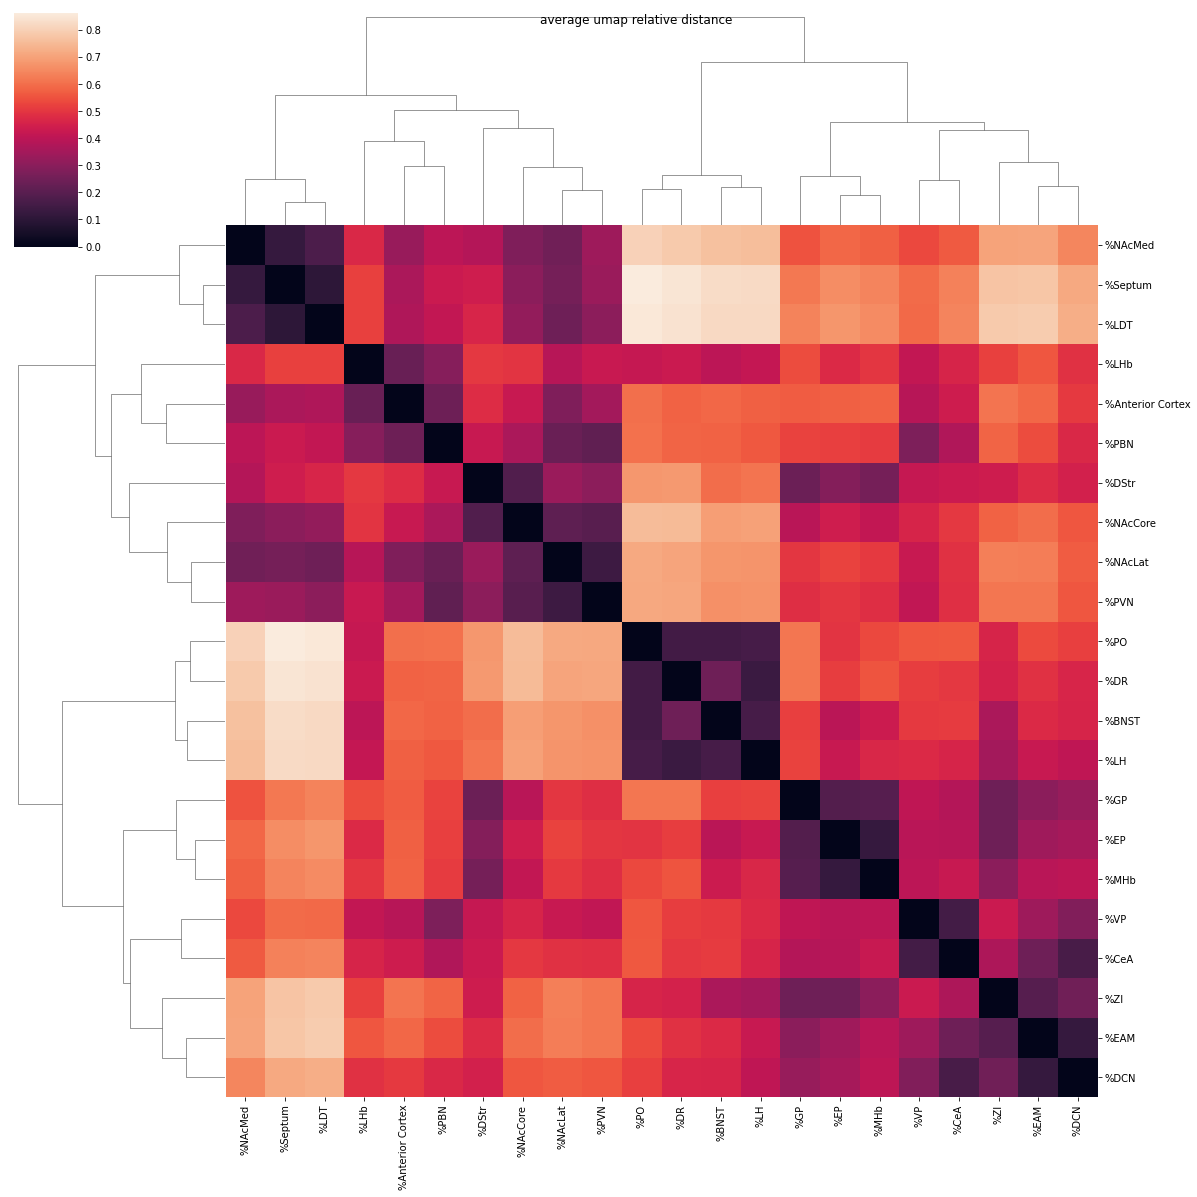

In [84]:
umap_plot(X_scaled,labels) 

# NAcLat (below)

In [85]:
features, labels, regions, condition_nums= get_feats_and_labels(NAcLat_data) 

In [86]:
#scale X 
X=features.to_numpy()
#get rid of NAs before scaling

print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

                          0                                              \
                          0          1          2          3          4   
%Anterior Cortex   1.674351   2.338458   2.883721   3.182546   1.550039   
%NAcMed            4.076680   6.096119   4.930233   4.683747   4.885993   
%NAcLat            2.584324   4.467262   1.953488   2.882306   3.571830   
%NAcCore           4.222276   9.805397   3.069767   2.161729   7.649107   
%DStr              9.318127  15.433824   3.534884   5.524420  14.051443   
%VP               11.684057  10.208580  10.232558   8.226581  10.142649   
%PO                3.530696   3.386733   5.209302   3.002402   1.988094   
%Septum            0.218394   0.080636   0.093023   0.120096   0.404358   
%BNST              2.802718   1.757875   3.255814   2.401922   1.752218   
%EAM               7.024994   4.096334   3.069767   5.404323   1.482646   
%EP                0.218394   0.403182   0.093023   0.540432   0.741323   
%GP                8.5173

In [87]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[3.28215717 3.06379035 2.49571351 2.40434758 2.25507847]


principal component 1  principal component 2  principal component 3  \
0                2.640349               2.481812              -0.755423   
1                1.668281              -0.724499               0.556803   
2                1.626683               0.782482              -0.571945   
3                3.086536              -0.553164               2.467240   
4                1.832046               2.692986               2.361342   
5               -0.327967              -0.735947              -2.513951   
6                0.586573              -2.323117              -0.666818   
7                2.207535              -2.665861              -0.550716   
8                0.688930              -1.669806               0.029533   
9               -1.151820              -0.129146              -1.456170   
10              -0.253021              -1.026017               1.354371   
11              -2.367622              -0.297628               3.078010   
12               1.291558              -1.922040               0.011252   
13              -2.721385               0.725762              -1.503386   
14               1.329767               0.059274              -2.286527   
15              -0.357324               2.448089              -0.035496   
16              -2.427297              -1.830261              -1.468148   
17              -2.365146              -0.250707               2.413807   
18              -2.202004              -1.737938               1.220813   
19              -0.682458               1.417362              -0.767680   
20              -0.393168               2.694267              -1.189734   
21              -1.709046               2.564097               0.272823   

    principal component 4  principal component 5  
0                1.555358               0.596239  
1                0.005586              -2.001353  
2               -1.883285               0.331697  
3               -1.485736              -0.069535  
4               -1.099160               1.815167  
5               -1.330002              -0.065517  
6               -1.016812               0.818691  
7               -0.434661              -0.353230  
8                3.187099               0.347558  
9               -0.711019               3.442176  
10               3.010663               0.930163  
11              -0.911678              -0.753681  
12               0.528081              -1.652477  
13              -1.161053              -0.708501  
14              -0.697882              -0.441722  
15               0.842084               2.788970  
16              -0.402699               1.058108  
17              -2.359472              -0.584233  
18               2.344084               0.272659  
19              -0.430676              -2.175074  
20               1.627449              -2.648285  
21               0.823731              -0.947821

### PCA plots

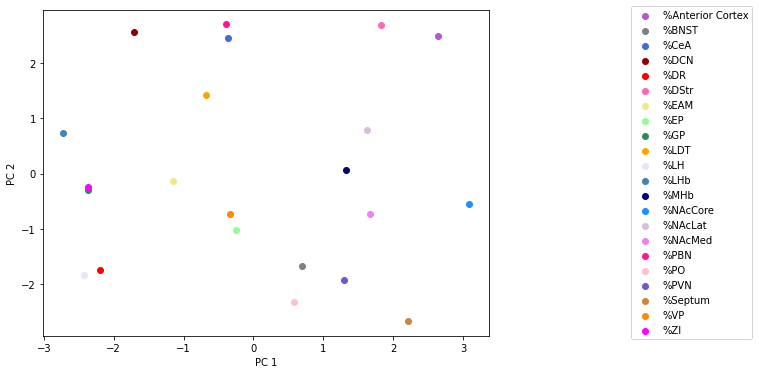

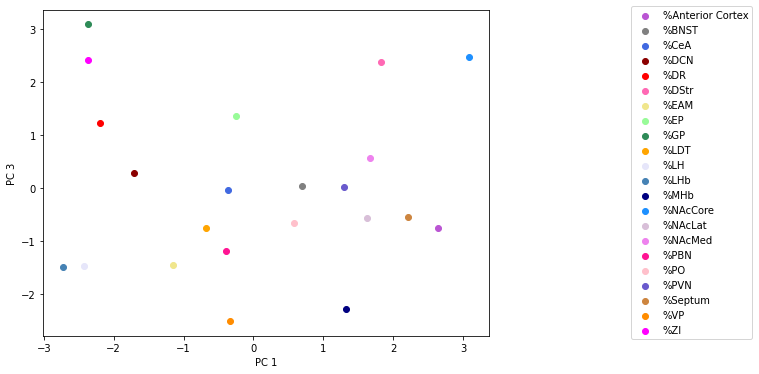

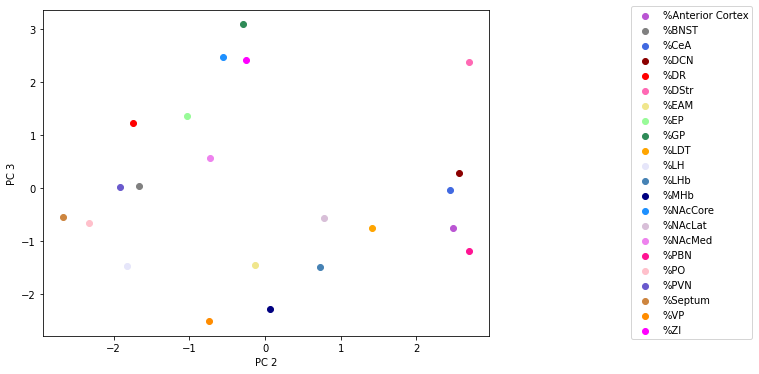

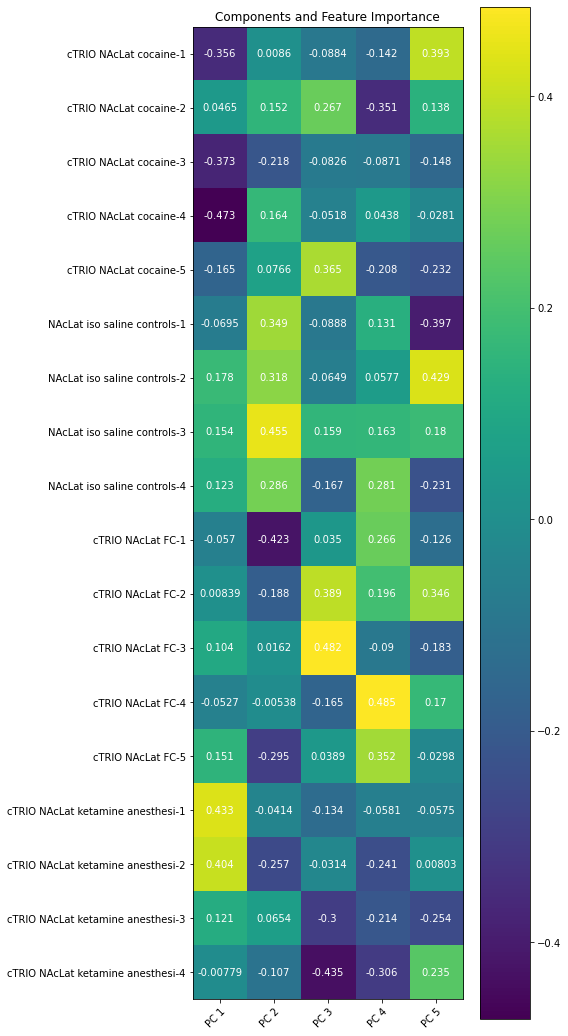

In [88]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

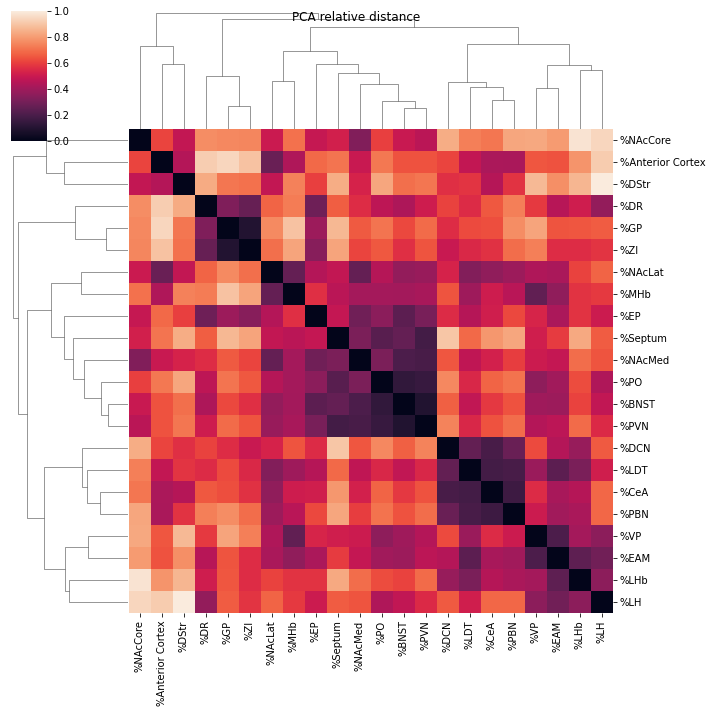

In [89]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

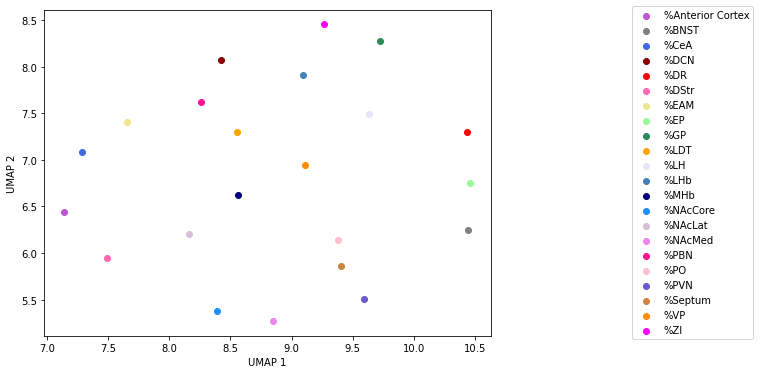

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


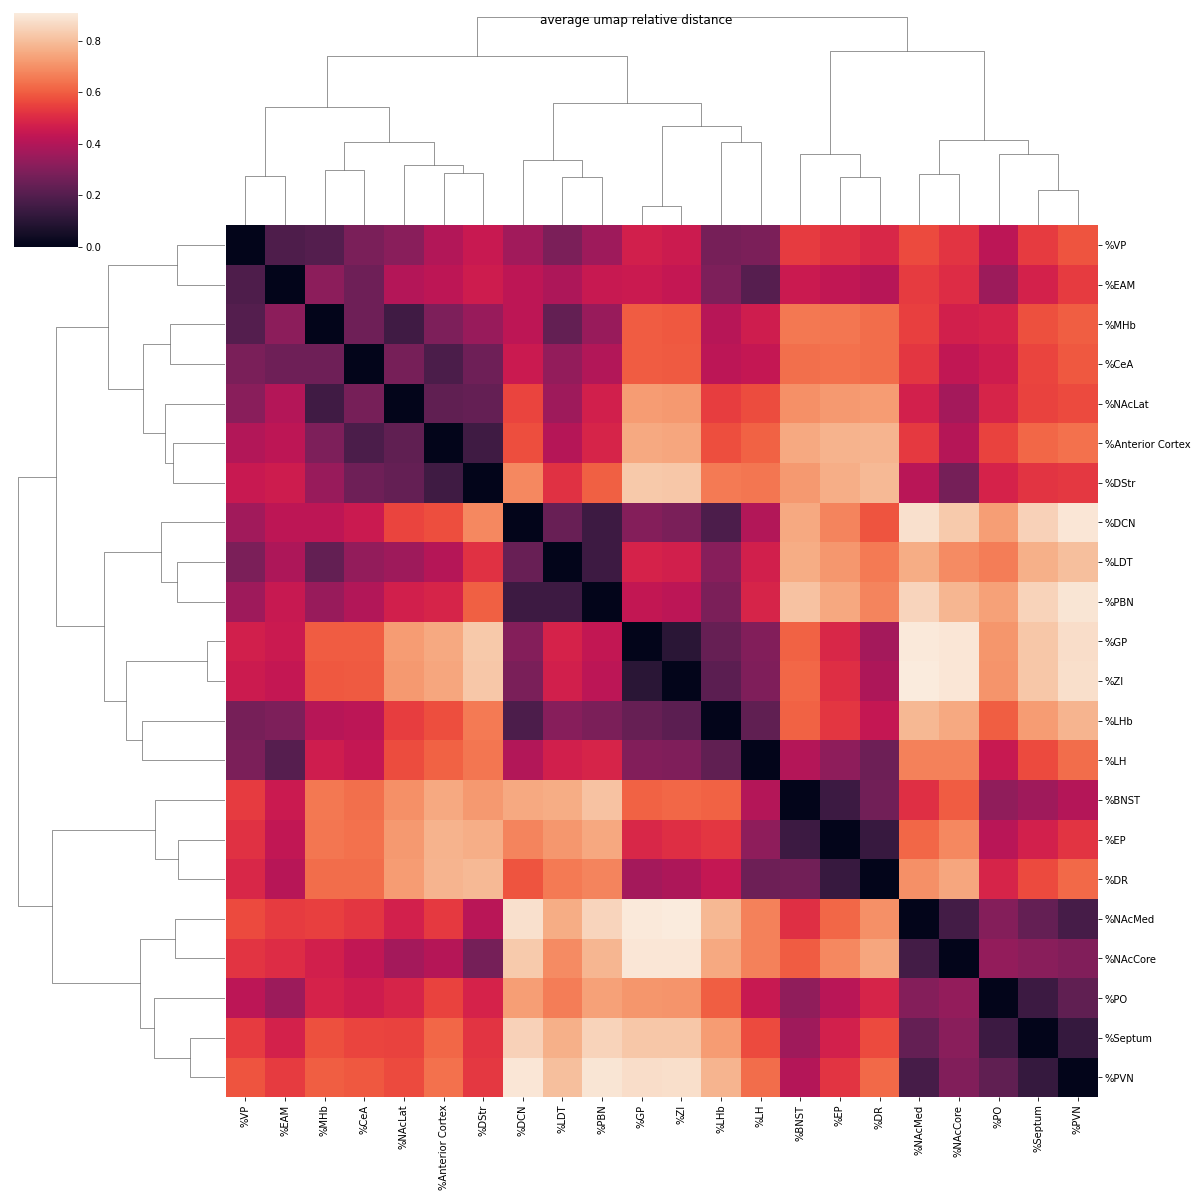

In [90]:
umap_plot(X_scaled,labels) 

# NAcLat 
# No FC condition (below)

In [91]:
NAcLat_data2=NAcLat_data[(NAcLat_data["condition"] == 'cTRIO NAcLat ketamine anesthesi') | 
                (NAcLat_data["condition"] == 'cTRIO NAcLat cocaine')| 
                (NAcLat_data["condition"] == 'NAcLat iso saline controls')]
features, labels, regions, condition_nums= get_feats_and_labels(NAcLat_data2)

In [92]:
#scale X 
X=features.to_numpy()
#get rid of NAs before scaling

print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

                          0                                              \
                          0          1          2          3          4   
%Anterior Cortex   1.674351   2.338458   2.883721   3.182546   1.550039   
%NAcMed            4.076680   6.096119   4.930233   4.683747   4.885993   
%NAcLat            2.584324   4.467262   1.953488   2.882306   3.571830   
%NAcCore           4.222276   9.805397   3.069767   2.161729   7.649107   
%DStr              9.318127  15.433824   3.534884   5.524420  14.051443   
%VP               11.684057  10.208580  10.232558   8.226581  10.142649   
%PO                3.530696   3.386733   5.209302   3.002402   1.988094   
%Septum            0.218394   0.080636   0.093023   0.120096   0.404358   
%BNST              2.802718   1.757875   3.255814   2.401922   1.752218   
%EAM               7.024994   4.096334   3.069767   5.404323   1.482646   
%EP                0.218394   0.403182   0.093023   0.540432   0.741323   
%GP                8.5173

principal component 1  principal component 2  principal component 3  \
0               -2.259532               1.973573               1.833363   
1               -2.226483              -0.129248              -2.173726   
2               -1.273949              -1.041021               0.996460   
3               -2.329534              -0.116775              -0.541637   
4               -1.170983               1.855128               1.856921   
5               -0.014697              -2.349440              -0.111815   
6               -0.723729              -2.303563              -0.339022   
7               -2.259422              -1.763183              -0.512927   
8               -1.106137               0.870873               1.796447   
9                1.264136              -1.887444               2.679965   
10               0.469626               1.755629              -0.925125   
11               3.123358               0.704813              -1.001486   
12              -2.204111              -0.325357              -1.212486   
13               2.568474              -0.547864              -0.071082   
14              -1.421049              -1.248197              -0.415994   
15               0.736228               1.272344               2.695370   
16               2.201222              -2.270667               0.672980   
17               2.547607              -0.799664              -1.443446   
18               2.634467               0.638631              -0.153216   
19               0.380168               0.675333              -1.581498   
20              -0.417012               2.634249              -1.796269   
21               1.481350               2.401851              -0.251779   

    principal component 4  principal component 5  
0                0.851158              -0.027855  
1                0.112863              -0.187050  
2               -0.605836               1.935179  
3               -2.587188              -0.974576  
4               -2.526688              -0.228175  
5                0.529095               0.360275  
6                0.335082              -2.275414  
7               -0.237019              -0.144232  
8                2.882368              -0.259970  
9               -0.293947              -0.093199  
10              -2.002035               0.636337  
11              -0.656496              -0.547098  
12               1.082670              -1.632676  
13               1.211046               0.060836  
14              -0.010738               2.042179  
15              -0.360619              -0.343842  
16               0.846398               0.754668  
17              -1.321665              -0.914202  
18               0.188075              -0.494361  
19              -0.046802               2.796160  
20               2.440024               0.150332  
21               0.170254              -0.613314

### PCA Plots

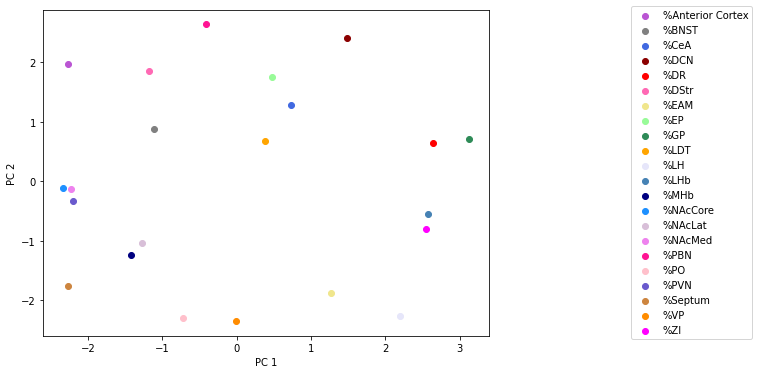

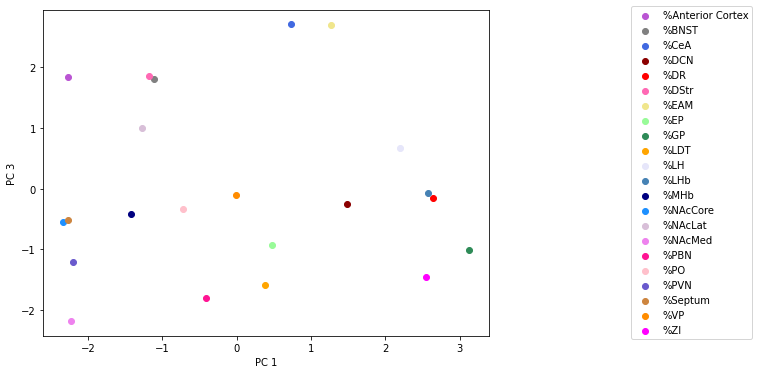

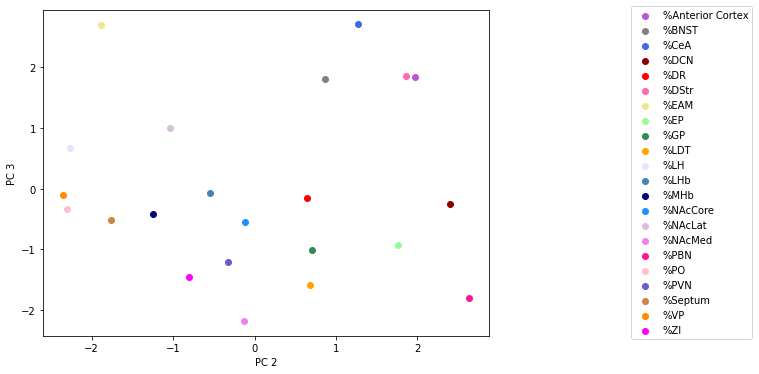

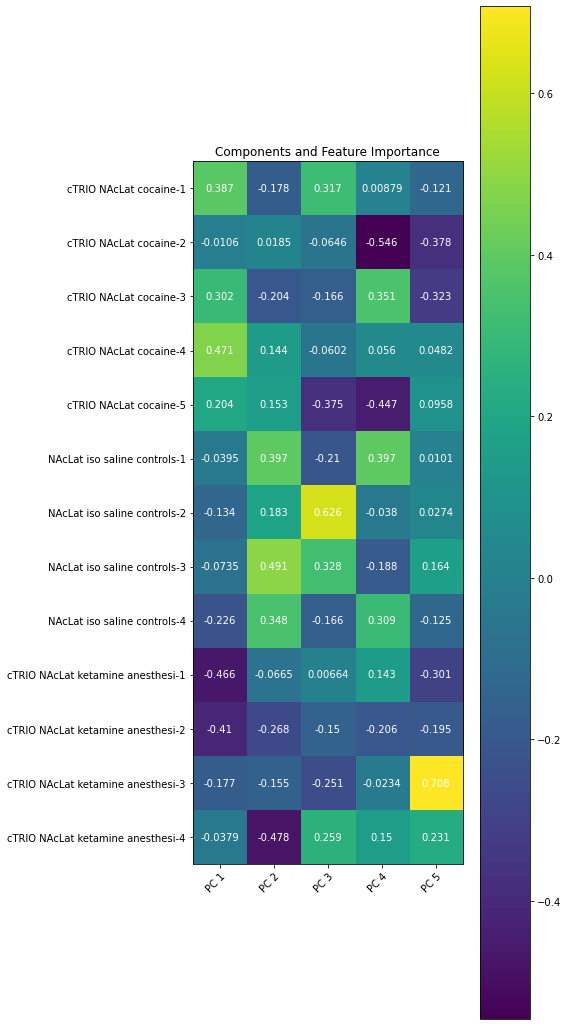

In [93]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

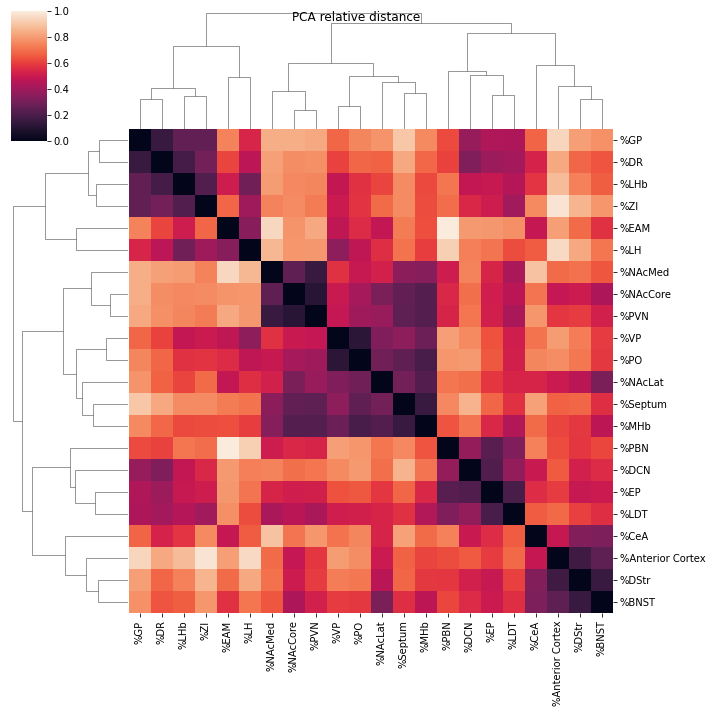

In [94]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

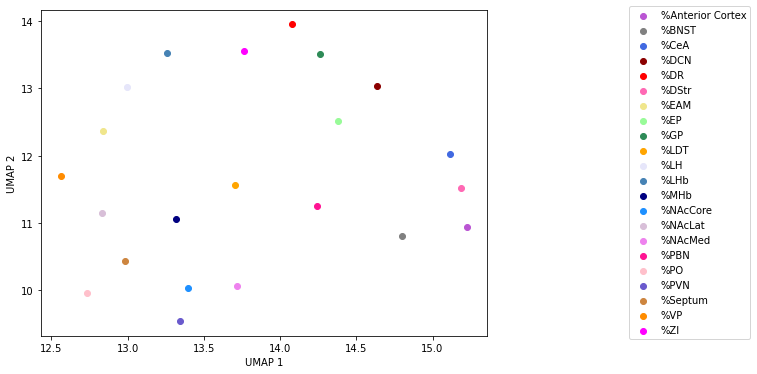

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


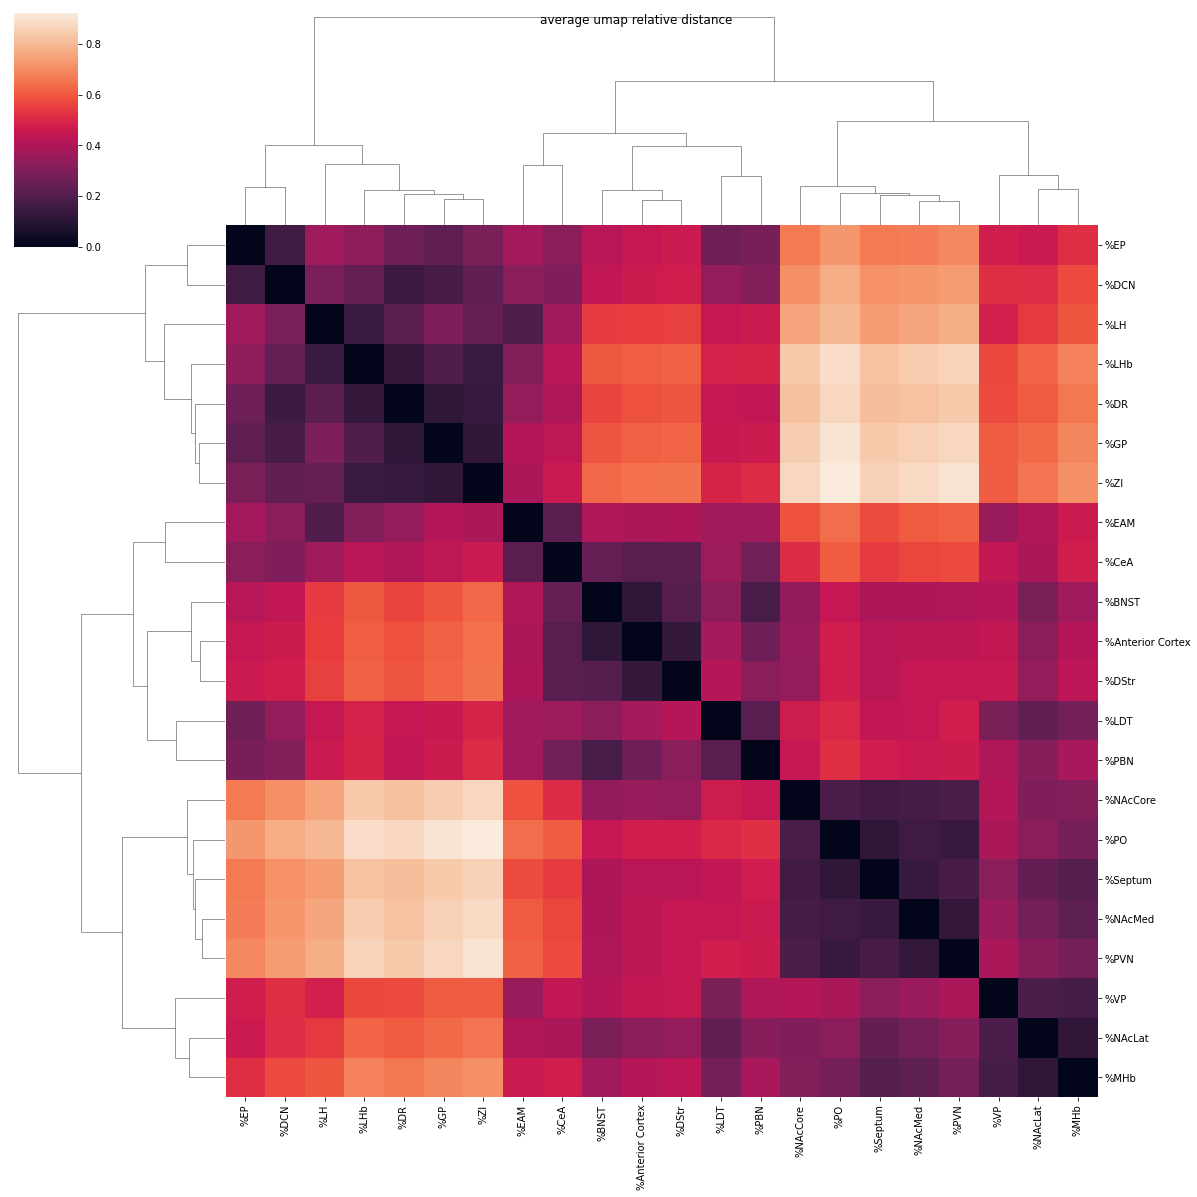

In [95]:
umap_plot(X_scaled,labels) 

# DLS (below)

In [96]:
def get_feats_and_labels(dataframe):
    regions=dataframe['condition'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    condition_nums=dataframe['condition_num'].values
    labels=features.index
    return features, labels, regions, condition_nums

In [97]:
DLS_data.reset_index(inplace=True)
features, labels, regions, condition_nums= get_feats_and_labels(DLS_data)

In [98]:
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling

print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

                        0          1          2          3          4   \
animal id                                                                
DCN               1.050876   4.992436   0.601738   0.852073   0.121082   
PBN                4.70392   1.361573   7.555159   6.425636   0.242163   
LDT                1.46789   0.302572   0.713171   0.447756   0.026907   
DR                6.955796   4.387292   7.688879   3.939586   1.331898   
ZI                6.855713  22.239032   8.056608    5.45327   4.560743   
LH                 2.35196   3.177005   4.847337   3.909513   6.094444   
CeA               4.753962   6.807867   6.719412   3.939586   7.951029   
MHb                    0.0        0.0    0.06686   0.010024        0.0   
LHb               0.100083        0.0   0.401159   0.300732   0.282524   
PVH                0.30025   0.907716   0.735458   1.443513   6.054083   
GPe              13.411176   1.815431   10.83129   4.260367  14.085833   
EP                1.401168   1.815431 

In [99]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[3.68975504 2.47818972 2.25614071 1.21572744 0.96314405]


principal component 1  principal component 2  principal component 3  \
0                1.284692               1.544100               0.781988   
1               -2.213304               0.678404               2.039210   
2               -0.883298               3.180351              -0.853629   
3               -2.834439               1.453825              -1.104727   
4                1.959305               1.939982               0.642773   
5                0.738521              -0.860693              -1.940987   
6                3.517221              -0.358683              -0.240245   
7               -0.817227              -0.457456              -0.006019   
8               -0.514705              -1.068936              -0.628303   
9                0.894593              -2.409320              -0.203565   
10               2.199445               1.967985              -2.035297   
11               2.243890              -1.089560               1.506370   
12              -0.017633              -0.446665              -1.667110   
13               1.313251              -1.219618              -0.452600   
14               1.235797              -1.659087              -0.057260   
15              -1.171828              -0.297411              -2.541523   
16              -0.797035              -2.125911              -0.670373   
17               2.205801               2.786132               1.889344   
18              -3.332041               0.251547               0.893335   
19              -2.832589               0.464958               0.760268   
20              -2.122574              -0.665497               0.050450   
21              -0.055845              -1.608447               3.837902   

    principal component 4  principal component 5  
0               -0.202254              -0.634998  
1                1.476263              -0.046409  
2               -0.113648               1.647889  
3               -1.087290              -1.064907  
4                0.002905              -0.873724  
5               -1.002862              -1.195389  
6               -0.279570              -0.525690  
7                3.080648               0.244047  
8                2.297061              -1.367640  
9               -0.838883              -0.453520  
10               0.539436               0.821288  
11              -0.533773               1.765099  
12              -0.473135               1.438011  
13               0.073677              -1.212266  
14               0.905929               1.362777  
15               0.479454               0.033933  
16              -1.247686               0.030619  
17              -0.491206              -0.605719  
18              -0.526575               0.341475  
19              -0.733757              -0.823669  
20              -0.989079               1.002187  
21              -0.335654               0.116606

### PCA plots

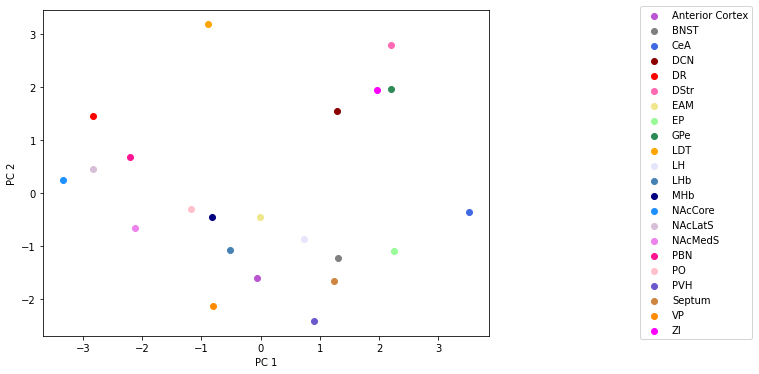

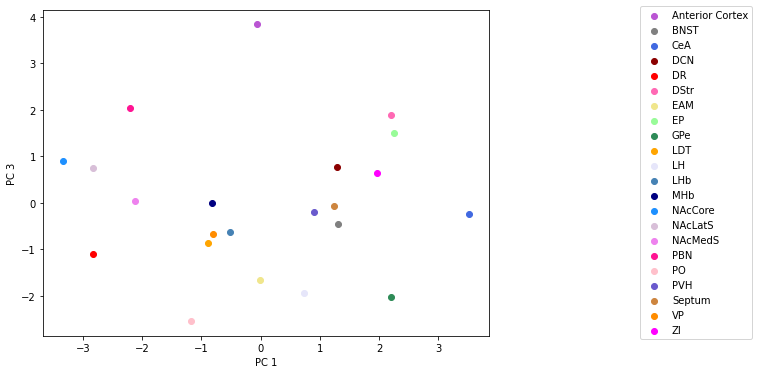

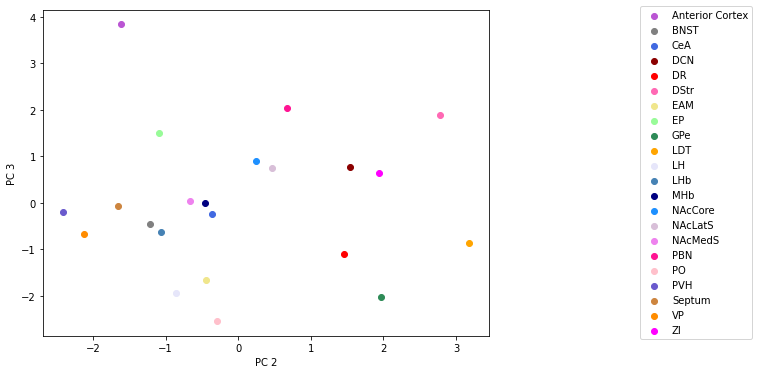

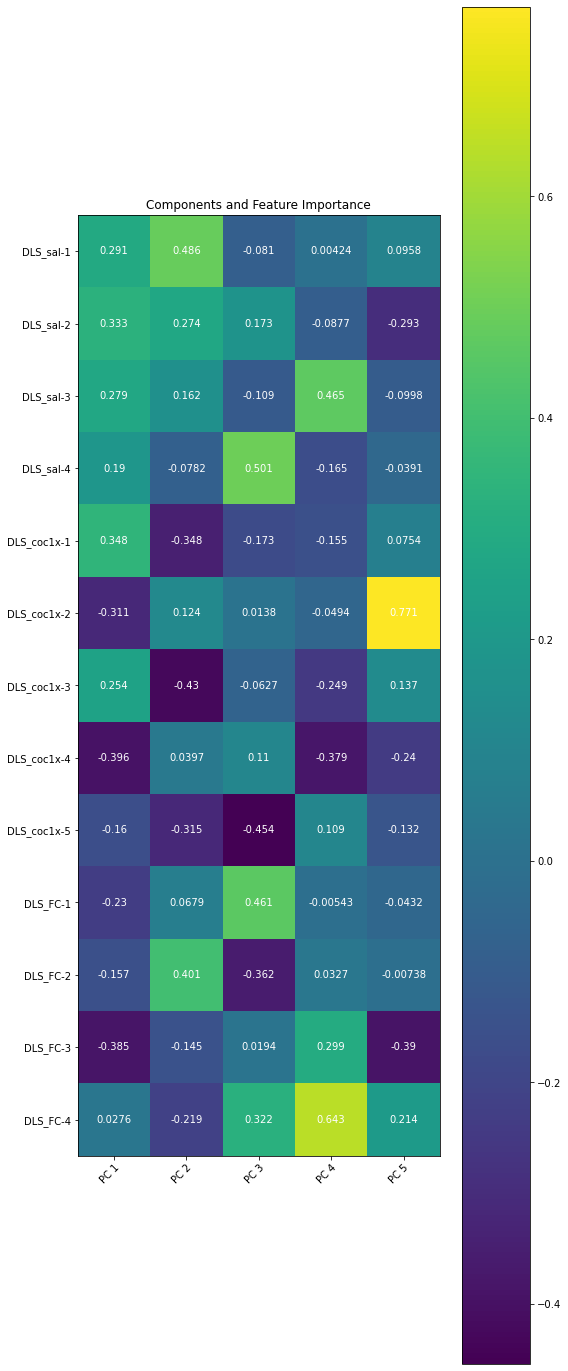

In [100]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

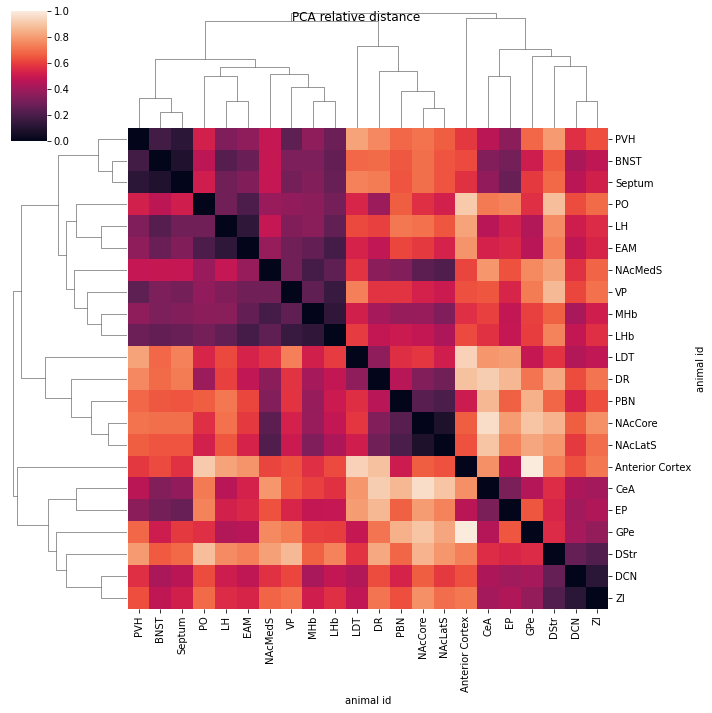

In [101]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

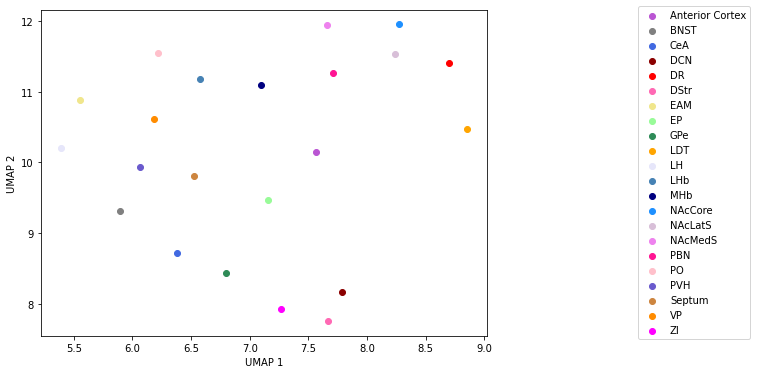

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


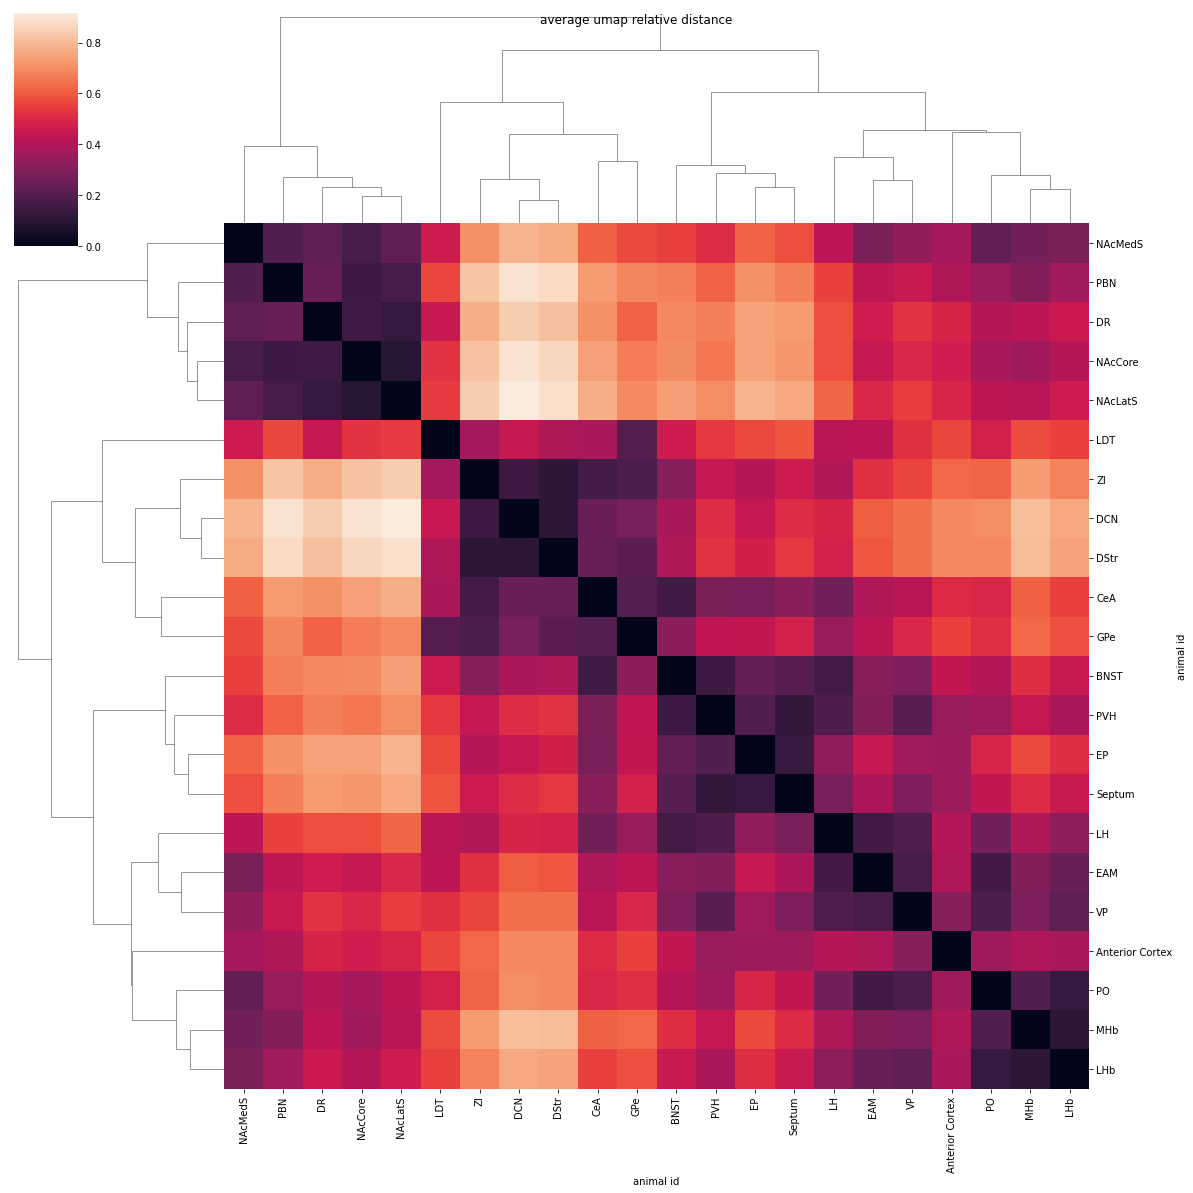

In [102]:
umap_plot(X_scaled,labels) 

# DLS 
# No FC condition (below)

In [103]:
DLS_data2=DLS_data[(DLS_data["condition"] == 'DLS_sal') |
                (DLS_data["condition"] == 'DLS_coc1x')]
features, labels, regions, condition_nums= get_feats_and_labels(DLS_data2)
features_DLS, labels_DLS, condition_nums_DLS,regions_DLS= get_feats_and_labels(DLS_data2)

In [104]:
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling

print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

                         0          1          2          3          4  \
animal id                                                                
DCN               1.050876   4.992436   0.601738   0.852073   0.121082   
PBN                4.70392   1.361573   7.555159   6.425636   0.242163   
LDT                1.46789   0.302572   0.713171   0.447756   0.026907   
DR                6.955796   4.387292   7.688879   3.939586   1.331898   
ZI                6.855713  22.239032   8.056608    5.45327   4.560743   
LH                 2.35196   3.177005   4.847337   3.909513   6.094444   
CeA               4.753962   6.807867   6.719412   3.939586   7.951029   
MHb                    0.0        0.0    0.06686   0.010024        0.0   
LHb               0.100083        0.0   0.401159   0.300732   0.282524   
PVH                0.30025   0.907716   0.735458   1.443513   6.054083   
GPe              13.411176   1.815431   10.83129   4.260367  14.085833   
EP                1.401168   1.815431 

principal component 1  principal component 2  principal component 3  \
0                1.068128               1.937739               0.350805   
1               -1.167284               1.471346               0.360387   
2               -0.932165               2.245987              -1.115971   
3               -2.223385               0.798227              -0.255575   
4                1.729865               1.918665              -0.076202   
5                0.147819              -1.520136              -0.517993   
6                2.848117              -0.500231              -0.388714   
7               -1.033362               0.475383              -1.934163   
8                0.489107              -0.988003              -0.762277   
9                1.093298              -2.275811               0.940426   
10               1.886148               0.752027              -2.020319   
11               1.750984              -0.810961               1.829715   
12              -1.258078              -0.720622              -1.080477   
13               1.735276              -1.475366              -0.830683   
14               0.459538              -1.654735              -0.621476   
15              -0.803459              -1.565909              -0.972793   
16              -0.944126              -1.913639               1.051697   
17               2.007703               3.212469               1.058175   
18              -2.497495               0.454737               0.566358   
19              -2.198392               0.755842               0.491931   
20              -2.035372              -0.488419               0.450321   
21              -0.122865              -0.108592               3.476830   

    principal component 4  principal component 5  
0               -1.668734              -0.659567  
1                2.355606              -0.183643  
2                0.097620               1.631078  
3               -0.688562              -0.562897  
4               -1.001917              -1.058241  
5               -0.497823              -1.337736  
6                0.565824              -0.469329  
7                0.795538              -1.215924  
8                0.847635              -1.472124  
9               -0.895304               0.423805  
10               0.790015               1.487120  
11               0.418619               1.454476  
12               0.948876               0.578757  
13               0.042074              -0.307143  
14              -0.598826               0.869188  
15              -0.165404               0.245004  
16              -0.792136               0.348572  
17              -0.481324               0.283316  
18              -0.520152               0.638526  
19              -0.790007              -0.467949  
20              -0.548221               0.455056  
21               1.786606              -0.680346

### PCA Plots

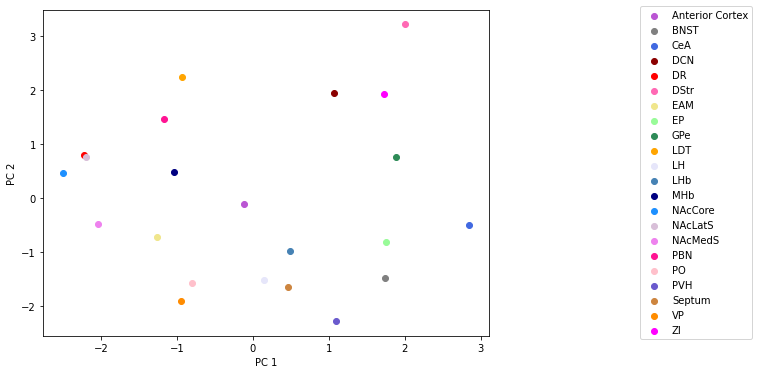

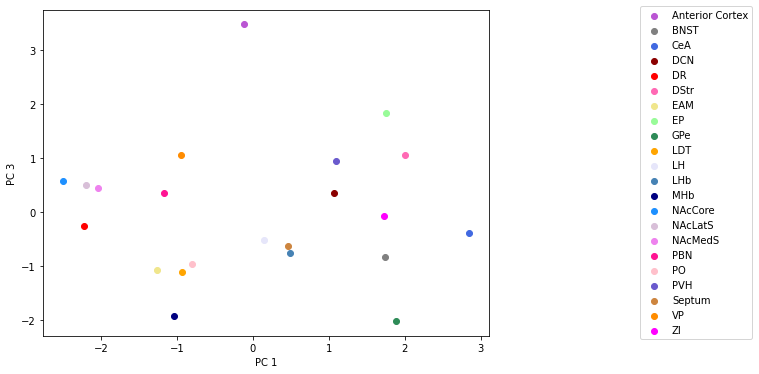

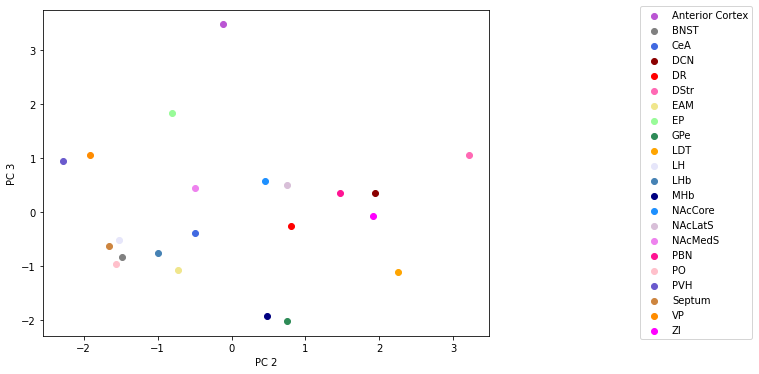

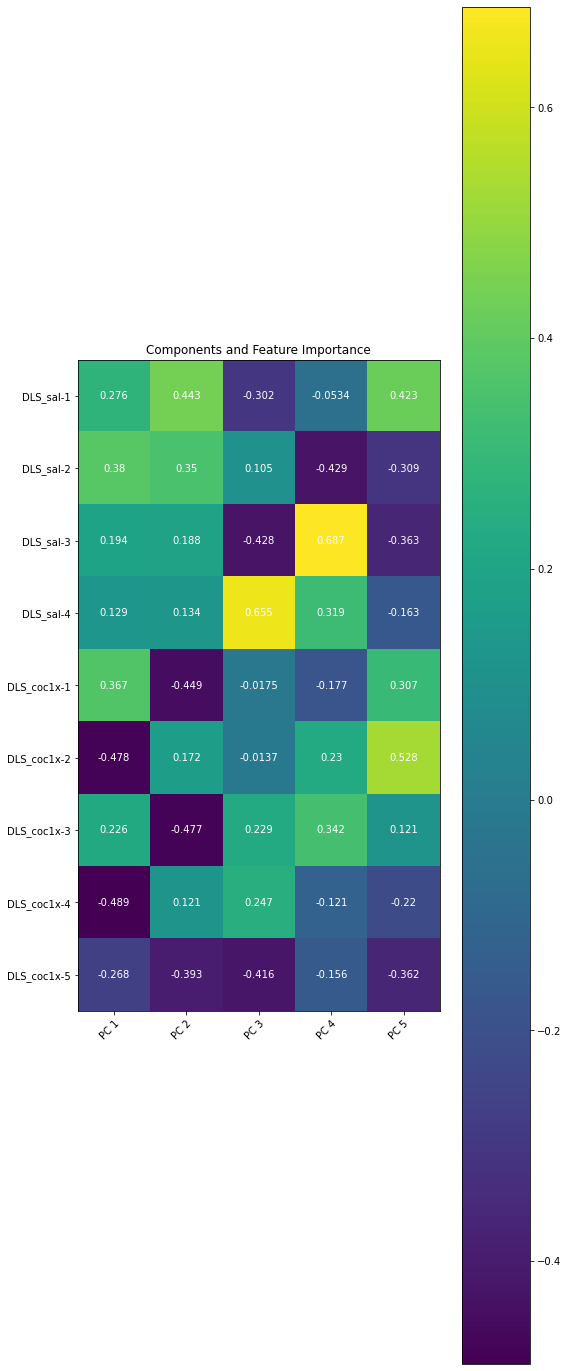

In [105]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

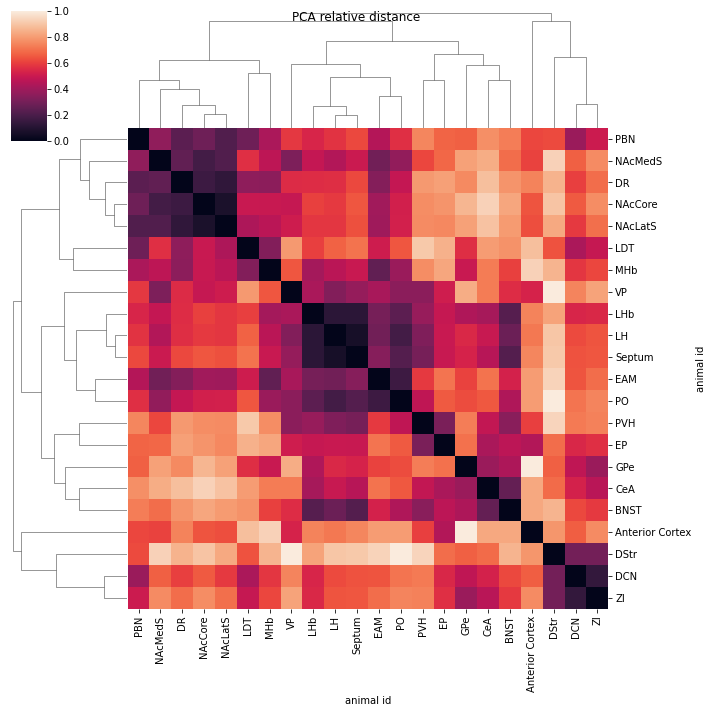

In [106]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

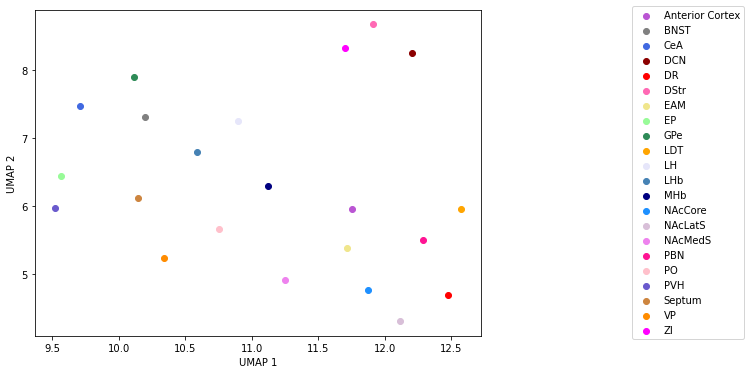

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


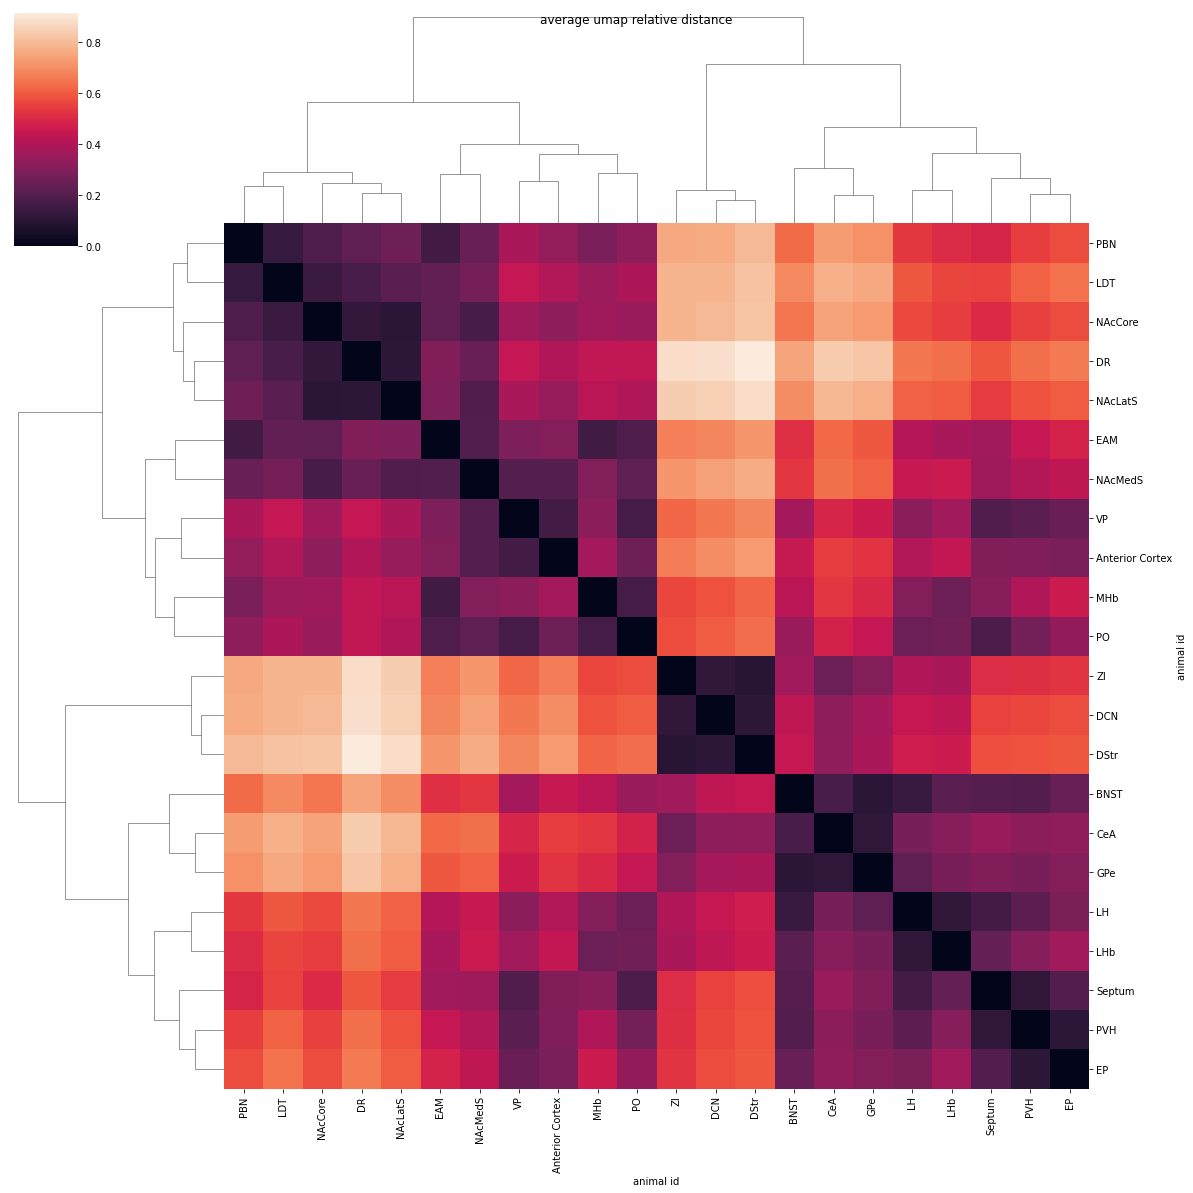

In [107]:
umap_plot(X_scaled,labels) 

# Amygdala (below)

In [108]:
def get_feats_and_labels(dataframe):
    regions=dataframe['condition'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    condition_nums=dataframe['condition_num'].values
    return features, labels, regions, condition_nums

In [109]:
Amyg_data.reset_index(inplace=True)
features, labels, regions, condition_nums = get_feats_and_labels(Amyg_data)

In [110]:
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling

print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

                        0          1          2          3          4   \
DCN               0.571066   0.799201   0.523104   0.352941        0.0   
PBN               6.472081   2.397602  10.113339   1.764706   3.174603   
LDT               1.015228   0.799201   1.046207   0.470588        0.0   
DR               31.598985  22.277722  36.704446  13.764706  33.333333   
ZI                8.185279   6.693307   4.010462   7.764706   4.761905   
LH               16.370558  11.588412  11.508282  15.176471  13.492064   
CeA               3.426396   2.597403   2.092415   0.352941   0.793651   
MHb               0.190355   1.098901        0.0   1.058824        0.0   
LHb               0.571066   1.798202   1.394943   4.235294        0.0   
PVH               2.664975   0.999001   1.656495   0.352941        0.0   
GPe               3.045685   5.894106   1.220575   4.588235   7.142857   
EP                0.380711   0.799201   0.610288   0.705882   0.793651   
EAM               2.284264   1.098901 

In [111]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[4.42957342 2.85127609 2.30065993 1.85224344 1.67079674]


principal component 1  principal component 2  principal component 3  \
0               -0.596832              -2.740871              -0.143672   
1                3.276663              -2.444675              -0.085220   
2                3.410801              -1.321566              -1.802864   
3                3.638325               0.784304              -1.285703   
4               -0.604244              -1.337542               0.896338   
5                2.989349               0.876360              -1.676636   
6                0.369812              -2.015582               2.673385   
7                0.487126              -0.116338               1.085470   
8                1.338682               1.080173              -0.491702   
9                1.770576              -1.545520               3.387539   
10              -2.627014               0.272603               0.463241   
11              -1.928524               0.666994              -1.483847   
12               0.626231               2.919821               1.771307   
13               0.428012               2.227176              -0.091414   
14              -0.051590              -0.306572              -2.633565   
15              -0.130623               2.195106               1.361881   
16               0.090545               3.257237               0.777124   
17              -2.432964              -1.479838               0.189398   
18              -2.378460              -1.036213              -0.953628   
19              -2.471719               0.391233               0.643021   
20              -2.646148               0.485276              -1.179530   
21              -2.558004              -0.811565              -1.420922   

    principal component 4  principal component 5  
0                0.064670               1.231740  
1               -0.745916               0.304636  
2                0.298376               0.936382  
3               -2.178782              -0.916614  
4                3.290501               0.732548  
5                2.508813              -2.509854  
6                0.760076              -0.315881  
7                0.723551               0.420531  
8                0.769454               3.259769  
9               -2.166821              -1.090110  
10              -0.398706              -0.997066  
11              -1.056073               0.035920  
12              -1.700311               0.788300  
13               1.380108              -1.999679  
14              -1.015286              -0.273404  
15              -0.089452               0.527390  
16               0.804035               1.219192  
17              -0.062468              -0.660692  
18              -0.259973              -1.222160  
19               0.577515              -1.081467  
20              -1.343342               0.104842  
21              -0.159971               1.505678

### PCA plots

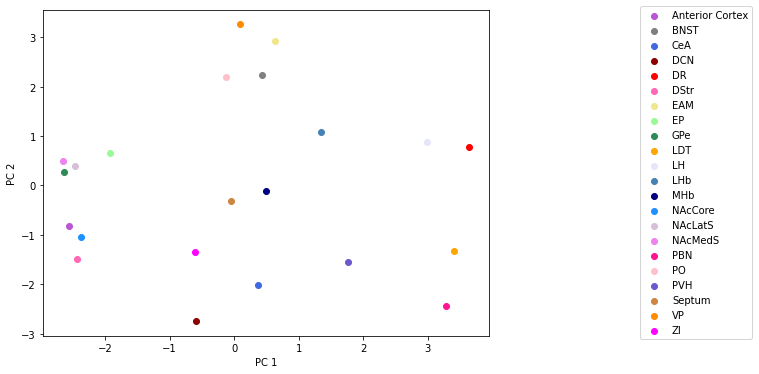

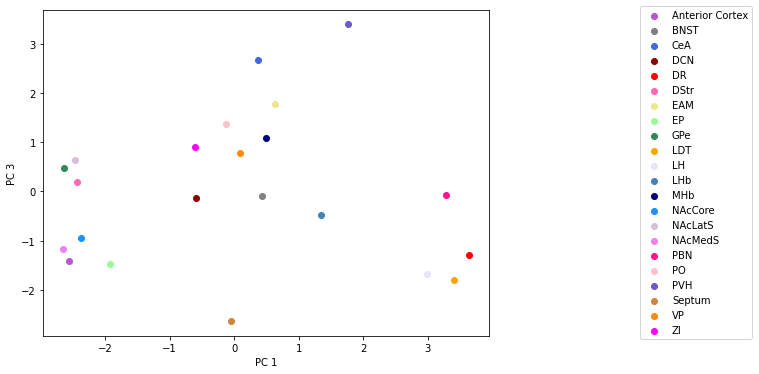

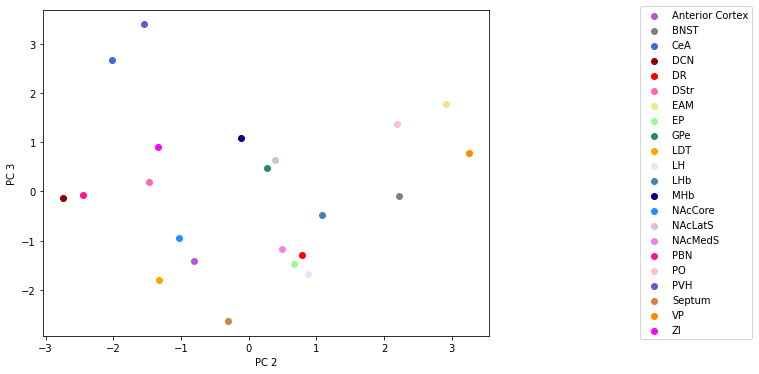

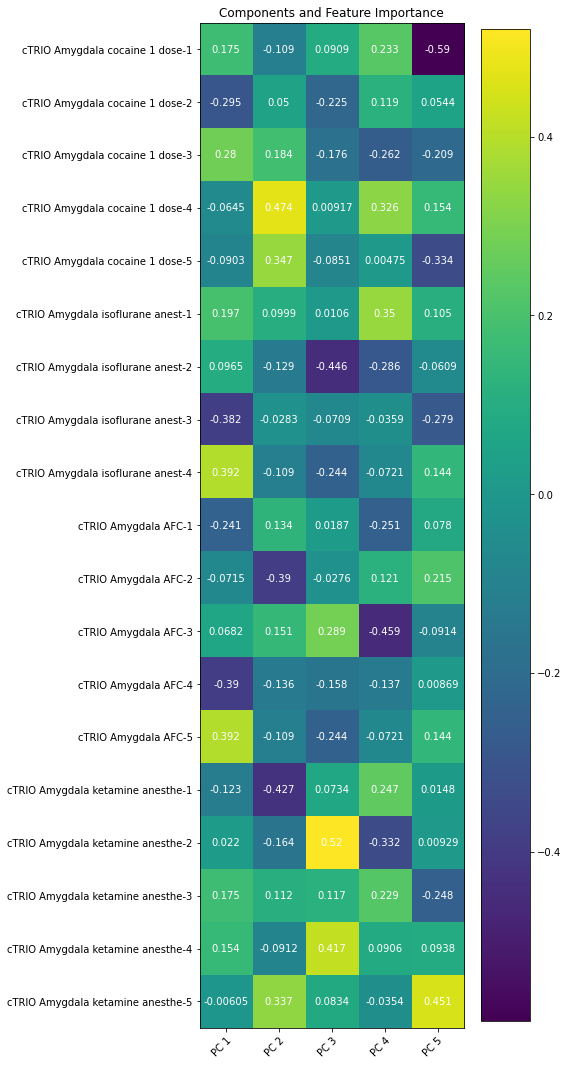

In [112]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

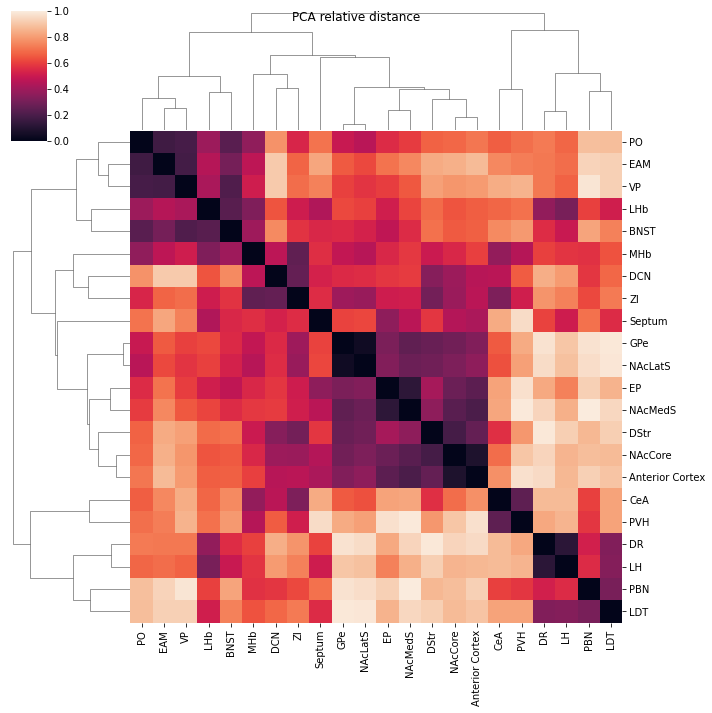

In [113]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

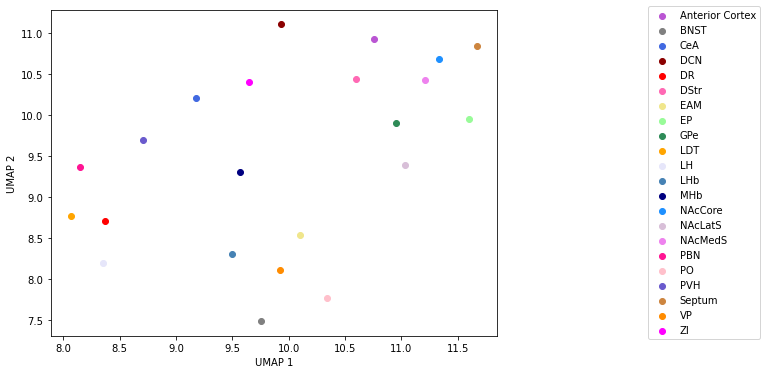

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


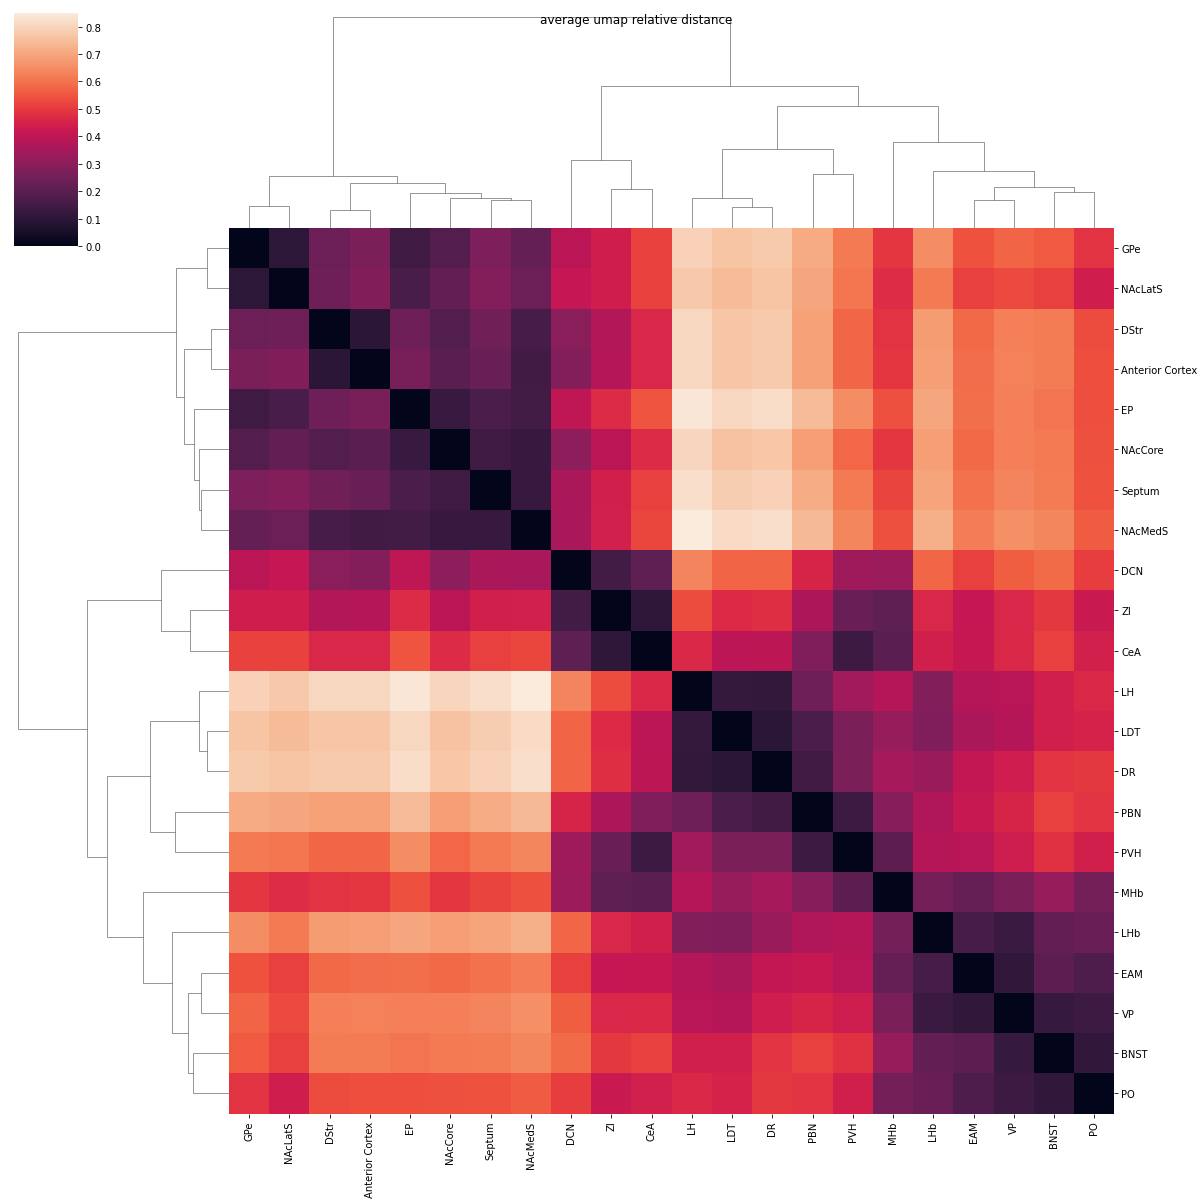

In [114]:
umap_plot(X_scaled,labels) 

# Amygdala 
# No FC condition (below)

In [115]:
Amyg_data2=Amyg_data[(Amyg_data["condition"] == 'cTRIO Amygdala cocaine 1 dose') |
                (Amyg_data["condition"] == 'cTRIO Amygdala isoflurane anest')| 
                (Amyg_data["condition"] == 'cTRIO Amygdala ketamine anesthe')]
features, labels, regions, condition_nums = get_feats_and_labels(Amyg_data2)

In [116]:
Amyg_data2=Amyg_data[(Amyg_data["condition"] == 'cTRIO Amygdala cocaine 1 dose') |
                (Amyg_data["condition"] == 'cTRIO Amygdala isoflurane anest')]
features_amyg, labels_amyg, condition_nums_amyg, regions_amyg = get_feats_and_labels(Amyg_data2)

In [117]:
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling
print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

                        0          1          2          3          4   \
DCN               0.571066   0.799201   0.523104   0.352941        0.0   
PBN               6.472081   2.397602  10.113339   1.764706   3.174603   
LDT               1.015228   0.799201   1.046207   0.470588        0.0   
DR               31.598985  22.277722  36.704446  13.764706  33.333333   
ZI                8.185279   6.693307   4.010462   7.764706   4.761905   
LH               16.370558  11.588412  11.508282  15.176471  13.492064   
CeA               3.426396   2.597403   2.092415   0.352941   0.793651   
MHb               0.190355   1.098901        0.0   1.058824        0.0   
LHb               0.571066   1.798202   1.394943   4.235294        0.0   
PVH               2.664975   0.999001   1.656495   0.352941        0.0   
GPe               3.045685   5.894106   1.220575   4.588235   7.142857   
EP                0.380711   0.799201   0.610288   0.705882   0.793651   
EAM               2.284264   1.098901 

In [118]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[3.02870406 2.3693806  1.94007776 1.65237109 1.45210156]


principal component 1  principal component 2  principal component 3  \
0                1.158200               1.593275               0.504926   
1                3.554963               0.242993               0.209938   
2                2.950432              -0.688024               0.695130   
3                2.729902              -2.061528               1.590314   
4               -0.163136               1.329464              -1.221207   
5                0.852432              -1.837835               1.349783   
6                1.435295               2.305614              -1.436913   
7                0.324221               0.498335              -1.360793   
8               -0.227471              -1.271504              -1.902169   
9                2.406549               2.342003              -0.978411   
10              -2.100960               0.804071               0.301609   
11              -1.265613              -1.214480               2.161628   
12              -0.111482              -2.101930              -1.617968   
13              -0.513773              -1.931064              -0.821129   
14              -0.375914              -0.396777               2.458821   
15              -0.816319              -1.008232              -1.847383   
16              -1.629571              -2.235639              -1.804573   
17              -0.933393               2.028750               0.438827   
18              -1.087971               1.156038               1.708944   
19              -2.060041               1.422244              -0.224075   
20              -1.801372               0.208034               1.097977   
21              -2.324976               0.816194               0.696725   

    principal component 4  principal component 5  
0               -1.209482               0.638808  
1               -0.204643               0.927058  
2                0.009592               0.234802  
3               -0.088111              -0.012446  
4               -0.035983              -2.143557  
5                2.961162              -1.834805  
6               -0.172985              -0.902003  
7               -0.445412              -0.622988  
8               -1.545128               1.536939  
9                0.618829               0.626350  
10               0.038226              -1.131047  
11              -1.087019              -1.158109  
12              -2.062936              -1.254802  
13               2.748108               1.247257  
14              -1.036500               1.086368  
15               1.197512               1.275672  
16              -0.790838              -0.725015  
17               0.394858              -0.174694  
18              -0.281926              -1.123697  
19               1.932304               0.064054  
20              -1.134435               1.038948  
21               0.194809               2.406907

### PCA Plots

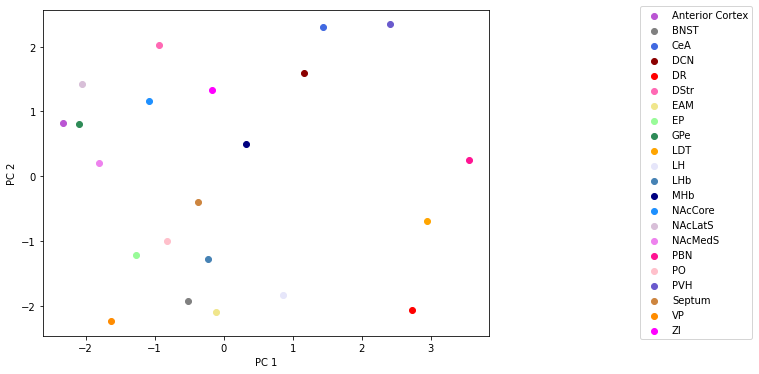

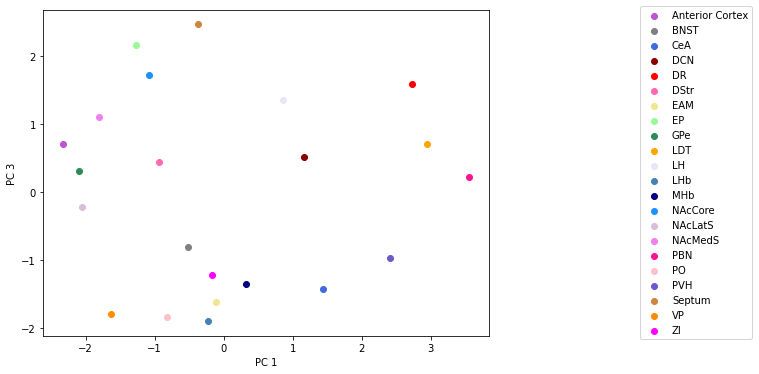

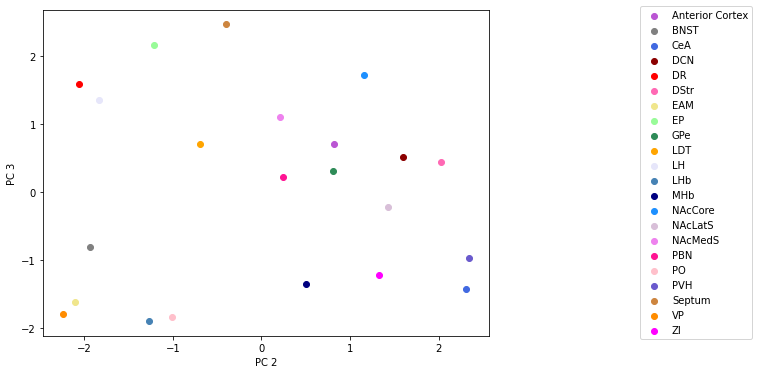

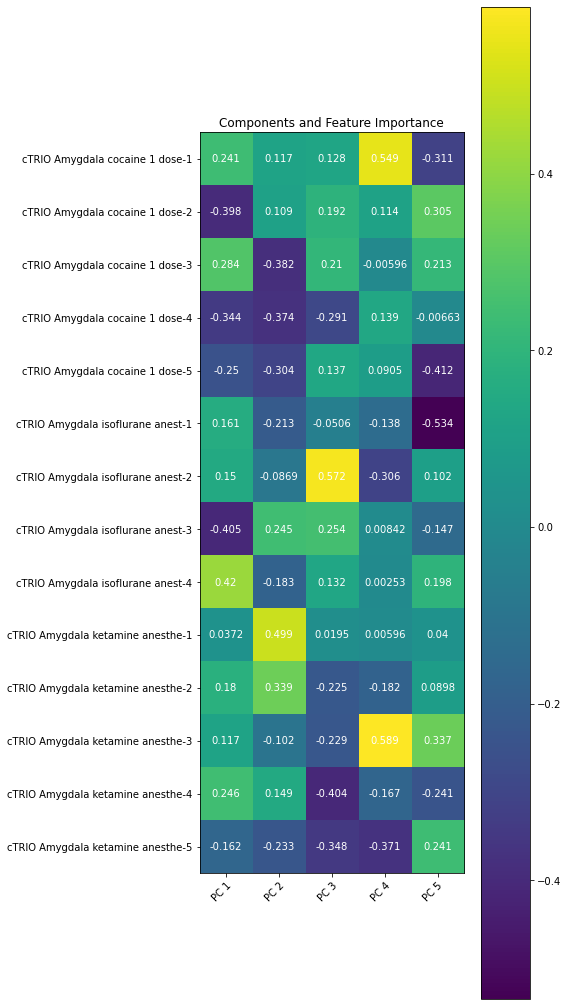

In [119]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

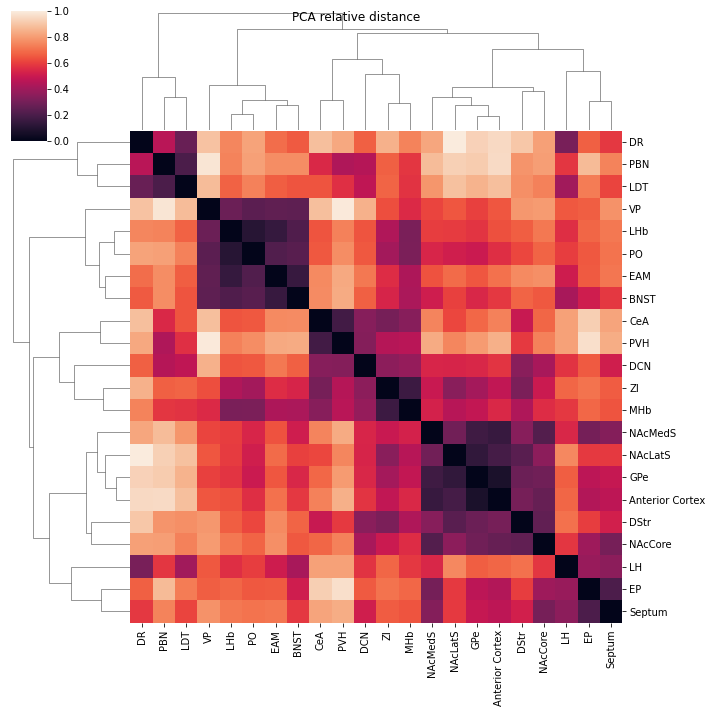

In [120]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

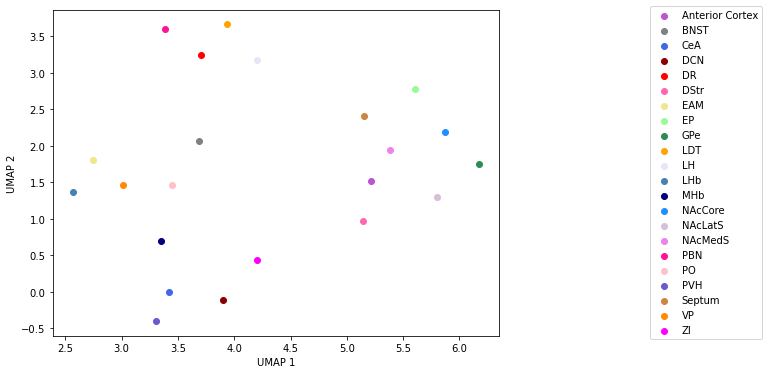

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


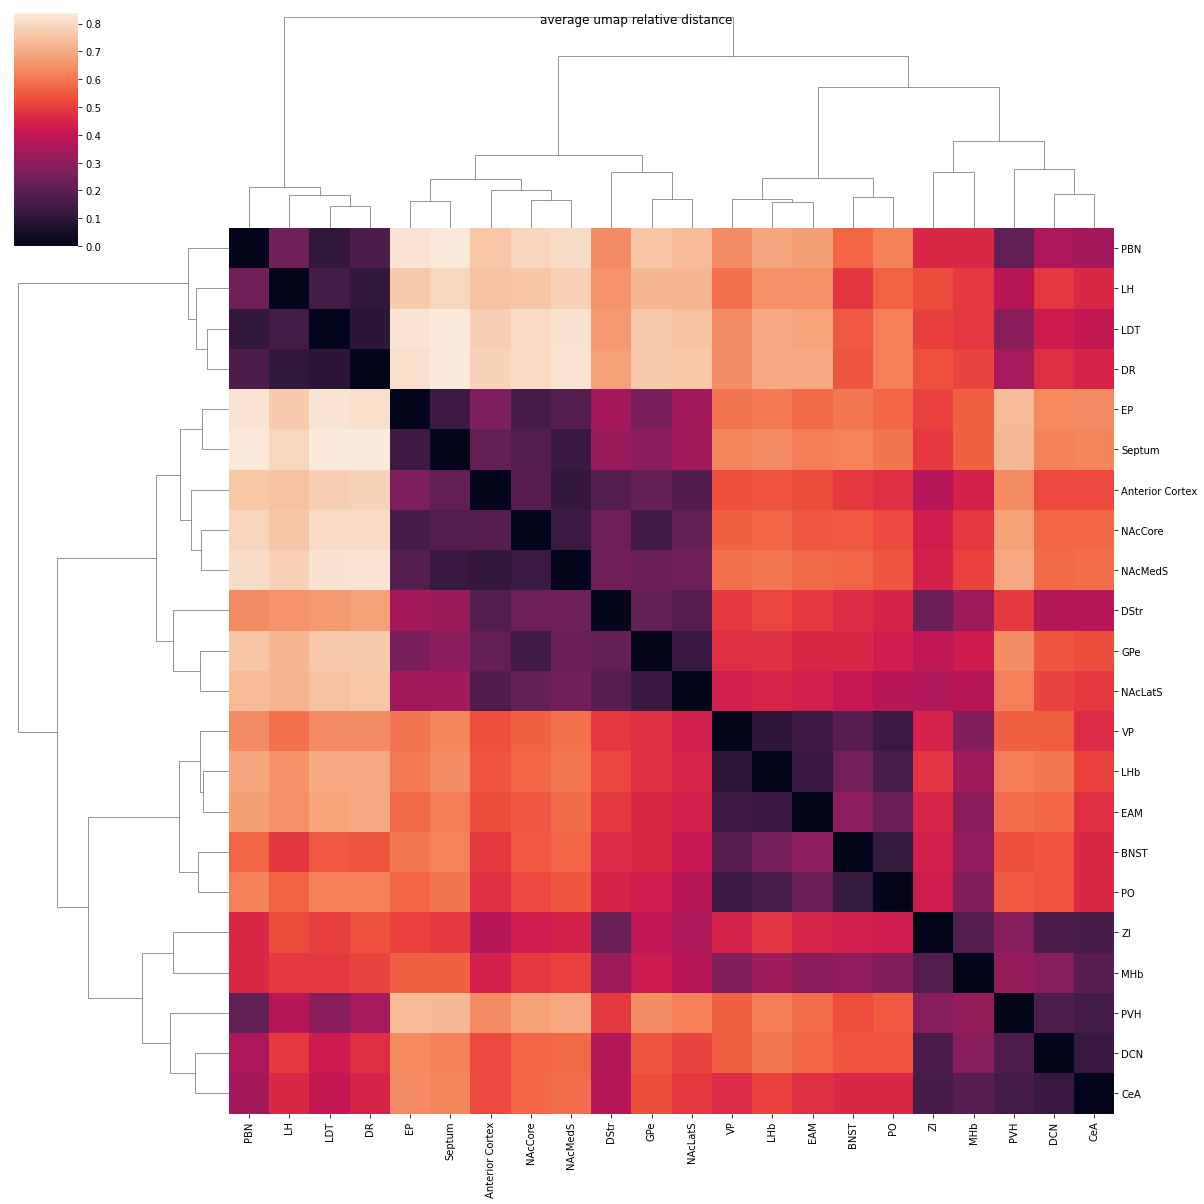

In [121]:
umap_plot(X_scaled,labels) 

# mPFC (below)

In [122]:
def get_feats_and_labels(dataframe):
    regions=dataframe['condition'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    condition_nums=dataframe['condition_num'].values
    return features, labels, regions, condition_nums

In [123]:
mPFC_data.reset_index(inplace=True)
features, labels, regions, condition_nums= get_feats_and_labels(mPFC_data)

In [124]:
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling
 
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

In [125]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[4.0959956  2.74821291 2.09710654 1.88880343 1.39958684]


principal component 1  principal component 2  principal component 3  \
0                0.369594               0.058534               1.218763   
1                2.488112               3.446213              -1.418054   
2               -2.102069               1.022730              -1.795045   
3               -0.997258               3.554288               2.182519   
4               -0.754135              -0.261630               3.078273   
5                1.923762              -1.501538               0.524442   
6                2.422862              -0.068545               0.250521   
7               -3.292990               0.016318               1.732901   
8               -1.701225              -1.482591               1.367600   
9                3.344611               0.090510              -0.185691   
10              -3.088020               2.097952              -0.867636   
11              -0.193950              -0.960995               0.593508   
12               3.199279               1.636787              -0.335821   
13              -1.555600              -0.246847              -1.625719   
14               0.796525               0.215667               1.233209   
15               2.276181              -0.493575               1.272246   
16               1.320947              -2.430791              -0.999472   
17              -2.244151               0.101335              -0.728818   
18              -1.638856              -0.934143              -1.315537   
19              -0.003245               0.910209              -2.472502   
20              -1.161920              -2.018647              -0.841665   
21               0.591545              -2.751240              -0.868022   

    principal component 4  principal component 5  
0               -1.123323               1.988911  
1               -0.130586              -1.768377  
2                0.792244              -0.371950  
3                0.755180               0.503795  
4               -1.630237              -0.767181  
5               -2.392419              -0.833973  
6                0.635353              -1.026282  
7                0.764253              -1.348633  
8                1.912951              -0.565161  
9               -0.060447               0.754282  
10              -0.957020              -0.834696  
11              -0.626442              -0.640403  
12               0.167394              -0.589651  
13               3.305004               0.819457  
14               1.150065               2.332570  
15               1.030528               1.090452  
16               1.309406              -1.650378  
17              -1.440306               0.109493  
18              -1.979418               0.376954  
19              -1.089763               1.790397  
20              -0.715901               1.272715  
21               0.323482              -0.642339

### PCA plots

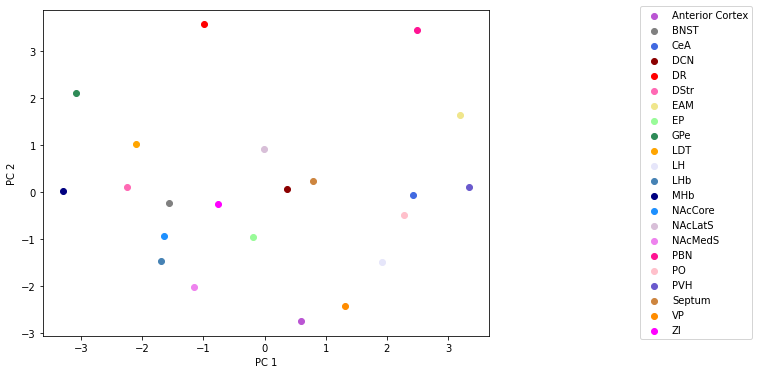

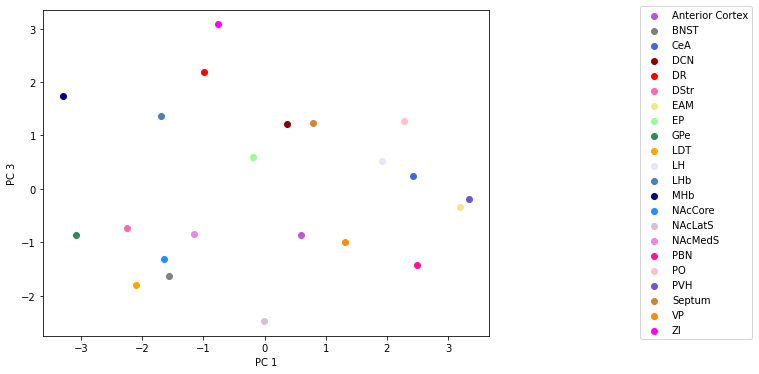

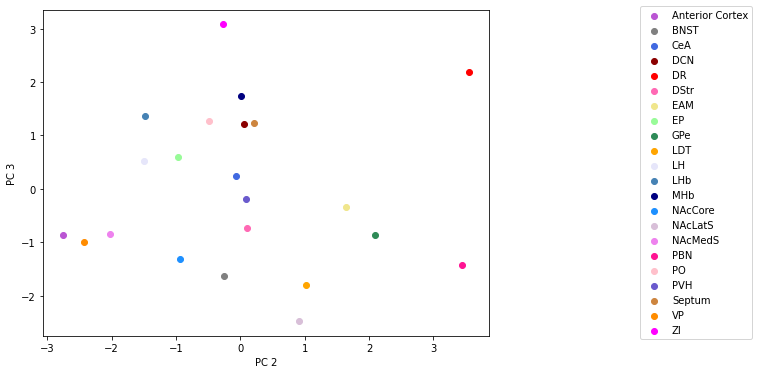

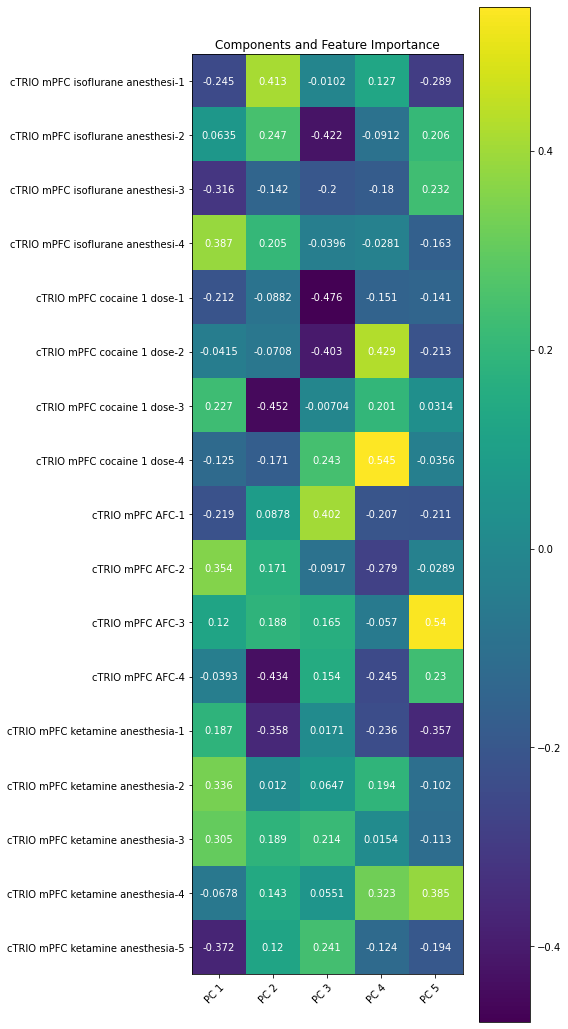

In [126]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

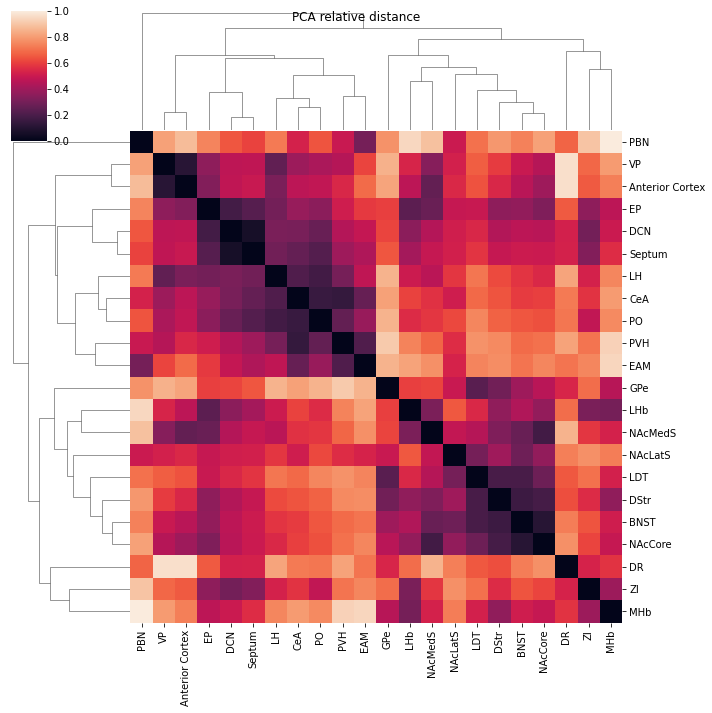

In [127]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

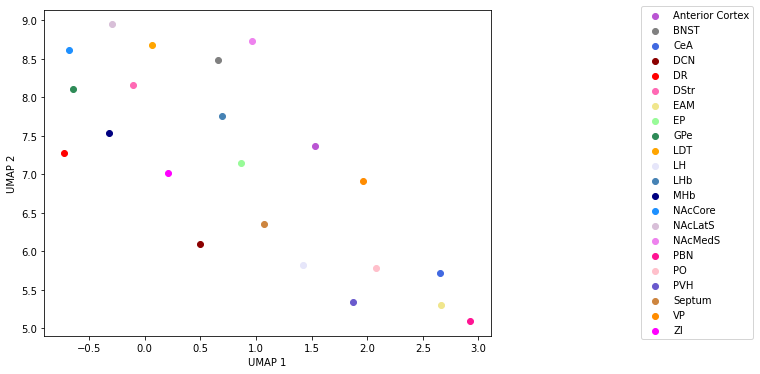

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


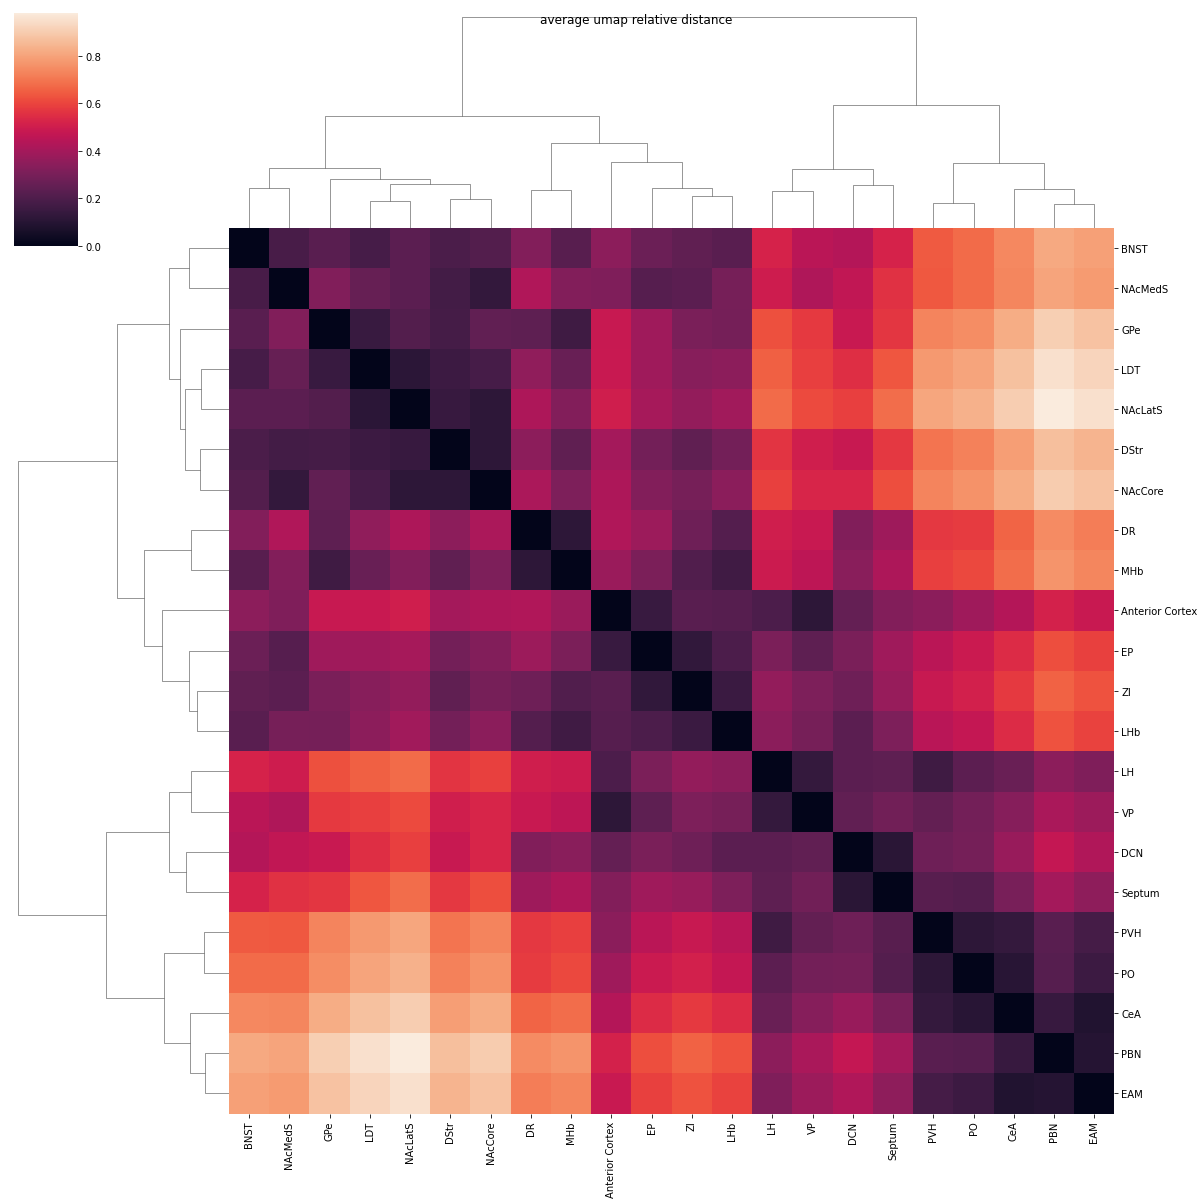

In [128]:
umap_plot(X_scaled,labels) 

# mPFC 
# No FC condition (below)

In [129]:
#make proper dataframe here!
mPFC_data2=mPFC_data[(mPFC_data["condition"] == 'cTRIO mPFC ketamine anesthesia') |
                (mPFC_data["condition"] == 'cTRIO mPFC cocaine 1 dose')| 
                (mPFC_data["condition"] == 'cTRIO mPFC isoflurane anesthesi')]
features, labels, regions, condition_nums = get_feats_and_labels(mPFC_data2)

In [130]:
#make proper dataframe here!
mPFC_data2=mPFC_data[(mPFC_data["condition"] == 'cTRIO mPFC cocaine 1 dose')| 
                (mPFC_data["condition"] == 'cTRIO mPFC isoflurane anesthesi')]
featuresmPFC, labelsmPFC, condition_numsmPFC, regionsmPFC = get_feats_and_labels(mPFC_data2)

In [131]:
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling

print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

                       0         1         2         3         4         5   \
DCN              0.373599  0.600601  0.032087  0.562701       0.0  0.306748   
PBN              7.098381  7.207207  2.695331   8.92283   6.31579  7.055215   
LDT               1.24533  2.102102  2.791593  0.803859  1.263158  1.840491   
DR               46.32628  34.68469  17.80844  33.03859  22.73684  28.83436   
ZI               3.362391  1.576577  3.369164  3.135048  3.157895  1.993865   
LH               5.977584  11.03604   7.89347  13.98714  8.842105  7.208589   
CeA              2.615193  2.252252  1.203273  3.617363  3.157895  2.300613   
MHb              1.494396       0.0  0.673833  0.241158  0.631579  0.460123   
LHb              2.615193  1.126126  4.042997  2.170418  3.789474   3.98773   
PVH               1.24533  3.153153  1.684582  2.652733  0.842105  1.226994   
GPe               3.73599  1.801802  3.176641  0.482315  2.526316  1.840491   
EP                    0.0       0.0  0.625702       

In [132]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[3.51157738 2.02795838 1.85364042 1.53540458 1.2795298 ]


principal component 1  principal component 2  principal component 3  \
0                2.115227              -0.384009              -1.811325   
1                1.505236               2.062683              -2.009044   
2               -2.493777              -0.286852              -0.961593   
3               -0.906371               3.544994              -0.033663   
4               -0.215861               0.712153               0.726504   
5                2.157699              -1.880453              -0.859794   
6                2.468118               1.032309               0.415132   
7               -2.457811               0.764659               0.854644   
8               -1.146363              -0.527369               2.204747   
9                3.043508              -0.387851              -0.556952   
10              -2.675856               0.786127              -1.875346   
11              -0.047352              -1.206096               0.410786   
12               2.108480               1.816087               0.174056   
13              -2.032086               0.240397               1.125876   
14               0.128174               0.776532               2.802289   
15               1.967028               0.743029               1.592343   
16               1.641844              -1.688069               0.536024   
17              -2.140325              -0.736531              -0.837909   
18              -1.597609              -1.304216              -0.894771   
19              -0.620388              -0.304156              -2.306416   
20              -1.494550              -1.374267               0.580363   
21               0.693035              -2.399100               0.724049   

    principal component 4  principal component 5  
0                0.060091               2.573267  
1               -1.093973              -0.820359  
2               -0.639346               0.290641  
3               -0.232163               1.160417  
4                3.002755               0.298162  
5                0.688242               1.091505  
6                0.244059              -1.680892  
7                0.557874               1.520399  
8                0.142531               1.007422  
9                0.519788               0.663063  
10              -0.036042              -0.274946  
11               1.961521               0.458130  
12               0.131643              -1.257729  
13              -2.684871               0.878569  
14              -0.587073              -0.461111  
15               0.106485              -0.740351  
16              -2.043998               0.447118  
17               1.581273              -0.788008  
18               0.246213              -1.801174  
19              -0.909743              -0.569922  
20               0.169215              -1.494210  
21              -1.184477              -0.499988

### PCA plots

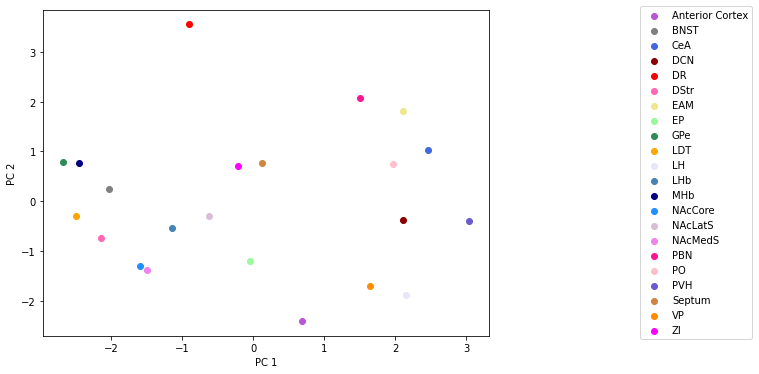

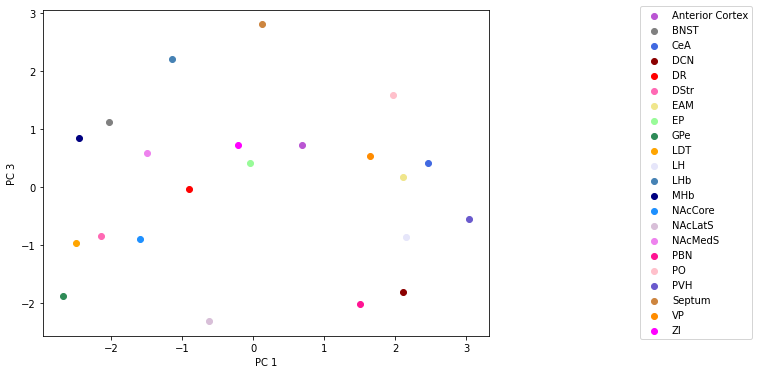

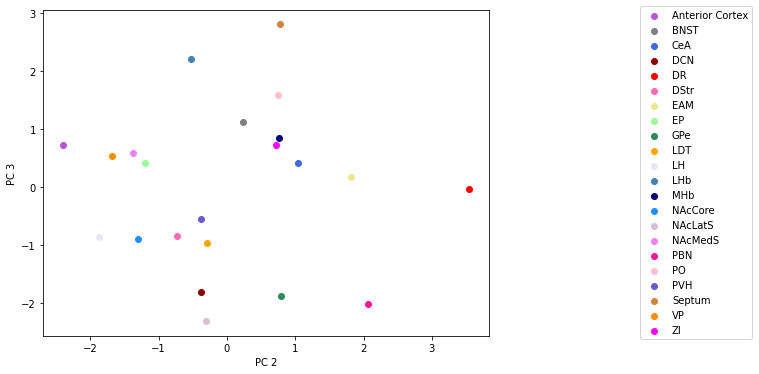

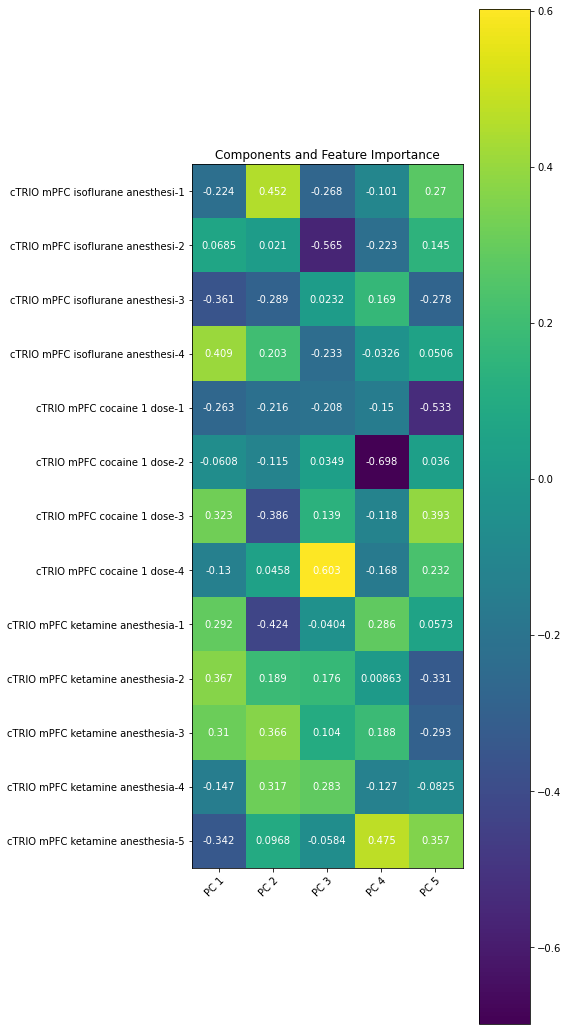

In [133]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

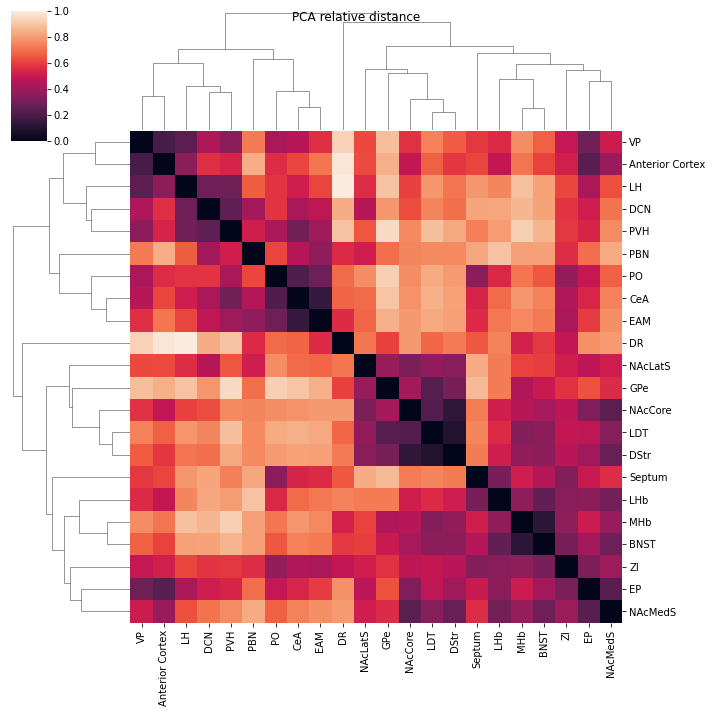

In [134]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

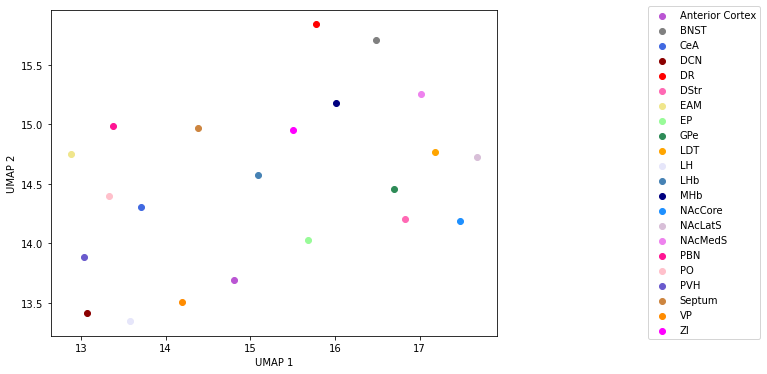

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


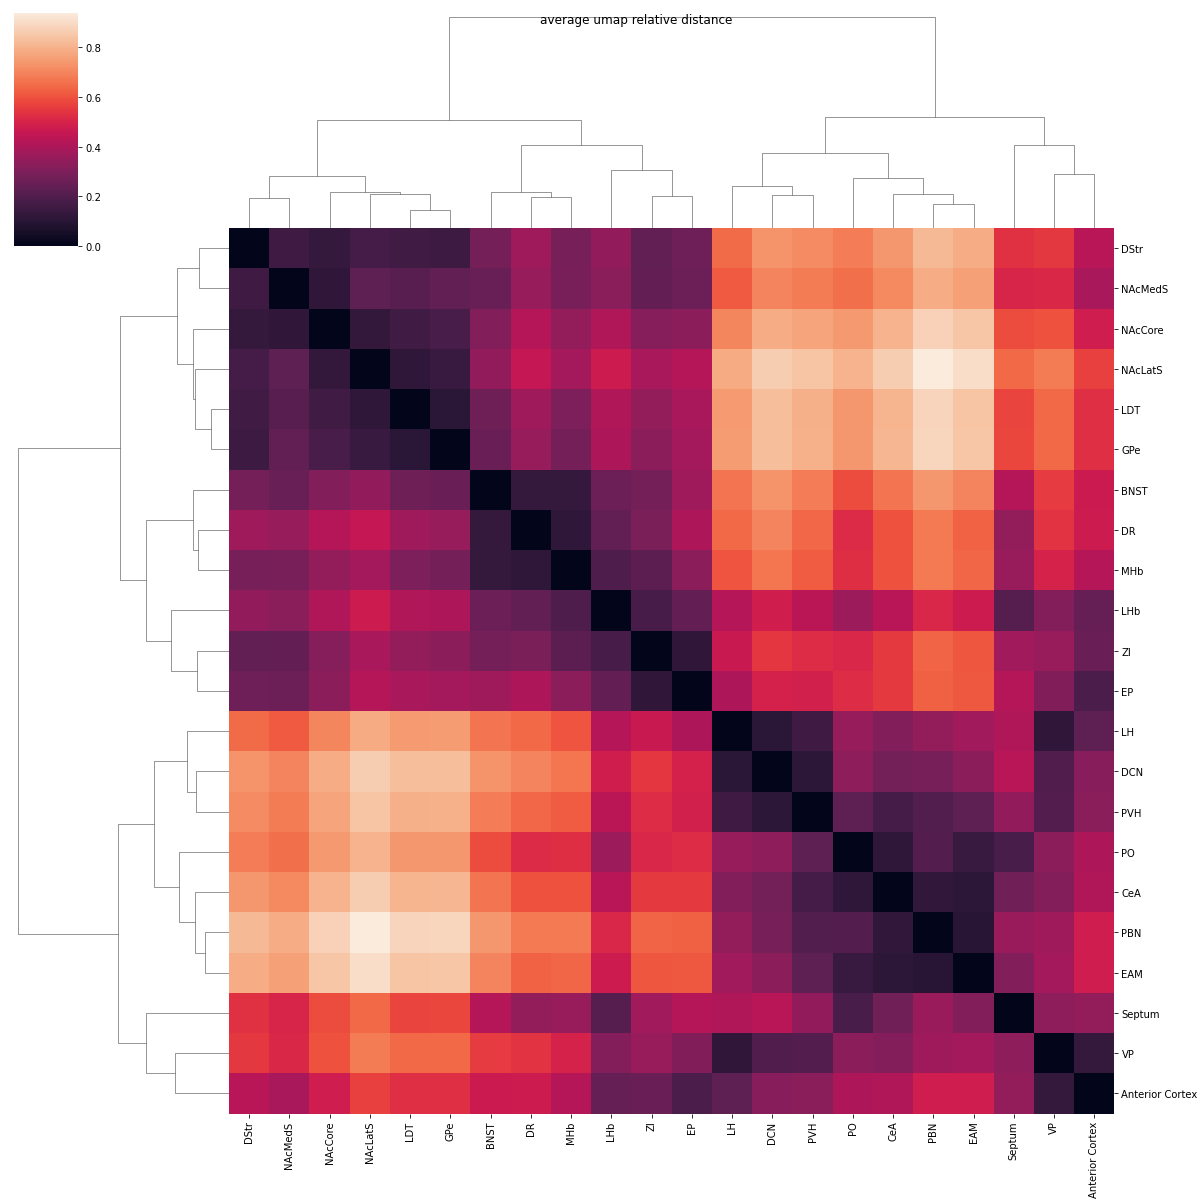

In [135]:
umap_plot(X_scaled,labels) 

# DAT-cre and 66T

In [136]:
def get_feats_and_labels(dataframe):
    regions=dataframe['Experimental condition'].values
    features0=dataframe.iloc[: , 1:23]
    features=features0.transpose()
    labels=features.index
    condition_nums=dataframe['condition_nums'].values
    return features, labels, regions, condition_nums
features, labels, regions, condition_nums=get_feats_and_labels(DATcre66T)
features_datcre66t, labels_datcre66t, regions_datcre66t, condition_nums_datcre66t=get_feats_and_labels(DATcre66T)

In [137]:
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling

print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

                         0          1          2          3          4  \
Anterior Cortex   4.539353   3.458260   1.838390   2.448574   4.309921   
NAcMed            5.564369   5.113636   7.768099   6.700491   4.328340   
NAcLat            4.795607   4.572771   6.650646   3.722495   4.641454   
NAcCore           5.491153   4.736670  11.282667   4.963327   4.365177   
DStr              6.314826   4.458042  27.053169  11.986434   5.654470   
VP               11.000610  11.161495   5.893662  11.928528   8.380403   
PO                5.289811   6.244537   3.045960   5.062593   4.254666   
Septum            0.787065   3.114073   0.288375   1.381459   0.276277   
BNST              1.629042   1.966783   1.676179   1.836431   0.847250   
EAM               5.271507   4.753059   2.288976   4.309822   6.004420   
EP                0.622331   0.147509   0.378492   0.115811   0.828831   
Gpe               5.930445   3.245192   6.127966   2.614019   5.801817   
PVH               1.976815   1.589816 

In [138]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[3.12626684 1.90467101 1.30811707 0.81071704 0.61995994]


principal component 1  principal component 2  principal component 3  \
0                1.588164               0.633333              -0.813204   
1               -2.047240               0.809998               2.075203   
2                1.518765              -2.076492               0.605900   
3               -0.059319              -1.336380               2.063426   
4                0.085427              -0.717920               2.561370   
5               -1.552568              -2.133668              -1.525637   
6               -1.741383              -1.616944              -0.880907   
7               -2.365129              -0.768173              -0.847140   
8               -0.916603               1.561574               0.913007   
9                1.423752               0.092385              -1.668633   
10               3.006975              -0.320893              -0.298515   
11               2.500340              -1.138812               0.670434   
12              -1.094901               0.614382               0.229619   
13              -2.230809              -0.733084              -1.303571   
14              -2.955977              -0.696857               0.081500   
15               1.184417               1.197820              -0.366500   
16              -0.732096               1.864052              -0.445752   
17               2.213032              -1.587326               0.016347   
18              -0.568249               1.477288              -0.489127   
19              -0.458320               2.689278               0.353923   
20               1.513586               1.304508              -0.939674   
21               1.688134               0.881931               0.007930   

    principal component 4  principal component 5  
0                0.050928              -0.649443  
1                0.613452              -0.565215  
2               -0.464042               0.387336  
3               -0.193555              -0.401306  
4               -0.238580               0.736237  
5                1.079359               0.154528  
6               -0.120971              -1.027167  
7               -1.470341               0.845384  
8                0.690057               1.338896  
9                0.785965               0.284405  
10               0.659602              -0.665987  
11              -0.092764              -1.235325  
12               2.191065               0.588053  
13              -0.909484               0.058987  
14              -0.378687              -0.133834  
15              -0.397647               1.218118  
16               0.598782              -0.427995  
17              -0.115235               0.321200  
18               0.925918              -1.029624  
19              -1.792109              -1.238481  
20              -0.906285               0.625277  
21              -0.515428               0.815956

### PCA Plots

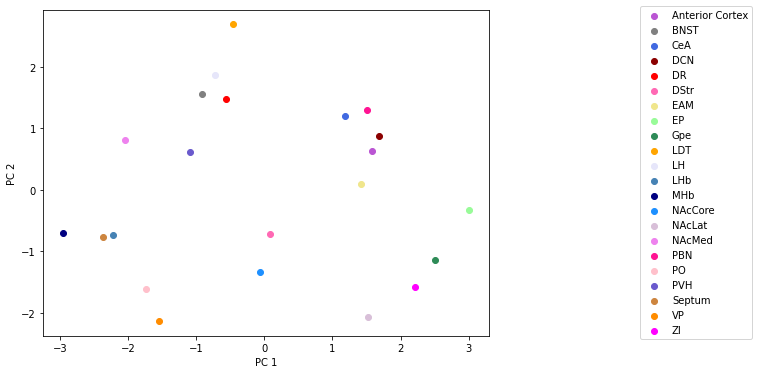

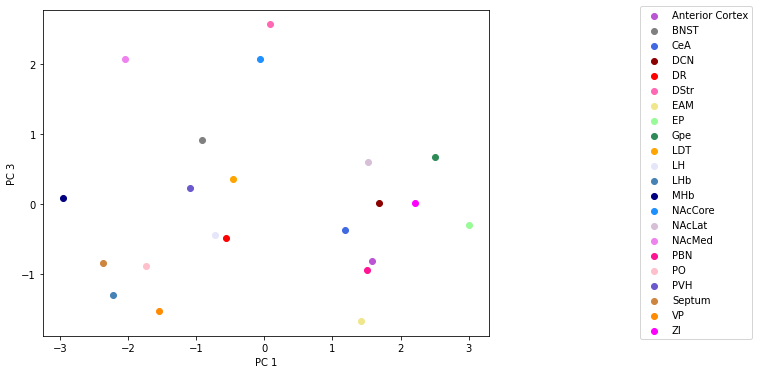

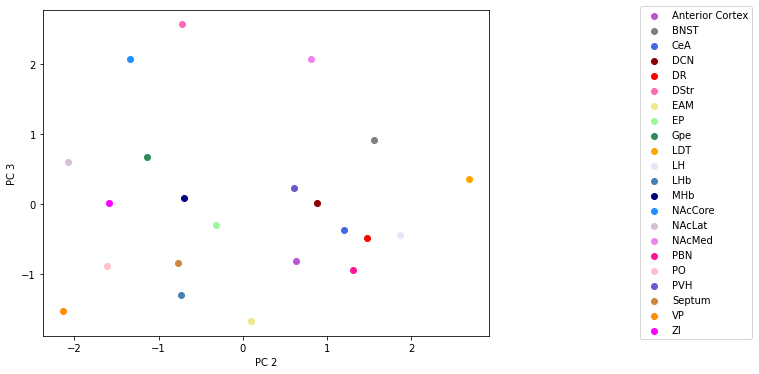

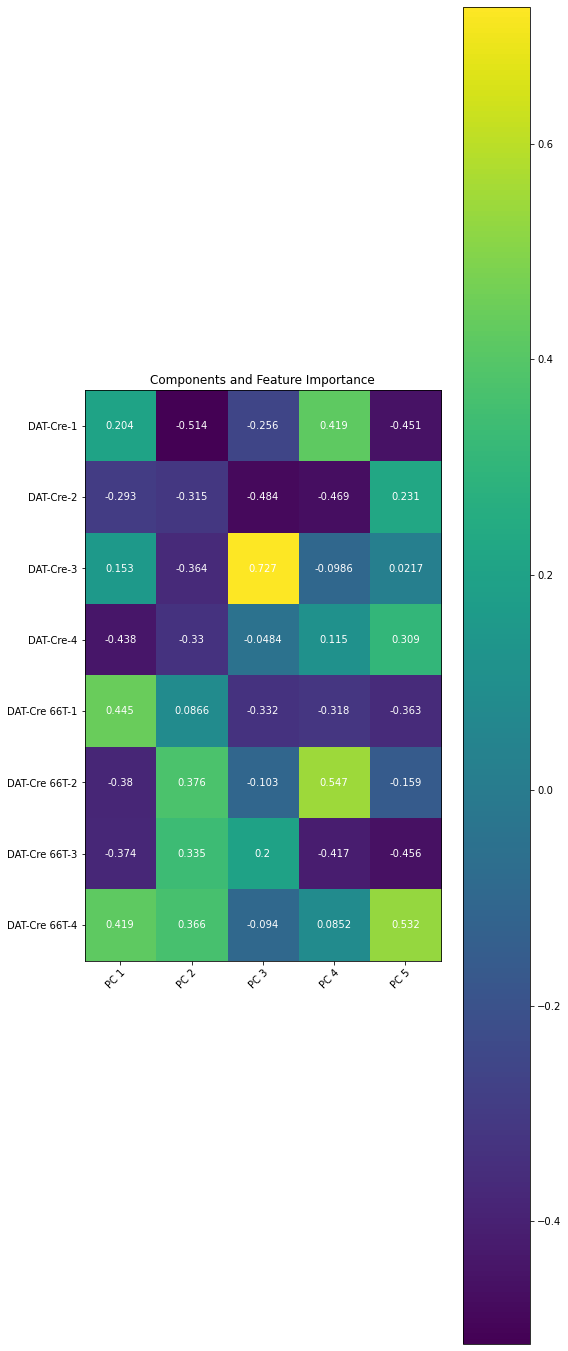

In [139]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

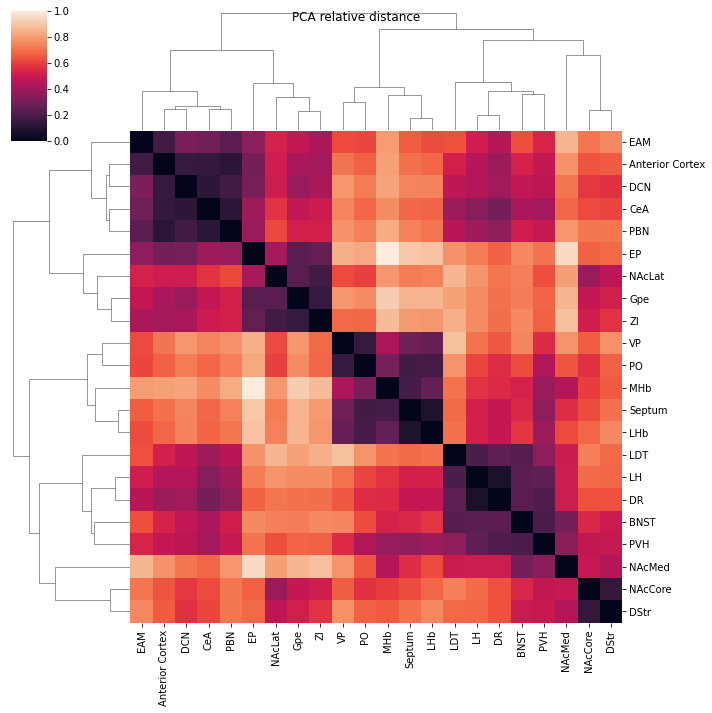

In [140]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

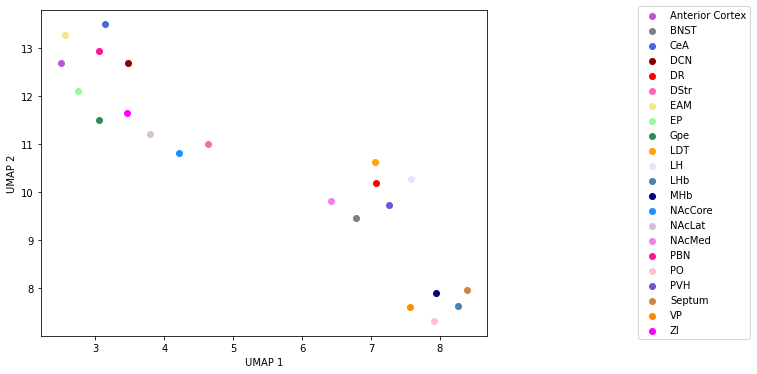

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


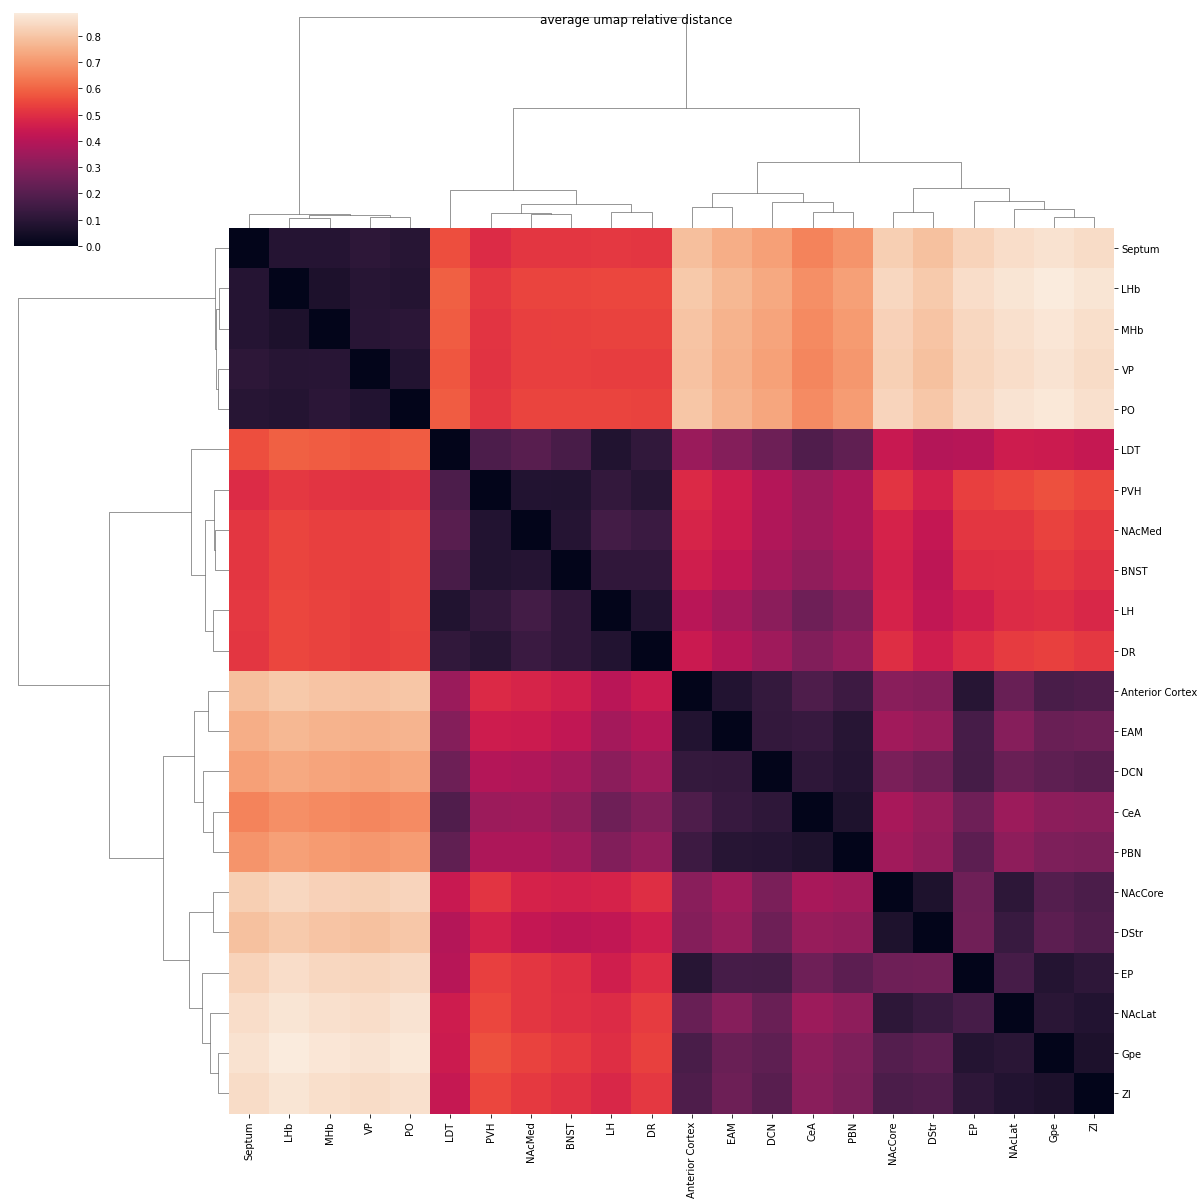

In [141]:
umap_plot(X_scaled,labels) 

# DAT-cre and 66T and Gad2Cre (no drugs)

In [142]:
features, labels, regions, condition_nums=get_feats_and_labels(DATcre66T_gad2)
regions=list(regions)+list(regions2)
condition_nums=list(condition_nums)+list(condition_nums2)
#scale X 
X=features.to_numpy().astype(float)
X2=features2.to_numpy().astype(float)
#get rid of NAs before scaling
X=np.hstack((X, X2))
print(features)
X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

                0          1          2          3          4          5   \
Cortex    4.539353   3.458260   1.838390   2.448574   4.309921   2.850023   
NAcMed    5.564369   5.113636   7.768099   6.700491   4.328340   9.484504   
NAcLat    4.795607   4.572771   6.650646   3.722495   4.641454   0.934434   
NAcCore   5.491153   4.736670  11.282667   4.963327   4.365177   3.877901   
DStr      6.314826   4.458042  27.053169  11.986434   5.654470   2.476250   
VP       11.000610  11.161495   5.893662  11.928528   8.380403  10.185329   
PO        5.289811   6.244537   3.045960   5.062593   4.254666   5.139386   
Septum    0.787065   3.114073   0.288375   1.381459   0.276277   1.074599   
BNST      1.629042   1.966783   1.676179   1.836431   0.847250   2.943467   
EAM       5.271507   4.753059   2.288976   4.309822   6.004420   4.859056   
EP        0.622331   0.147509   0.378492   0.115811   0.828831   0.140165   
Gpe       5.930445   3.245192   6.127966   2.614019   5.801817   1.354929   

In [143]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[6.09518882 3.70489057 3.49895801 2.3811014  1.72568745]


principal component 1  principal component 2  principal component 3  \
0               -1.744201              -0.449684              -3.716147   
1               -2.177658              -0.282143               2.656297   
2               -0.167785              -3.051560               0.765651   
3                1.385678              -1.704940               4.002828   
4                0.020320              -3.653958               0.478730   
5               -3.110847              -0.452896               0.393168   
6               -2.642506              -0.497167               2.060168   
7               -3.082169              -0.410230               0.429401   
8                3.563708               0.494862               0.133806   
9               -2.678865               1.111926              -1.803041   
10               2.941882              -0.463743              -1.896224   
11               3.431403              -1.361445               1.752253   
12              -2.144936               1.016311              -0.019491   
13              -2.509733               0.084117              -0.652127   
14              -2.817973              -0.752640              -1.503010   
15               3.586329              -0.574004              -0.241985   
16              -1.038304               2.674003              -0.046631   
17               2.740348              -1.527944              -2.248041   
18               1.763822               3.719625               0.902808   
19               1.607593               3.091982               1.694456   
20               0.798466               3.555682              -0.017072   
21               2.275427              -0.566156              -3.125797   

    principal component 4  principal component 5  
0                1.122777               0.163723  
1               -0.450795               0.786506  
2                3.056853               0.052262  
3                0.149705               0.089636  
4                0.892240               1.646737  
5                0.863294              -1.469290  
6               -1.374786              -1.480309  
7               -1.786307              -0.037689  
8               -1.776897               0.349843  
9                2.975878               0.510649  
10              -0.351986              -1.193396  
11               1.384997              -1.237362  
12              -1.493330               3.099305  
13              -1.394103              -1.876320  
14              -1.780419              -0.613674  
15              -0.922920               2.439568  
16               0.141995               1.672836  
17              -1.034645              -0.661507  
18              -0.256082              -0.155967  
19              -0.189421              -1.489944  
20               2.933319              -0.111249  
21              -0.709368              -0.484358

### PCA Plots

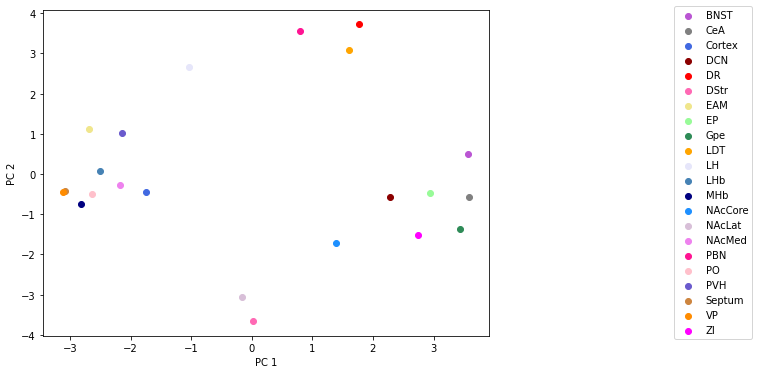

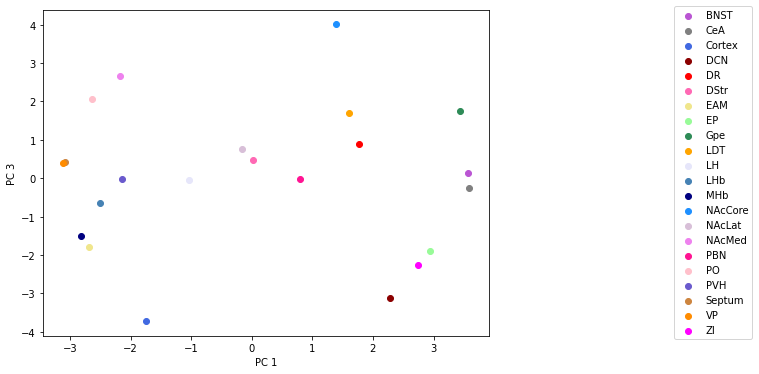

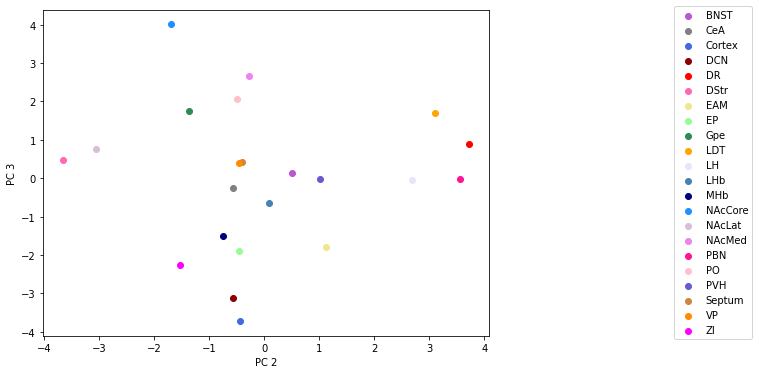

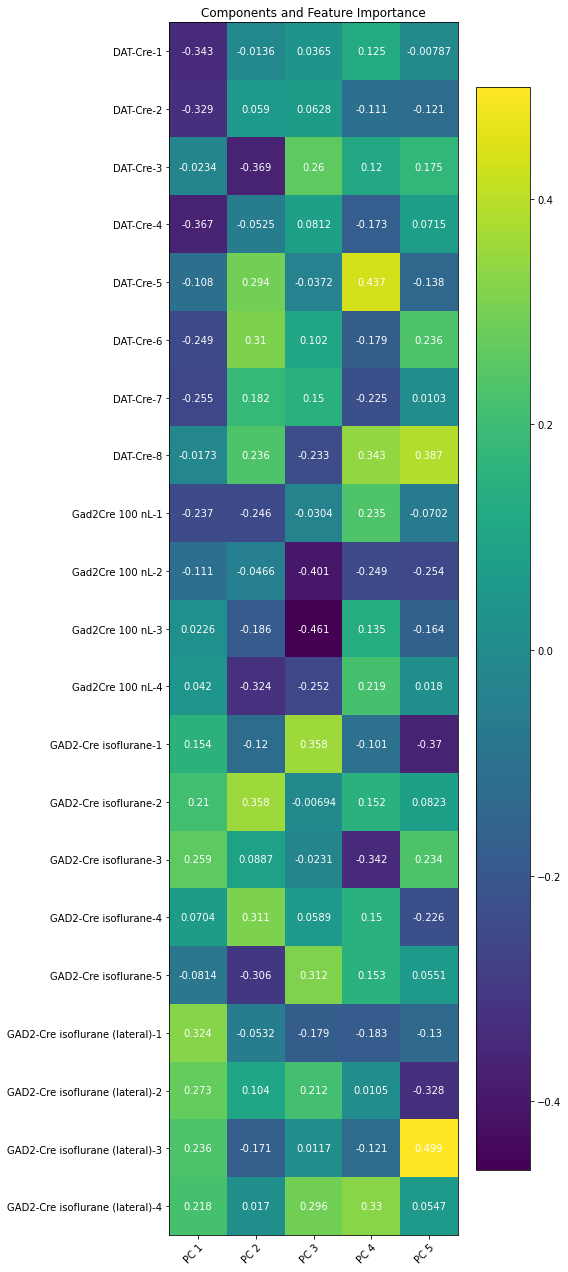

In [144]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

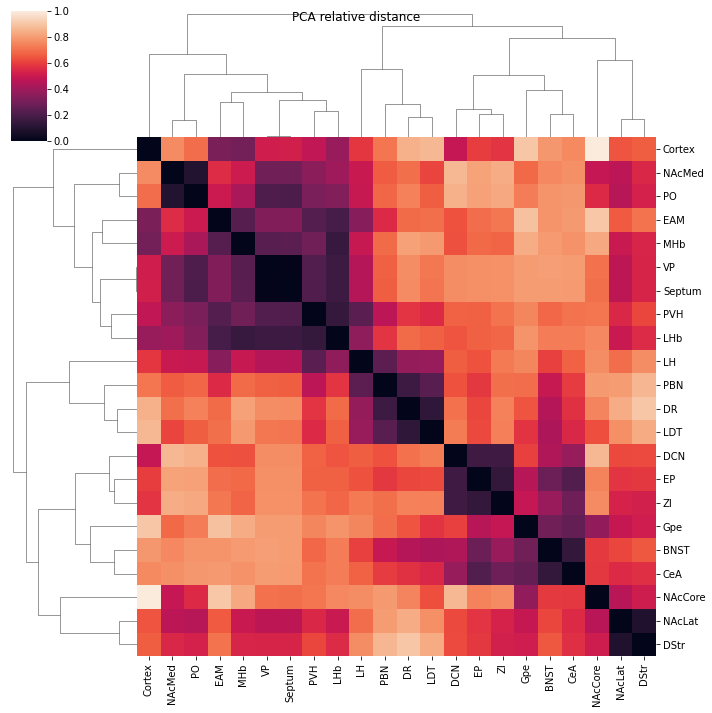

In [145]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

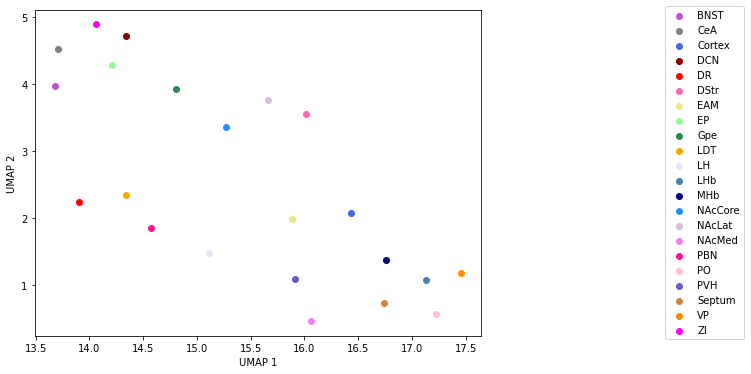

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


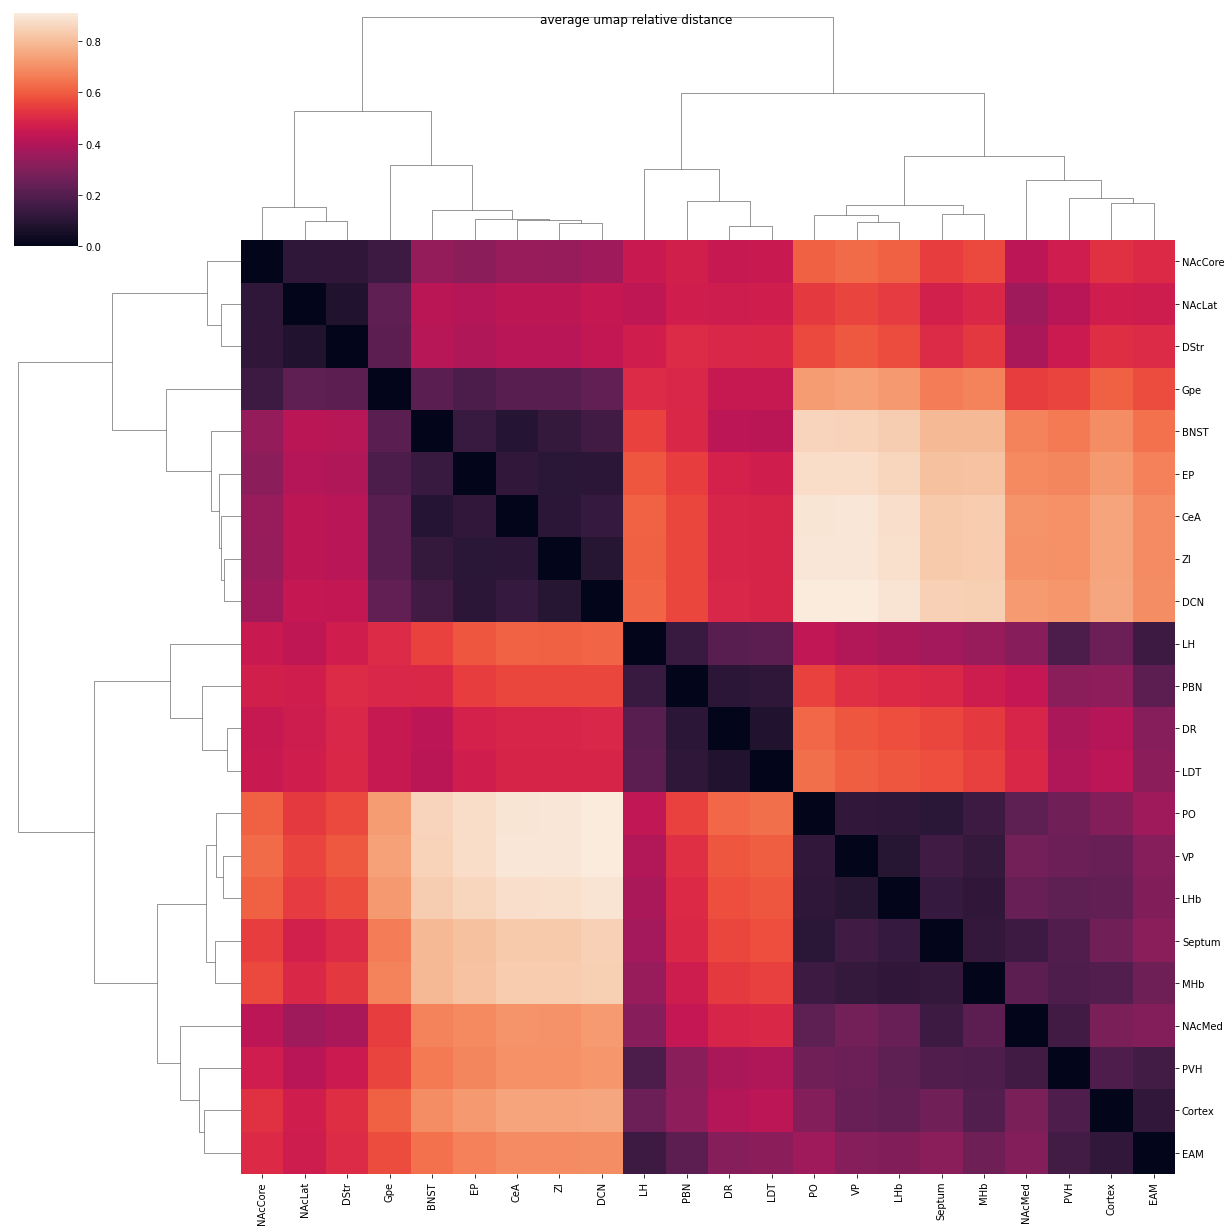

In [146]:
umap_plot(X_scaled,labels) 

# DAT-Cre vs GAD2-Cre vs GluT2-Cre

In [147]:
features2, labels2, condition_nums2, regions2 = get_feats_and_labels(DATcre66T_gad2)
features3, labels3, condition_nums3, regions3 = get_feats_and_labels(VGlut2_cre)
labels=list(labels2)
condition_nums=list(condition_nums2)+list(condition_nums4)+list(condition_nums3)
regions=list(regions2)+list(regions4)+list(regions3)
#scale X 

X2=features2.to_numpy().astype(float)
X3=features3.to_numpy().astype(float)
X4=features4.to_numpy().astype(float)
#features4, labels4, condition_nums4, regions4
X=np.hstack((X2, X4))
X=np.hstack((X, X3))
#get rid of NAs before scaling

X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

In [148]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[7.528269   4.55278259 4.23881449 3.48445718 2.06703847]


principal component 1  principal component 2  principal component 3  \
0               -1.808205              -0.098223               3.484188   
1               -2.273370              -1.390008              -2.782636   
2                1.323367              -3.738218              -0.778223   
3                2.320224              -3.159841              -2.800331   
4                1.323425              -4.167257               0.130075   
5               -3.678137               0.140461              -0.782735   
6               -3.478597              -1.104062              -1.159293   
7               -3.961316              -0.893653               0.577782   
8                2.774726               0.930292               0.164493   
9               -1.814626               0.400856              -1.205204   
10               2.235342               0.989302               2.244106   
11               4.131756              -1.744997              -1.055635   
12              -1.980208               1.149934              -0.820009   
13              -3.642821               0.286495               1.357972   
14              -3.391755              -0.536095               2.695009   
15               3.815245              -0.386040               0.160517   
16              -1.673001               2.750994              -1.897733   
17               2.929025              -0.086257               3.820697   
18               1.804203               4.205739              -1.609378   
19               1.769322               1.723863              -2.297282   
20               1.704081               3.778892              -1.133075   
21               1.571318               0.947823               3.686696   

    principal component 4  principal component 5  
0                2.865379               0.325543  
1               -1.165376               0.508033  
2                2.699071              -1.308995  
3               -1.661384               0.077832  
4                1.318647               1.539536  
5                0.517461              -2.544903  
6               -1.973094              -0.857514  
7               -1.947456               0.480161  
8               -2.640592               0.046861  
9                4.669111              -0.292808  
10              -0.553741              -0.901052  
11               0.518565              -1.463958  
12               0.753526               4.292413  
13              -1.585967              -1.151878  
14              -1.445815               0.306888  
15              -0.587969               2.416180  
16               0.996979               0.791443  
17              -0.438243              -0.356534  
18              -0.439062               0.162079  
19              -1.764964              -0.962646  
20               2.108628              -1.036066  
21              -0.243701              -0.070613

### PCA Plots

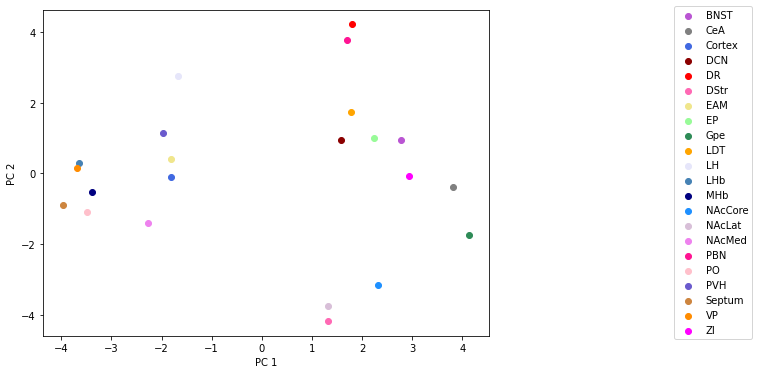

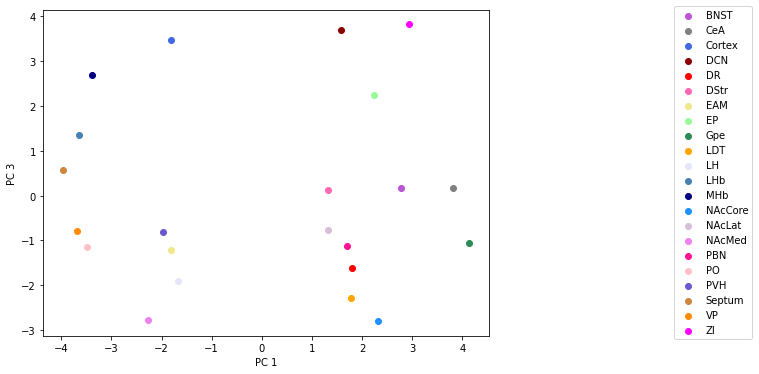

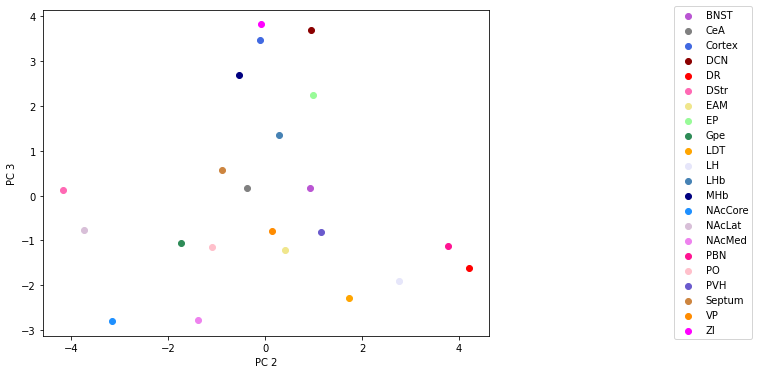

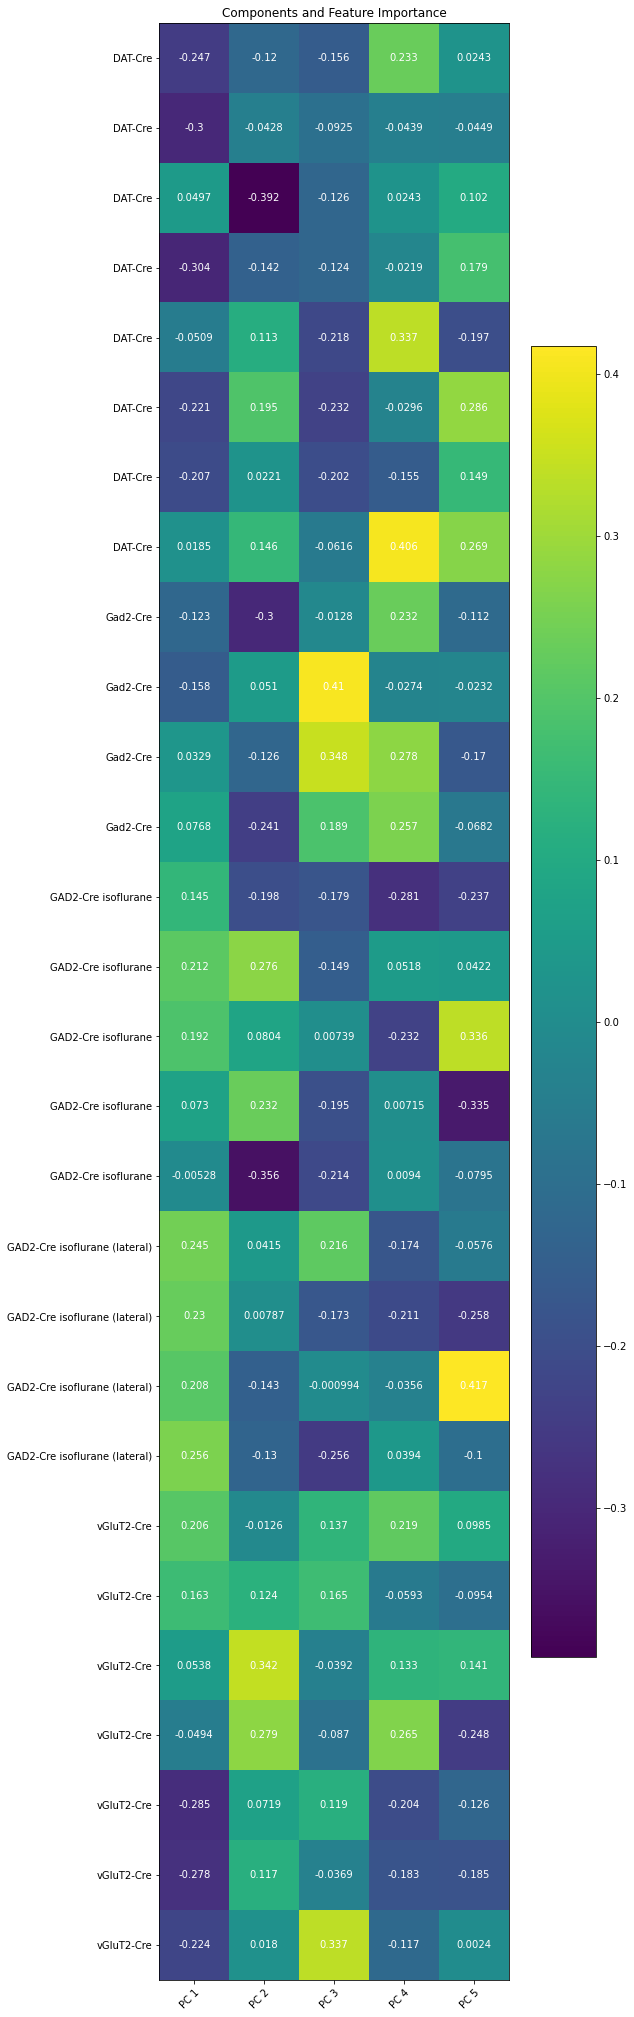

In [149]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

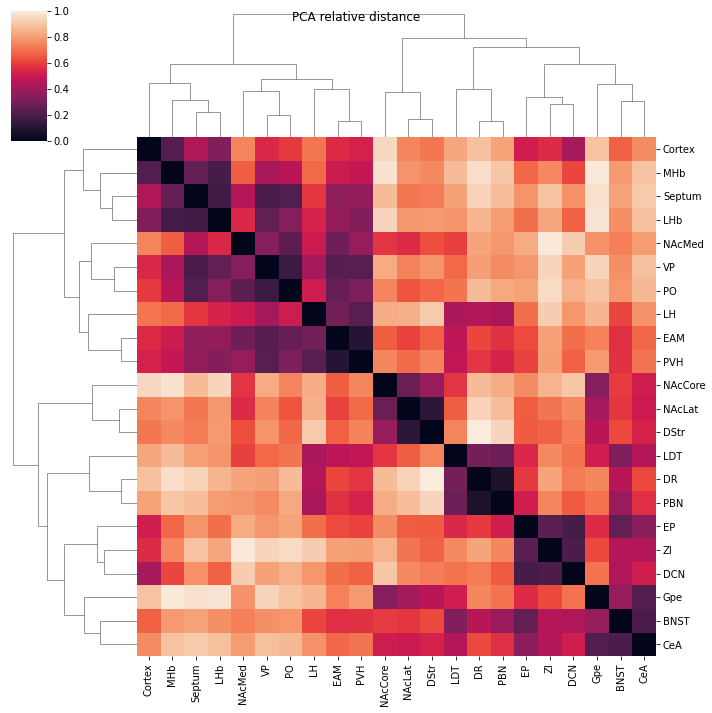

In [150]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

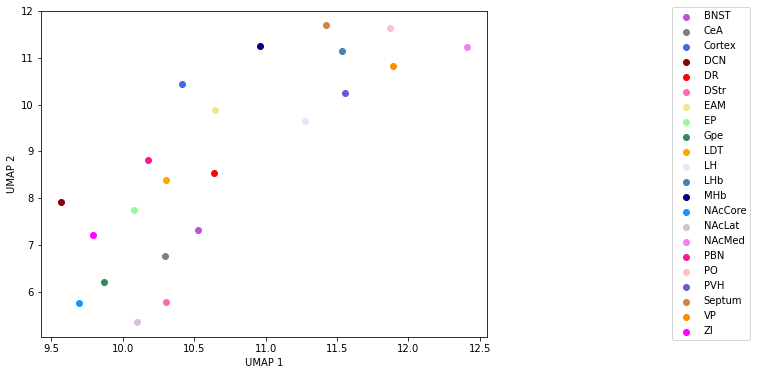

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


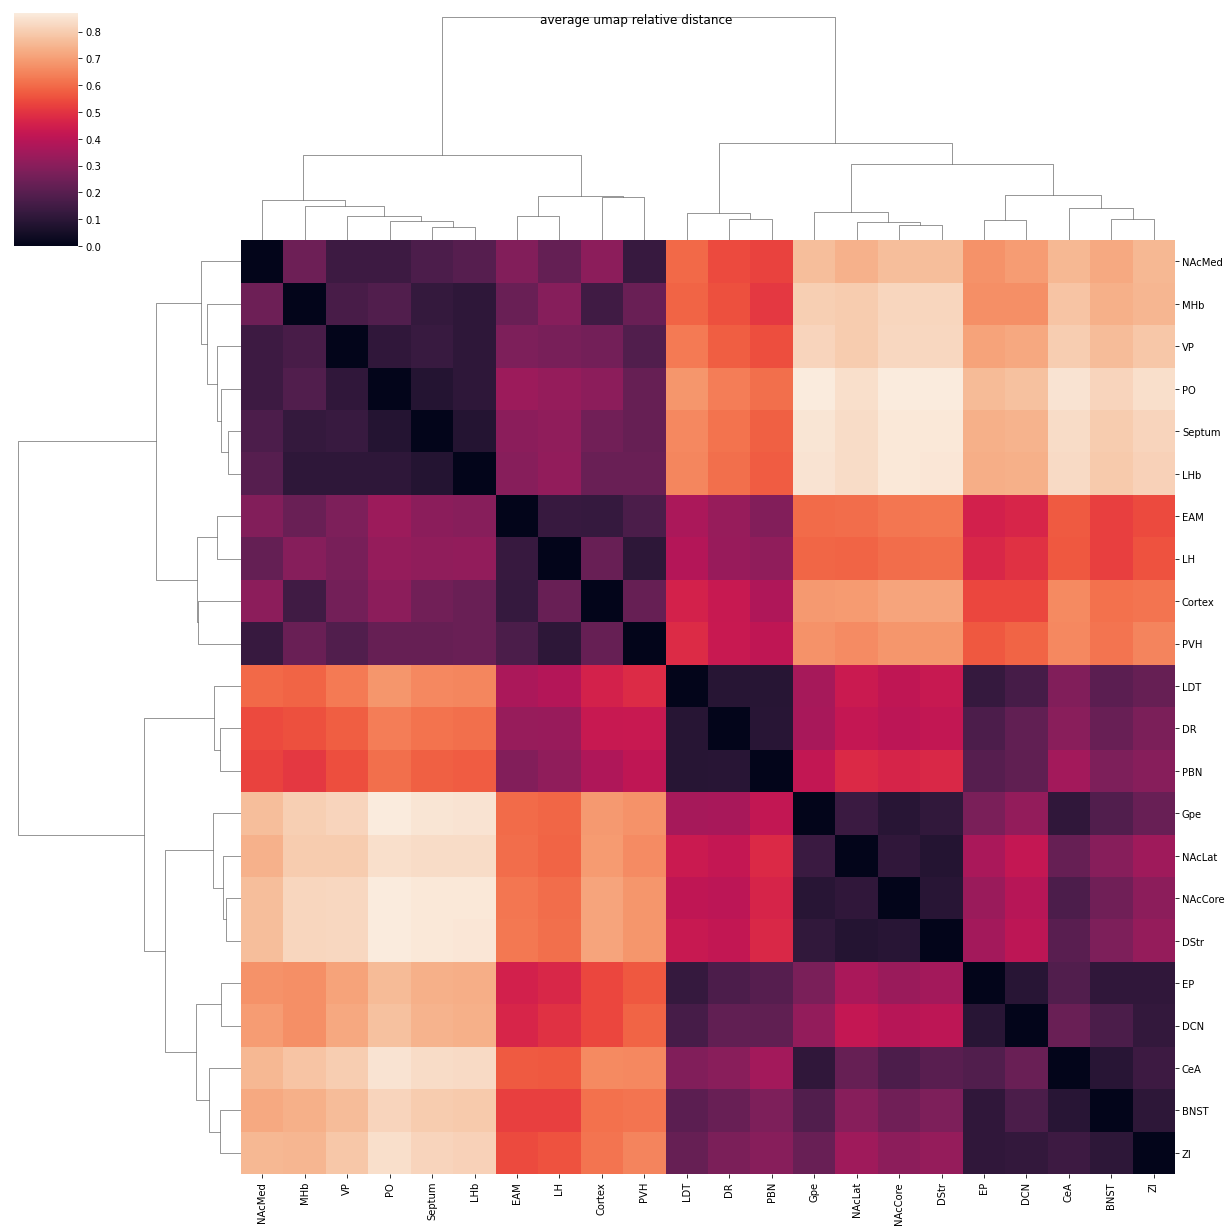

In [151]:
umap_plot(X_scaled,labels) 

# DMS

In [152]:
features=featuresDMS
labels=labelsDMS
condition_nums=condition_numsDMS
regions=regionsDMS

In [153]:
#scale X 
X=features.to_numpy().astype(float)
#get rid of NAs before scaling

X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)

In [154]:
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[2.04956443 1.76828452 1.49185556 1.23945331 0.79857907]


principal component 1  principal component 2  principal component 3  \
0                2.249413              -0.830128              -0.516744   
1                0.528587               1.703999              -1.413081   
2                1.838207              -2.123966              -0.448835   
3                2.001559               0.228443              -2.059658   
4                3.139887              -1.037957               0.438236   
5                0.297572              -1.752328               2.173032   
6               -1.009458              -0.242287              -0.579733   
7               -0.733456               0.755555              -1.042370   
8               -1.786549              -0.272618              -0.609148   
9               -0.741386              -1.445493               0.372134   
10              -0.472894              -2.352181              -0.520115   
11              -1.273023               1.178913               0.846571   
12              -0.317084               1.022089               1.430480   
13              -0.980341               0.456750              -0.362633   
14              -1.322755              -0.649090              -1.386847   
15              -1.607014              -1.041986              -0.431675   
16              -0.815706               0.378755               1.811060   
17              -0.237097               1.443838              -1.808154   
18              -1.855253              -0.418227               0.687467   
19               1.533245               1.529468               1.456095   
20               1.000631               2.627580               0.136422   
21               0.562914               0.840871               1.827497   

    principal component 4  principal component 5  
0               -0.977722              -0.509348  
1                0.757214               1.377227  
2                1.701352               0.023262  
3                1.693424              -0.835414  
4                0.004583              -0.043817  
5               -0.610979               0.896777  
6                0.155042              -1.385523  
7               -1.141304              -0.505273  
8                0.963718              -0.215829  
9               -1.525073              -0.411258  
10              -1.482866               0.847644  
11               0.478037              -0.163377  
12               0.272901              -1.374501  
13               0.317344               0.769875  
14              -0.086725              -1.150070  
15              -0.234812               1.700326  
16               1.129129              -0.409929  
17              -0.682094               0.794970  
18               0.548545              -0.468363  
19              -1.715374              -0.713667  
20              -1.519791               0.595338  
21               1.955450               1.180950

### PCA Plots

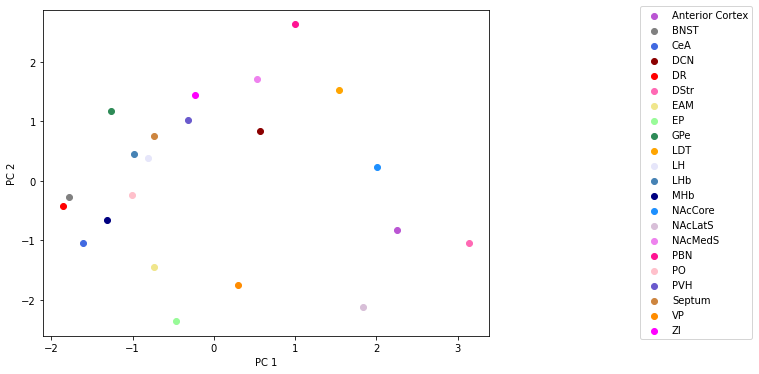

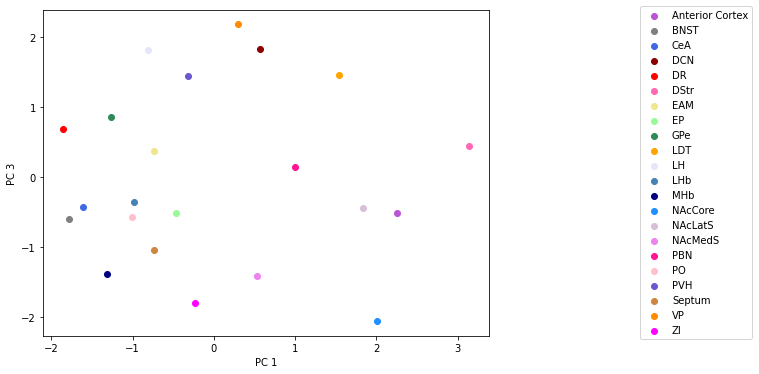

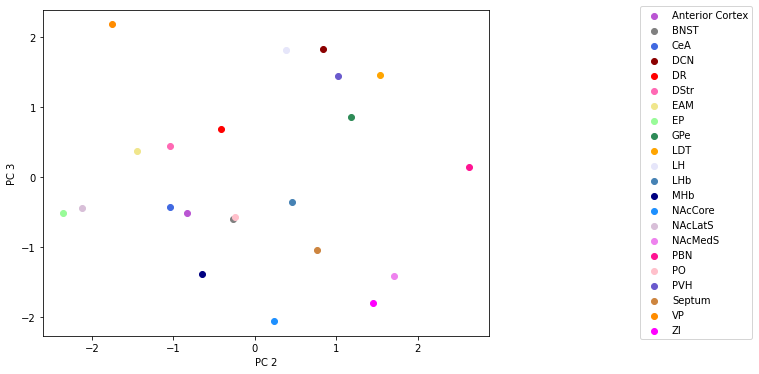

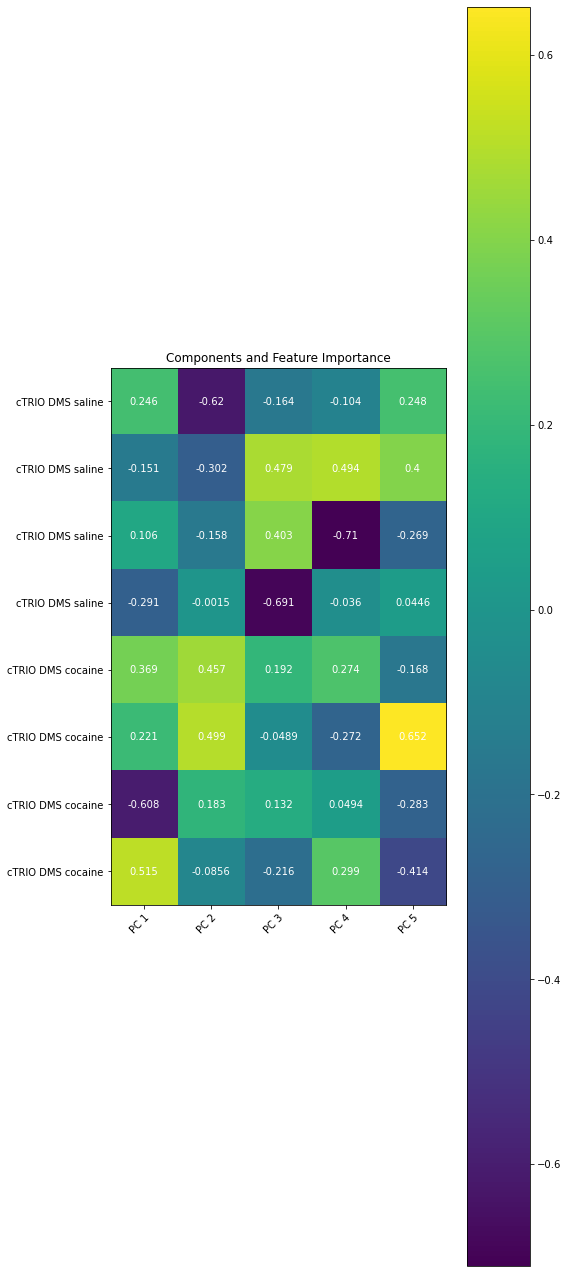

In [155]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

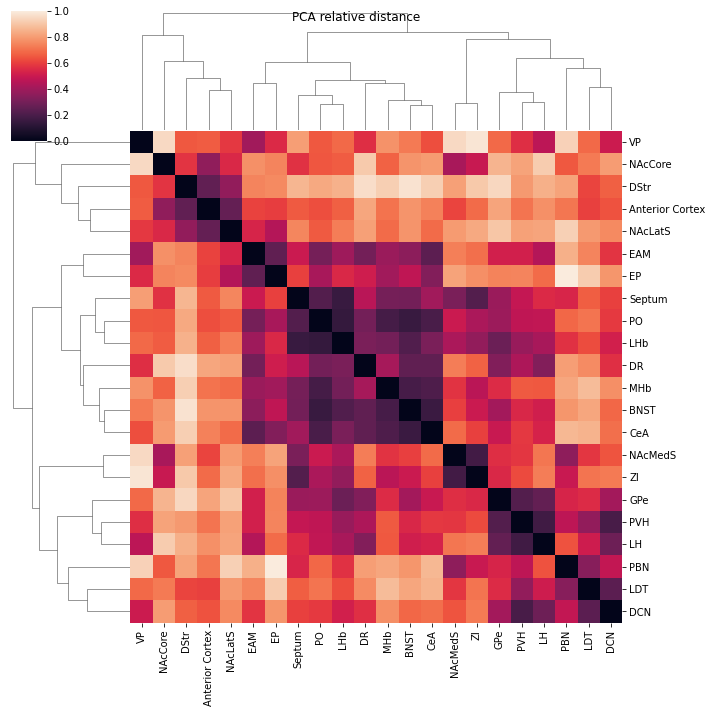

In [156]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

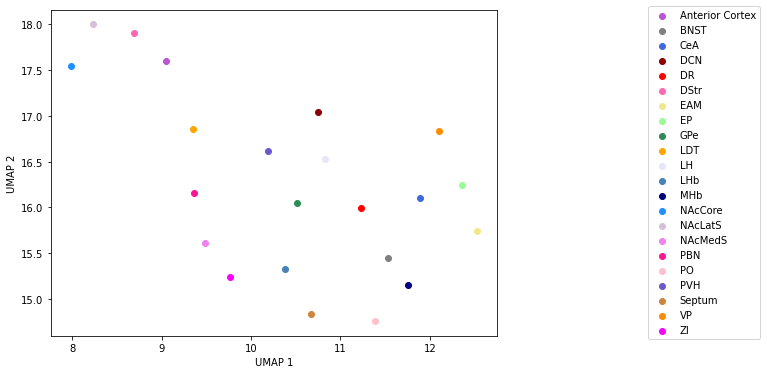

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


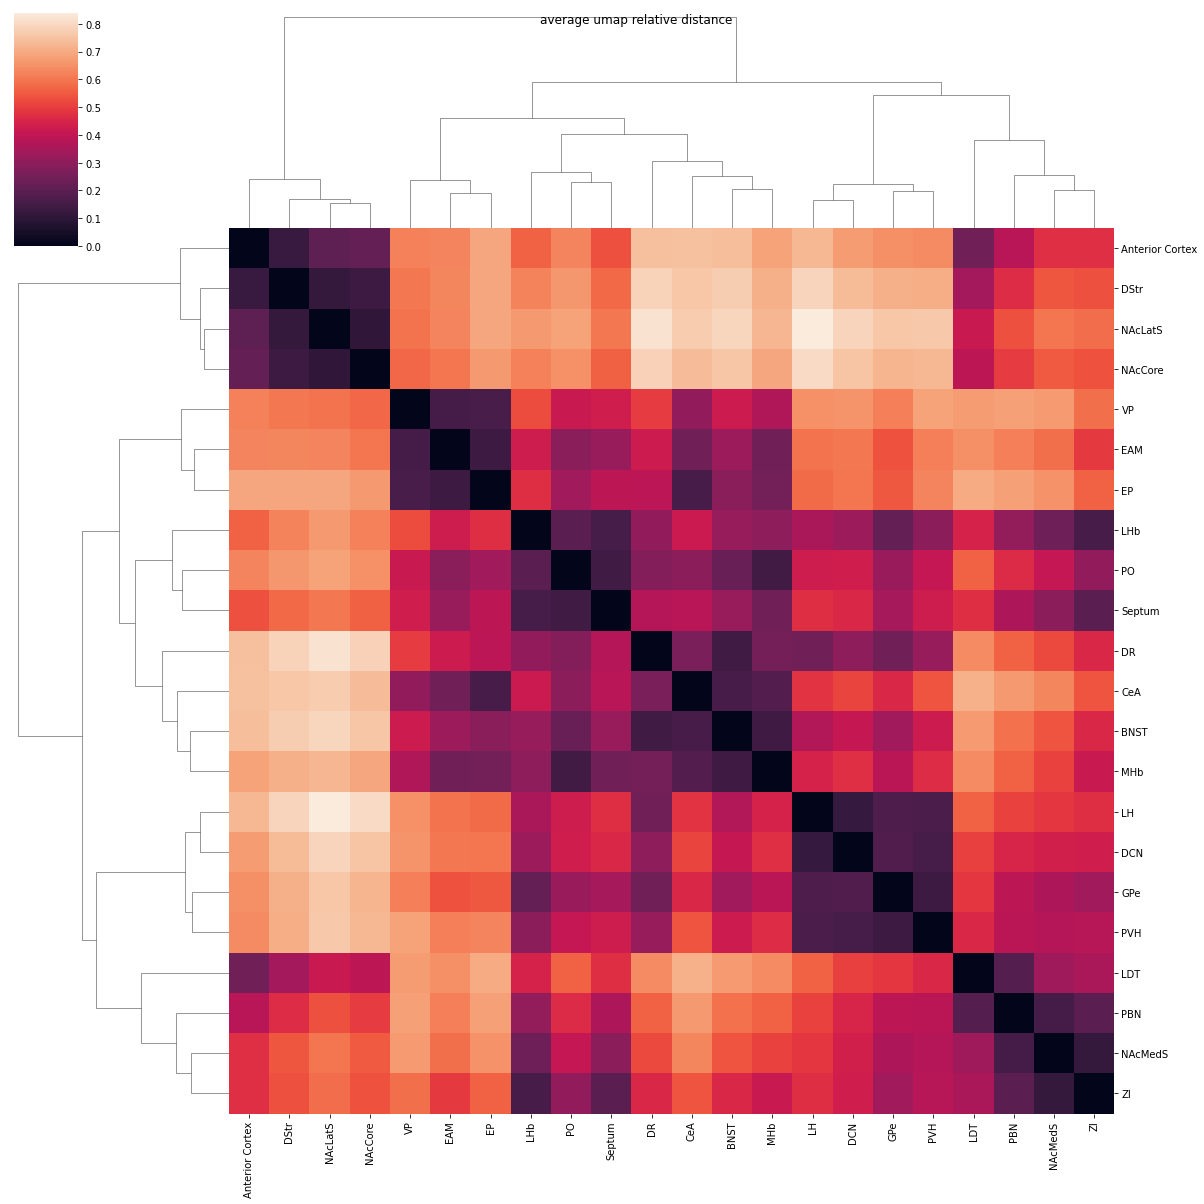

In [157]:
umap_plot(X_scaled,labels) 

# Controls vs cocaine - all conditions

for coc vs saline, it should be all of the conditions. for saline, it should be DAT-Cre, 66T, plus all the DAT-Cre cTRIO saline conditions (there should be about 20 of them). then a roughly equal number of cocaine conditions. so it should be approx a 20 x 20 comparison

Cocaine includes:

-cTRIO DMS cocaine

-cTRIO NAcLat cocaine

-mPFC cocaine

-Amygdala cocaine

-DLS cocaine

-Nacmed cocaine

Controls includes:

-cTRIO DMS saline

-NAcLat iso saline controls

-DAT-Cre

-DAT-Cre 66T

-mPFC saline

-Amygdala saline

-DLS saline
 
-Nacmed saline

In [158]:
def get_feats_and_labels(dataframe): #gets features and conditions (drugs) and brain regions
    regions=dataframe['condition'].values
    condition_nums=dataframe['condition_num'].values
    features0=dataframe.iloc[: , 2:24]
    features=features0.transpose()
    labels=features.index
    return features, labels, regions, condition_nums

In [159]:
# NAcLat_data 'cTRIO NAcLat cocaine','NAcLat iso saline controls'
NAcLat_data2=NAcLat_data[(NAcLat_data["condition"] == 'cTRIO NAcLat cocaine')| 
                (NAcLat_data["condition"] == 'NAcLat iso saline controls')]
features, labels, condition_nums, regions= get_feats_and_labels(NAcLat_data2)

In [160]:
labels=sorted(labels)
labels

['%Anterior Cortex',
 '%BNST',
 '%CeA',
 '%DCN',
 '%DR',
 '%DStr',
 '%EAM',
 '%EP',
 '%GP',
 '%LDT',
 '%LH',
 '%LHb',
 '%MHb',
 '%NAcCore',
 '%NAcLat',
 '%NAcMed',
 '%PBN',
 '%PO',
 '%PVN',
 '%Septum',
 '%VP',
 '%ZI']

In [161]:
featuresmPFC.sort_index(axis=0)

0         1         2         3         4         5  \
Anterior Cortex  0.747198  0.675676  1.347666  1.688103  3.789474  3.680982   
BNST             4.483188  4.054054   4.18739  3.858521  4.421053   5.06135   
CeA              2.615193  2.252252  1.203273  3.617363  3.157895  2.300613   
DCN              0.373599  0.600601  0.032087  0.562701       0.0  0.306748   
DR               46.32628  34.68469  17.80844  33.03859  22.73684  28.83436   
DStr             0.373599  2.927928  13.28413  0.241158   5.68421  0.460123   
EAM              4.109589  2.477478  0.433178  5.787781  4.421053  3.834356   
EP                    0.0       0.0  0.625702       0.0       0.0  0.153374   
GPe               3.73599  1.801802  3.176641  0.482315  2.526316  1.840491   
LDT               1.24533  2.102102  2.791593  0.803859  1.263158  1.840491   
LH               5.977584  11.03604   7.89347  13.98714  8.842105  7.208589   
LHb              2.615193  1.126126  4.042997  2.170418  3.789474   3.98773   
MHb              1.494396       0.0  0.673833  0.241158  0.631579  0.460123   
NAcCore          1.494396  2.027027  11.31077  1.688103  6.947369  2.147239   
NAcLatS          1.120797  6.306306  1.395797  0.723473  3.157895  1.533742   
NAcMedS          2.241594  2.027027  10.44441  3.376206  6.947369  3.527607   
PBN              7.098381  7.207207  2.695331   8.92283   6.31579  7.055215   
PO               0.747198  3.603604  4.476175  4.099679  1.263158  2.760736   
PVH               1.24533  3.153153  1.684582  2.652733  0.842105  1.226994   
Septum                0.0       0.0  0.721964  0.241158       0.0  0.460123   
VP               8.592777  10.36036  6.401412  8.681672  10.10526  19.32515   
ZI               3.362391  1.576577  3.369164  3.135048  3.157895  1.993865   

                        6         7  
Anterior Cortex  3.405221  2.694611  
BNST             4.426788  5.389222  
CeA              2.724177  2.694611  
DCN              0.681044       0.0  
DR               25.87968  33.23353  
DStr                  0.0       0.0  
EAM              3.745744  2.694611  
EP               0.340522       0.0  
GPe              0.340522       0.0  
LDT              0.908059  1.197605  
LH               13.96141  8.083833  
LHb              4.426788  10.77844  
MHb              0.340522  1.796407  
NAcCore          1.021566  0.898204  
NAcLatS          1.362089       0.0  
NAcMedS           4.76731  3.592814  
PBN              3.745744  4.491018  
PO               5.107832  4.491018  
PVH              2.724177  1.796407  
Septum           0.340522  0.898204  
VP               16.34506  11.67665  
ZI               3.405221  3.592814

In [162]:
#features_nacmed, labels_nacmed, condition_nums_nacmed, regions_nacmed 
condition_nums=list(condition_nums)+list(condition_numsDMS)+list(condition_nums_datcre66t)+list(condition_numsmPFC)+list(condition_nums_amyg)+list(condition_nums_DLS)+list(condition_nums_nacmed)
regions=list(regions)+list(regionsDMS)+list(regions_datcre66t)+list(regionsmPFC)+list(regions_amyg)+list(regions_DLS)+list(regions_nacmed)
X1=features.sort_index(axis=0).to_numpy().astype(float)
X2=featuresDMS.sort_index(axis=0).to_numpy().astype(float)
X3=features_datcre66t.sort_index(axis=0).to_numpy().astype(float)
X4=featuresmPFC.sort_index(axis=0).to_numpy().astype(float)
X_amyg=features_amyg.sort_index(axis=0).to_numpy().astype(float)
X_DLS=features_DLS.sort_index(axis=0).to_numpy().astype(float)
X_nacmed=features_nacmed.sort_index(axis=0).to_numpy().astype(float)
X5=np.hstack((X1, X2))
X6=np.hstack((X5, X3))
X7=np.hstack((X6, X4))
X8=np.hstack((X7, X_amyg))
X9=np.hstack((X8, X_DLS))
X=np.hstack((X9, X_nacmed))

In [163]:
#scale X 

X_scaled=zscore(X,axis=1)
X_scaled=zscore(X_scaled,axis=0)
#can change n_components to more if you want to visualize in 3D 
pca = PCA(n_components=5)
#PCA using the scaled drug data array made earlier
principalComponents = pca.fit_transform(X_scaled)
#make into dataframe if you want to view with labels
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
region_components=pd.DataFrame(data = pca.components_ , columns = regions)
#view df
print('Explained variance for each PC: 1, 2, 3')
print(pca.explained_variance_)
principalDf

Explained variance for each PC: 1, 2, 3
[19.2761127   8.40532609  5.36663938  4.70577541  4.03661961]


principal component 1  principal component 2  principal component 3  \
0                4.736478              -1.414152               2.784526   
1               -2.918247              -2.567006              -1.294262   
2                3.516862              -3.604531               0.180026   
3                2.149405              -2.781520               0.132502   
4               -6.087734              -2.812285               1.210080   
5                7.921887              -0.085175               0.390429   
6               -3.053941              -1.449320              -2.231173   
7                4.534581              -2.766176              -0.061727   
8                6.203854              -1.152367              -3.216292   
9               -2.780178               1.163984               5.412532   
10              -5.708885              -2.249449              -2.615701   
11              -4.638550               3.297614              -0.486201   
12              -1.412978               2.644244               0.382631   
13               5.449828               5.159242              -0.321793   
14               5.277236               0.872151               0.198709   
15               2.361863               5.772897               0.434321   
16              -2.514566              -3.444165               5.200140   
17              -4.619770               3.123221              -2.217549   
18              -2.181411              -0.292656               0.587266   
19              -2.157033               3.903959               0.737763   
20              -4.895040               0.983623              -1.373251   
21               0.816339              -2.302135              -3.832978   

    principal component 4  principal component 5  
0               -0.079035              -2.881198  
1               -5.053517              -2.996975  
2                0.226130              -1.180483  
3                3.681068               1.001807  
4               -1.757491               0.316405  
5               -1.294320               0.422536  
6                5.418438              -3.334758  
7               -1.423950               2.106689  
8                0.226727               2.372622  
9                0.451696               2.683836  
10              -2.020830               0.614339  
11               2.016536               0.265298  
12               0.203855               0.954541  
13              -0.223424              -1.215846  
14              -0.069259              -1.973822  
15              -0.591027              -1.541490  
16               1.849339               0.191583  
17              -0.207544               1.015430  
18              -2.899980              -0.277404  
19              -0.626943               2.794353  
20               0.936611              -2.680122  
21               1.236920               3.342659

### PCA Plots

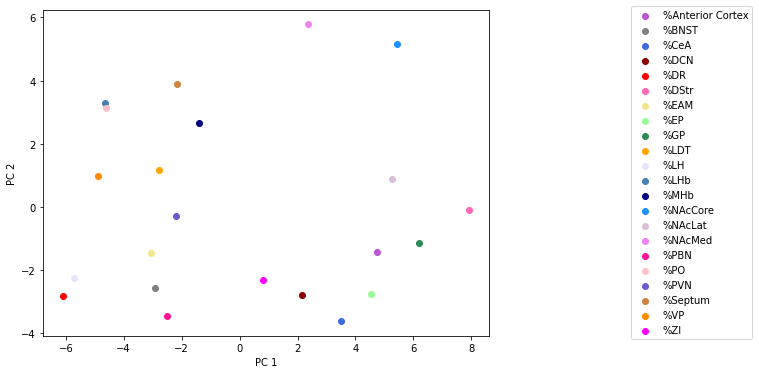

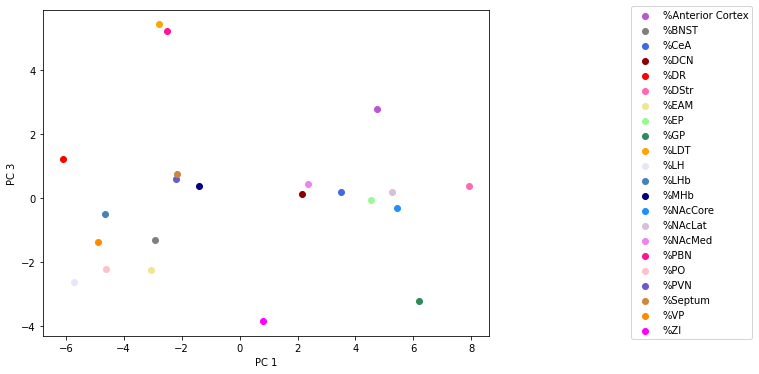

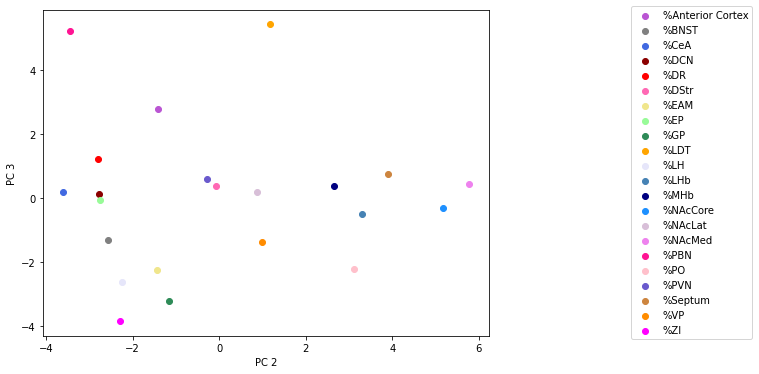

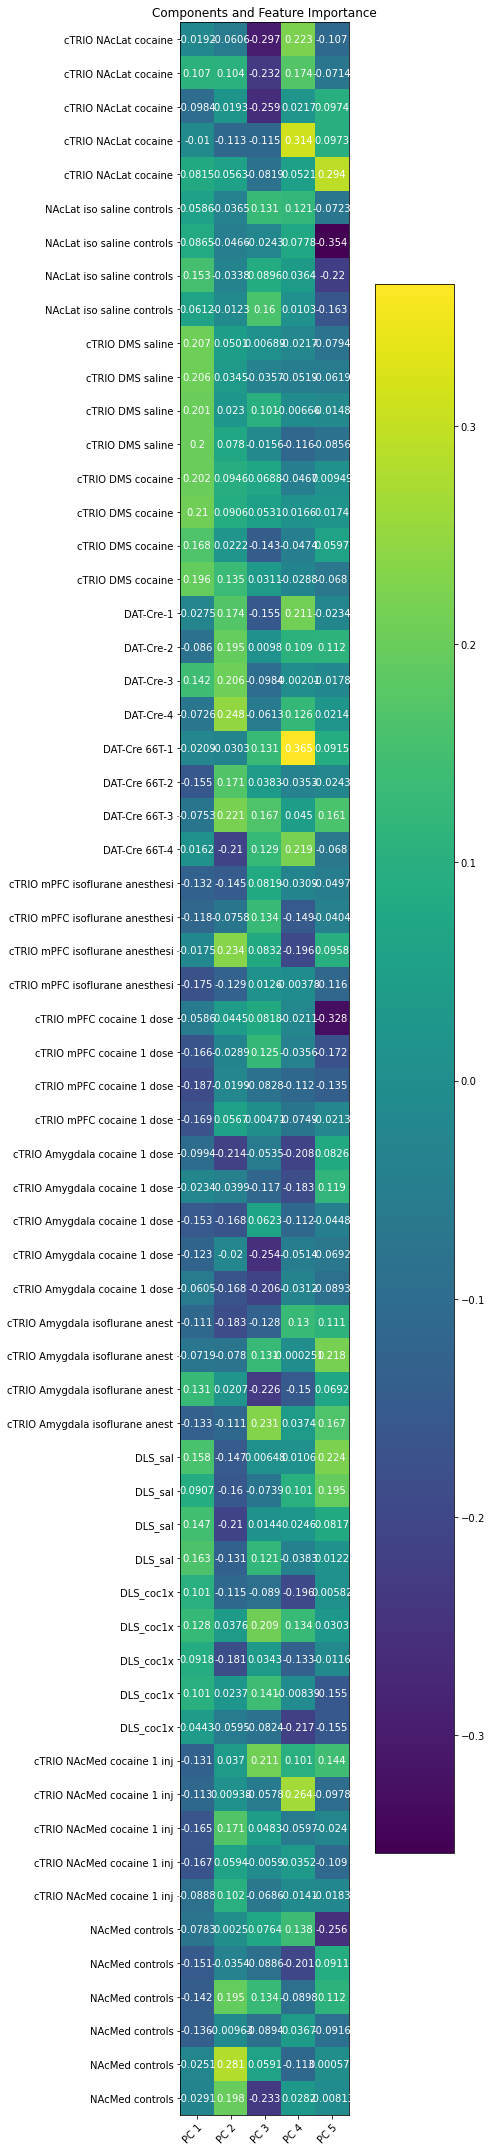

In [164]:
pc1=principalDf['principal component 1']
pc2=principalDf['principal component 2']
pc3=principalDf['principal component 3']
make_pca_plots(pc1,pc2,pc3,labels)
plot_components(region_components,condition_nums)

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


Text(0.5, 0.98, 'PCA relative distance')

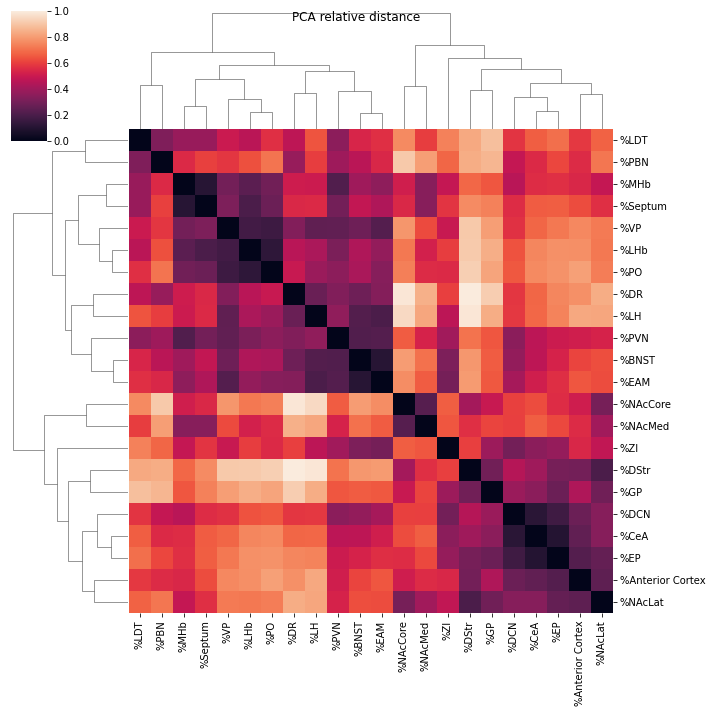

In [165]:
pca_dist=pca_distance(pc1,pc2,pc3,labels)
heatmapdf = pd.DataFrame(pca_dist,index=labels,columns=labels)
cm = sns.clustermap(heatmapdf,yticklabels=True)
cm.fig.suptitle("PCA relative distance")

### UMAP

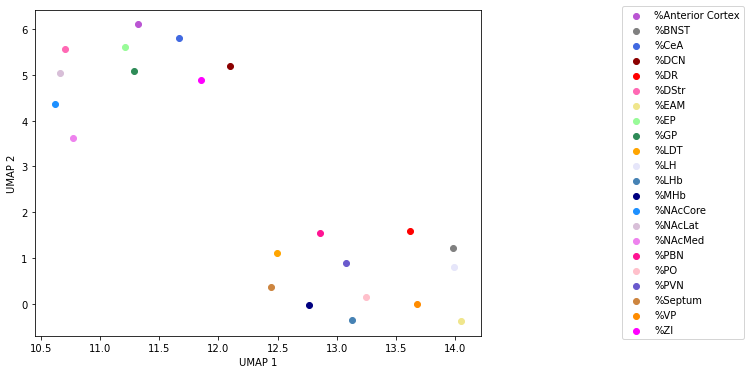

C:\Users\Kat\anaconda3\lib\site-packages\seaborn\matrix.py:619: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


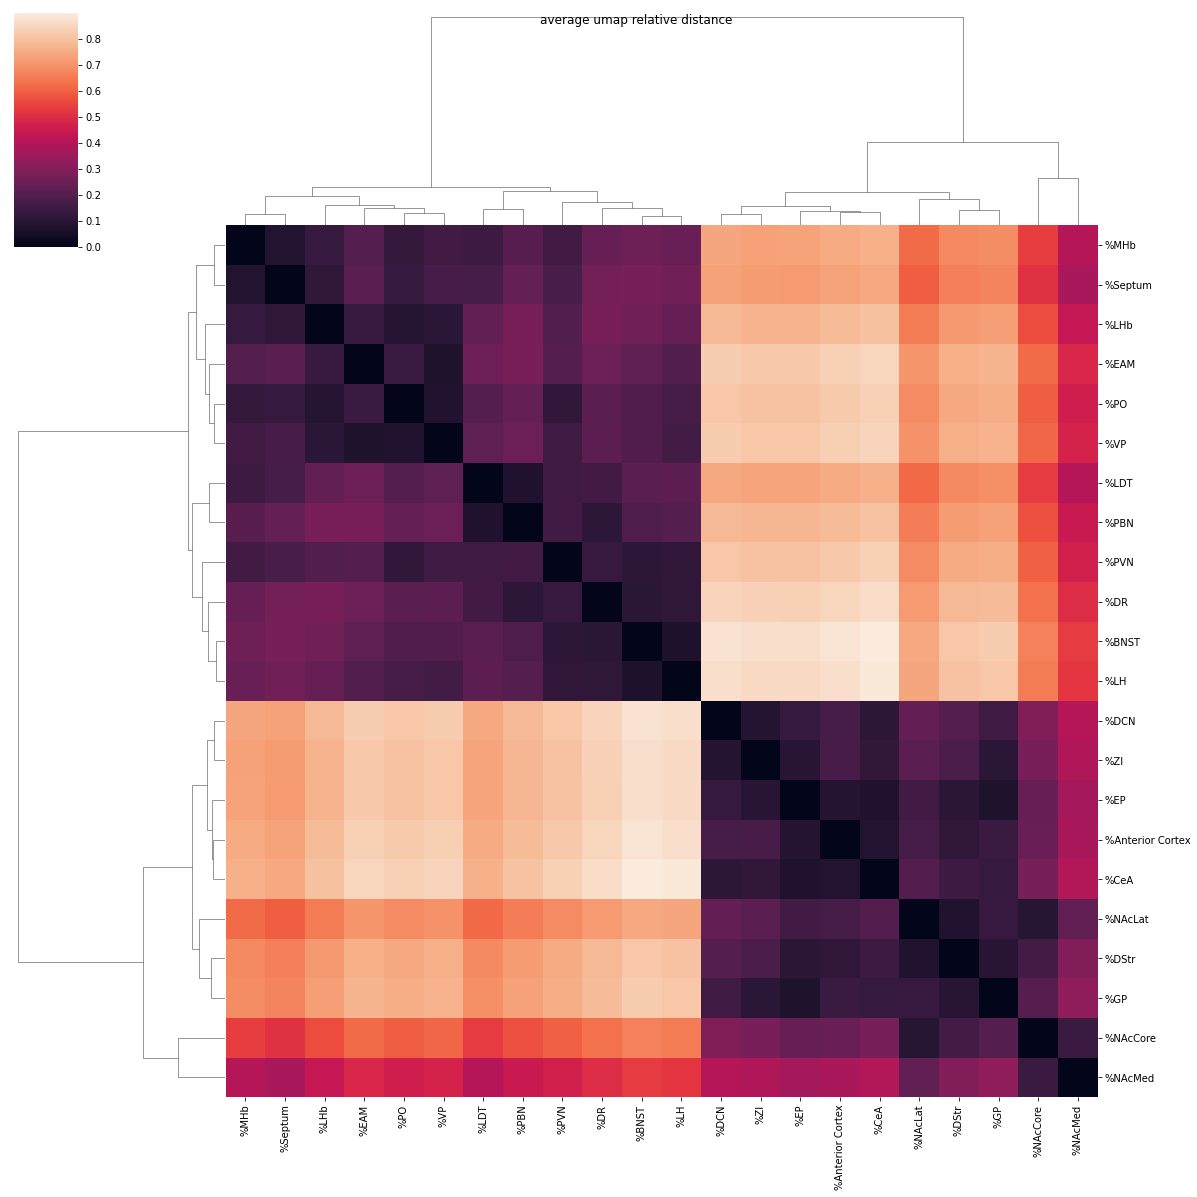

In [166]:
umap_plot(X_scaled,labels) 